# Simulated Annealing

In [255]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

In [2]:
'''
This section imports data
'''

dtype = int

EI51 = [[37, 52], [49, 49], [52, 64], [20, 26], [40, 30], [21, 47], [17, 63], [31, 62], [52, 33], [51, 21], [42, 41], [31, 32], [5, 25], [12, 42], [36, 16], [52, 41], [27, 23], [17, 33], [13, 13], [57, 58], [62, 42], [42, 57], [16, 57], [8, 52], [7, 38], [27, 68], [30, 48], [43, 67], [58, 48], [58, 27], [37, 69], [38, 46], [46, 10], [61, 33], [62, 63], [63, 69], [32, 22], [45, 35], [59, 15], [5, 6], [10, 17], [21, 10], [5, 64], [30, 15], [39, 10], [32, 39], [25, 32], [25, 55], [48, 28], [56, 37], [30, 40]]
EI51 = np.array(EI51, dtype=dtype)


A280 = [[288, 149], [288, 129], [270, 133], [256, 141], [256, 157], [246, 157], [236, 169], [228, 169], [228, 161], [220, 169], [212, 169], [204, 169], [196, 169], [188, 169], [196, 161], [188, 145], [172, 145], [164, 145], [156, 145], [148, 145], [140, 145], [148, 169], [164, 169], [172, 169], [156, 169], [140, 169], [132, 169], [124, 169], [116, 161], [104, 153], [104, 161], [104, 169], [90, 165], [80, 157], [64, 157], [64, 165], [56, 169], [56, 161], [56, 153], [56, 145], [56, 137], [56, 129], [56, 121], [40, 121], [40, 129], [40, 137], [40, 145], [40, 153], [40, 161], [40, 169], [32, 169], [32, 161], [32, 153], [32, 145], [32, 137], [32, 129], [32, 121], [32, 113], [40, 113], [56, 113], [56, 105], [48, 99], [40, 99], [32, 97], [32, 89], [24, 89], [16, 97], [16, 109], [8, 109], [8, 97], [8, 89], [8, 81], [8, 73], [8, 65], [8, 57], [16, 57], [8, 49], [8, 41], [24, 45], [32, 41], [32, 49], [32, 57], [32, 65], [32, 73], [32, 81], [40, 83], [40, 73], [40, 63], [40, 51], [44, 43], [44, 35], [44, 27], [32, 25], [24, 25], [16, 25], [16, 17], [24, 17], [32, 17], [44, 11], [56, 9], [56, 17], [56, 25], [56, 33], [56, 41], [64, 41], [72, 41], [72, 49], [56, 49], [48, 51], [56, 57], [56, 65], [48, 63], [48, 73], [56, 73], [56, 81], [48, 83], [56, 89], [56, 97], [104, 97], [104, 105], [104, 113], [104, 121], [104, 129], [104, 137], [104, 145], [116, 145], [124, 145], [132, 145], [132, 137], [140, 137], [148, 137], [156, 137], [164, 137], [172, 125], [172, 117], [172, 109], [172, 101], [172, 93], [172, 85], [180, 85], [180, 77], [180, 69], [180, 61], [180, 53], [172, 53], [172, 61], [172, 69], [172, 77], [164, 81], [148, 85], [124, 85], [124, 93], [124, 109], [124, 125], [124, 117], [124, 101], [104, 89], [104, 81], [104, 73], [104, 65], [104, 49], [104, 41], [104, 33], [104, 25], [104, 17], [92, 9], [80, 9], [72, 9], [64, 21], [72, 25], [80, 25], [80, 25], [80, 41], [88, 49], [104, 57], [124, 69], [124, 77], [132, 81], [140, 65], [132, 61], [124, 61], [124, 53], [124, 45], [124, 37], [124, 29], [132, 21], [124, 21], [120, 9], [128, 9], [136, 9], [148, 9], [162, 9], [156, 25], [172, 21], [180, 21], [180, 29], [172, 29], [172, 37], [172, 45], [180, 45], [180, 37], [188, 41], [196, 49], [204, 57], [212, 65], [220, 73], [228, 69], [228, 77], [236, 77], [236, 69], [236, 61], [228, 61], [228, 53], [236, 53], [236, 45], [228, 45], [228, 37], [236, 37], [236, 29], [228, 29], [228, 21], [236, 21], [252, 21], [260, 29], [260, 37], [260, 45], [260, 53], [260, 61], [260, 69], [260, 77], [276, 77], [276, 69], [276, 61], [276, 53], [284, 53], [284, 61], [284, 69], [284, 77], [284, 85], [284, 93], [284, 101], [288, 109], [280, 109], [276, 101], [276, 93], [276, 85], [268, 97], [260, 109], [252, 101], [260, 93], [260, 85], [236, 85], [228, 85], [228, 93], [236, 93], [236, 101], [228, 101], [228, 109], [228, 117], [228, 125], [220, 125], [212, 117], [204, 109], [196, 101], [188, 93], [180, 93], [180, 101], [180, 109], [180, 117], [180, 125], [196, 145], [204, 145], [212, 145], [220, 145], [228, 145], [236, 145], [246, 141], [252, 125], [260, 129], [280, 133]]
A280 = np.array(A280, dtype=dtype)

PCB442 = [[200, 400], [200, 500], [200, 600], [200, 700], [200, 800], [200, 900], [200, 1000], [200, 1100], [200, 1200], [200, 1300], [200, 1400], [200, 1500], [200, 1600], [200, 1700], [200, 1800], [200, 1900], [200, 2000], [200, 2100], [200, 2200], [200, 2300], [200, 2400], [200, 2500], [200, 2600], [200, 2700], [200, 2800], [200, 2900], [200, 3000], [200, 3100], [200, 3200], [200, 3300], [200, 3400], [200, 3500], [200, 3600], [300, 400], [300, 500], [300, 600], [300, 700], [300, 800], [300, 900], [300, 1000], [300, 1100], [300, 1200], [300, 1300], [300, 1400], [300, 1500], [300, 1600], [300, 1700], [300, 1800], [300, 1900], [300, 2000], [300, 2100], [300, 2200], [300, 2300], [300, 2400], [300, 2500], [300, 2600], [300, 2700], [300, 2800], [300, 2900], [300, 3000], [300, 3100], [300, 3200], [300, 3300], [300, 3400], [300, 3500], [400, 400], [400, 500], [400, 600], [400, 700], [400, 800], [400, 900], [400, 1000], [400, 1100], [400, 1200], [400, 1300], [400, 1400], [400, 1500], [400, 1600], [400, 1700], [400, 1800], [400, 1900], [400, 2000], [400, 2100], [400, 2200], [400, 2300], [400, 2400], [400, 2500], [400, 2600], [400, 2700], [400, 2800], [400, 2900], [400, 3000], [400, 3100], [400, 3200], [400, 3300], [400, 3400], [400, 3500], [400, 3600], [500, 1500], [500, 1829], [500, 3100], [600, 400], [700, 300], [700, 600], [700, 1500], [700, 1600], [700, 1800], [700, 2100], [700, 2400], [700, 2700], [700, 3000], [700, 3300], [700, 3600], [800, 300], [800, 600], [800, 1030], [800, 1500], [800, 1800], [800, 2100], [800, 2400], [800, 2600], [800, 2700], [800, 3000], [800, 3300], [800, 3600], [900, 300], [900, 600], [900, 1500], [900, 1800], [900, 2100], [900, 2400], [900, 2700], [900, 3000], [900, 3300], [900, 3600], [1000, 300], [1000, 600], [1000, 1100], [1000, 1500], [1000, 1629], [1000, 1800], [1000, 2100], [1000, 2400], [1000, 2600], [1000, 2700], [1000, 3000], [1000, 3300], [1000, 3600], [1100, 300], [1100, 600], [1100, 700], [1100, 900], [1100, 1500], [1100, 1800], [1100, 2100], [1100, 2400], [1100, 2700], [1100, 3000], [1100, 3300], [1100, 3600], [1200, 300], [1200, 600], [1200, 1500], [1200, 1700], [1200, 1800], [1200, 2100], [1200, 2400], [1200, 2700], [1200, 3000], [1200, 3300], [1200, 3600], [1300, 300], [1300, 600], [1300, 700], [1300, 1130], [1300, 1500], [1300, 1800], [1300, 2100], [1300, 2200], [1300, 2400], [1300, 2700], [1300, 3000], [1300, 3300], [1300, 3600], [1400, 300], [1400, 600], [1400, 930], [1400, 1500], [1400, 1800], [1400, 2000], [1400, 2100], [1400, 2400], [1400, 2500], [1400, 2700], [1400, 2820], [1400, 2900], [1400, 3000], [1400, 3300], [1400, 3600], [1500, 1500], [1500, 1800], [1500, 1900], [1500, 2100], [1500, 2400], [1500, 2700], [1500, 2800], [1500, 2860], [1500, 3000], [1500, 3300], [1500, 3600], [1600, 1100], [1600, 1300], [1600, 1500], [1600, 1800], [1600, 2100], [1600, 2400], [1600, 2700], [1600, 3000], [1600, 3300], [1600, 3600], [1700, 1200], [1700, 1500], [1700, 1800], [1700, 2100], [1700, 2400], [1700, 3600], [1800, 300], [1800, 600], [1800, 1230], [1800, 1500], [1800, 1800], [1800, 2100], [1800, 2400], [1900, 300], [1900, 600], [1900, 3000], [1900, 3520], [2000, 300], [2000, 370], [2000, 600], [2000, 800], [2000, 900], [2000, 1000], [2000, 1100], [2000, 1200], [2000, 1300], [2000, 1400], [2000, 1500], [2000, 1600], [2000, 1700], [2000, 1800], [2000, 1900], [2000, 2000], [2000, 2100], [2000, 2200], [2000, 2300], [2000, 2400], [2000, 2500], [2000, 2600], [2000, 2700], [2000, 2800], [2000, 2900], [2000, 3000], [2000, 3100], [2000, 3500], [2100, 300], [2100, 600], [2100, 3200], [2200, 300], [2200, 469], [2200, 600], [2200, 3200], [2300, 300], [2300, 600], [2300, 3400], [2400, 300], [2400, 600], [2400, 2100], [2500, 300], [2500, 800], [2600, 400], [2600, 500], [2600, 800], [2600, 900], [2600, 1000], [2600, 1100], [2600, 1200], [2600, 1300], [2600, 1400], [2600, 1500], [2600, 1600], [2600, 1700], [2600, 1800], [2600, 1900], [2600, 2000], [2600, 2100], [2600, 2200], [2600, 2300], [2600, 2400], [2600, 2500], [2600, 2600], [2600, 2700], [2600, 2800], [2600, 2900], [2600, 3000], [2600, 3100], [2600, 3400], [2700, 700], [2700, 800], [2700, 900], [2700, 1000], [2700, 1100], [2700, 1200], [2700, 1300], [2700, 1400], [2700, 1500], [2700, 1600], [2700, 1700], [2700, 1800], [2700, 1900], [2700, 2000], [2700, 2100], [2700, 2200], [2700, 2300], [2700, 2500], [2700, 2600], [2700, 2700], [2700, 2800], [2700, 2900], [2700, 3000], [2700, 3100], [2700, 3200], [2700, 3300], [2700, 3400], [2700, 3500], [2700, 3600], [2700, 3700], [2700, 3800], [2800, 900], [2800, 1130], [2900, 400], [2900, 500], [2900, 1400], [2900, 2400], [2900, 3000], [3000, 700], [3000, 800], [3000, 900], [3000, 1000], [3000, 1100], [3000, 1200], [3000, 1300], [3000, 1500], [3000, 1600], [3000, 1700], [3000, 1800], [3000, 1900], [3000, 2000], [3000, 2100], [3000, 2200], [3000, 2300], [3000, 2500], [3000, 2600], [3000, 2700], [3000, 2800], [3000, 2900], [3000, 3000], [3000, 3100], [3000, 3200], [3000, 3300], [3000, 3400], [3000, 3500], [3000, 3600], [3000, 3700], [3000, 3800], [150, 3500], [150, 3550], [469, 2550], [469, 3350], [469, 3450], [540, 2330], [540, 2430], [620, 3650], [620, 3709], [750, 2550], [850, 520], [850, 700], [850, 2280], [939, 740], [950, 2220], [910, 2600], [1050, 1050], [1150, 1350], [1170, 2280], [1220, 2210], [1350, 750], [1350, 1700], [1350, 2140], [1450, 770], [1550, 300], [1550, 500], [1550, 1850], [1650, 1050], [1690, 2680], [1710, 310], [1710, 510], [1750, 750], [1790, 2580], [1720, 2610], [1790, 3330], [1720, 3409], [1829, 2700], [1829, 2800], [1829, 3450], [2060, 1650], [2050, 3150], [2170, 1900], [2110, 2000], [2120, 2750], [2150, 3250], [2290, 1400], [2220, 2820], [2280, 3250], [2390, 1300], [2320, 1500], [2450, 710], [2620, 3650], [2750, 520], [2760, 2360], [2850, 2200], [2850, 2700], [2850, 3350], [2930, 950], [2950, 1750], [2950, 2050], [520, 3200], [2300, 3500], [2320, 3150], [530, 2100], [2550, 710], [750, 490], [0, 0]]
PCB442 = np.array(PCB442, dtype=dtype)

In [3]:
'''
This implements a graph drawer function. This can be used to make a visual how the algorithm works
If lines == True then the route will be drawn
'''

def graph_drawer(current_tour, original_data, lines):
    if lines == False:
        
        original_data_x = original_data.T[0]
        original_data_y = original_data.T[1]
        
        plt.plot(original_data_x, original_data_y ,'ro')
    
    if lines == True:
        
        original_data_x = original_data.T[0]
        original_data_y = original_data.T[1]        
        plt.plot(original_data_x, original_data_y ,'ro')
        
        for i in range(len(current_tour) - 1):
            
            x_values = [original_data[current_tour[i + 1]][0], original_data[current_tour[i]][0]]
            y_values = [original_data[current_tour[i + 1]][1], original_data[current_tour[i]][1]]
            
            plt.plot(x_values, y_values)
        
        plt.title(f' Tour length of: {tour_length(current_tour, original_data)}')

In [246]:
'''
This implents a function which computes tour length
'''

def tour_length(current_tour, original_data):
    
    # Tour length starts at 0
    length = 0
    
    # This calculates length of tour by using current_tour to index original data
    for i in range(len(current_tour)-1):
        length = length + np.sqrt(
            (original_data[current_tour[i + 1]][0] - original_data[current_tour[i]][0])**2 + 
            (original_data[current_tour[i + 1]][1] - original_data[current_tour[i]][1])**2)
    
    # To complete the loop
    length = length +  np.sqrt(
            (original_data[current_tour[0]][0] - original_data[current_tour[-1]][0])**2 + 
            (original_data[current_tour[0]][1] - original_data[current_tour[-1]][1])**2)
    
    return length

In [257]:
'''
This preforms a random swap
'''

def swapping(current_tour, original_data):
    
    tour = np.arange(0,len(current_tour))
    
    a = np.random.randint(1,len(current_tour)-1)
    b = np.random.randint(1,len(current_tour)-1)
    
    while a == b:
        a = np.random.randint(1,len(current_tour)-1)
        b = np.random.randint(1,len(current_tour)-1)
        
    # Save old data

    new_tour = np.copy(current_tour)
    old_a = current_tour[a]
    old_b = current_tour[b]
    
    new_tour[b] = old_a
    new_tour[a] = old_b
    
    return new_tour

In [299]:
'''
This implements the simulated annealing algorithm
'''

def simulated_annealing(current_tour, original_data, n, T):
    '''
    Current tour is the initial tour
    Original data is raw data
    n defines the length of T
    T is cooling schedule
    '''
    
    
    ct = current_tour
    i = 1
    
    while i < n:
        print(ct)

        # Step 0: Generate random TSP tour and set i = 1
        
        print(f"first {i, tour_length(ct, original_data)}")
        
        # Step 1. Execute one step of the 2-OPT and evaluted delta C
        
        nt = deepcopy(swapping(ct, original_data))
        ntl = tour_length(nt, original_data)     

        print(f'{i}, {tour_length(ct, original_data)-ntl} = {ntl} - {tour_length(ct, original_data)}\n')
        
        if  ntl - tour_length(ct, original_data) < 0:
            # Go to step 3.
            # Accept exchange and compute new value of objective funciton
            ct = np.copy(nt)
            i = i + 1
            print(f"New item in loop{i,tour_length(ct, original_data)}\n")
            print(ct)
            print()
            print()
        else:
            print('repeat')
    
        
    # Cooling schedule finished: return tour
    print('done')
    return ct

# Testing v1

In [300]:
test = np.arange(0, 51)
print(f"{test}\n")
np.random.shuffle(test)
print(f"{test}\n")
test = np.append(test, test[0])
print(test)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]

[ 8 20 49 50  6 11 15 47 42 36 31  3 24 41 30 18 25  2 43  4 16 39 21 17
 26 12  5 45  9 40 38  0 35 29 23  7 14 48 10 44 28  1 46 22 19 34 37 27
 13 33 32]

[ 8 20 49 50  6 11 15 47 42 36 31  3 24 41 30 18 25  2 43  4 16 39 21 17
 26 12  5 45  9 40 38  0 35 29 23  7 14 48 10 44 28  1 46 22 19 34 37 27
 13 33 32  8]


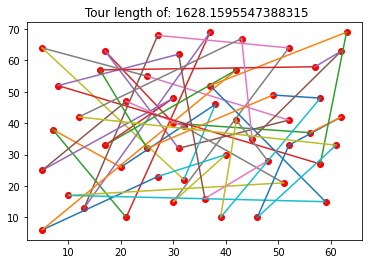

In [301]:
graph_drawer(test, EI51, True)

[ 8 20 49 50  6 11 15 47 42 36 31  3 24 41 30 18 25  2 43  4 16 39 21 17
 26 12  5 45  9 40 38  0 35 29 23  7 14 48 10 44 28  1 46 22 19 34 37 27
 13 33 32  8]
first (1, 1628.1595547388315)
1, 85.94472713941332 = 1542.2148275994182 - 1628.1595547388315

New item in loop(2, 1542.2148275994182)

[ 8 20 49 50  6 11 15 47 42 36 31  3 24 41 40 18 25  2 43  4 16 39 21 17
 26 12  5 45  9 30 38  0 35 29 23  7 14 48 10 44 28  1 46 22 19 34 37 27
 13 33 32  8]


[ 8 20 49 50  6 11 15 47 42 36 31  3 24 41 40 18 25  2 43  4 16 39 21 17
 26 12  5 45  9 30 38  0 35 29 23  7 14 48 10 44 28  1 46 22 19 34 37 27
 13 33 32  8]
first (2, 1542.2148275994182)
2, -30.90717177661827 = 1573.1219993760365 - 1542.2148275994182

repeat
[ 8 20 49 50  6 11 15 47 42 36 31  3 24 41 40 18 25  2 43  4 16 39 21 17
 26 12  5 45  9 30 38  0 35 29 23  7 14 48 10 44 28  1 46 22 19 34 37 27
 13 33 32  8]
first (2, 1542.2148275994182)
2, -13.681908748663545 = 1555.8967363480817 - 1542.2148275994182

repeat
[ 8 20 49 50  6 11

17, -41.50685505969 = 1185.6598038573568 - 1144.1529487976668

repeat
[ 8 20 49 38  9 11 24  7 42  6 31  3 43 41 40 18 44  2 15  4 16 39 21 17
 13 12  5 45 46 22 50 34 35 29 23 47 14 48 37 10 28  1 26  0 19 30 25 27
 36 33 32  8]
first (17, 1144.1529487976668)
17, -47.7973002018864 = 1191.9502489995532 - 1144.1529487976668

repeat
[ 8 20 49 38  9 11 24  7 42  6 31  3 43 41 40 18 44  2 15  4 16 39 21 17
 13 12  5 45 46 22 50 34 35 29 23 47 14 48 37 10 28  1 26  0 19 30 25 27
 36 33 32  8]
first (17, 1144.1529487976668)
17, -27.077316811912624 = 1171.2302656095794 - 1144.1529487976668

repeat
[ 8 20 49 38  9 11 24  7 42  6 31  3 43 41 40 18 44  2 15  4 16 39 21 17
 13 12  5 45 46 22 50 34 35 29 23 47 14 48 37 10 28  1 26  0 19 30 25 27
 36 33 32  8]
first (17, 1144.1529487976668)
17, -23.685017898856586 = 1167.8379666965234 - 1144.1529487976668

repeat
[ 8 20 49 38  9 11 24  7 42  6 31  3 43 41 40 18 44  2 15  4 16 39 21 17
 13 12  5 45 46 22 50 34 35 29 23 47 14 48 37 10 28  1 26  0 19 


New item in loop(28, 1017.8106622158662)

[ 8 20 49 38 36 14 24 46 42  6 31  3 43 41 40 18 44  9 29  4 16 39 21  7
 13 12 11 45 17  5 50 34 35  1 23 47 22 48 15 33 28 37 26  0 19 30 25 27
  2 10 32  8]


[ 8 20 49 38 36 14 24 46 42  6 31  3 43 41 40 18 44  9 29  4 16 39 21  7
 13 12 11 45 17  5 50 34 35  1 23 47 22 48 15 33 28 37 26  0 19 30 25 27
  2 10 32  8]
first (28, 1017.8106622158662)
28, -90.93859597099731 = 1108.7492581868635 - 1017.8106622158662

repeat
[ 8 20 49 38 36 14 24 46 42  6 31  3 43 41 40 18 44  9 29  4 16 39 21  7
 13 12 11 45 17  5 50 34 35  1 23 47 22 48 15 33 28 37 26  0 19 30 25 27
  2 10 32  8]
first (28, 1017.8106622158662)
28, -42.21487942682961 = 1060.0255416426958 - 1017.8106622158662

repeat
[ 8 20 49 38 36 14 24 46 42  6 31  3 43 41 40 18 44  9 29  4 16 39 21  7
 13 12 11 45 17  5 50 34 35  1 23 47 22 48 15 33 28 37 26  0 19 30 25 27
  2 10 32  8]
first (28, 1017.8106622158662)
28, -51.83078363441564 = 1069.6414458502818 - 1017.8106622158662

repeat
[ 8


repeat
[ 8 20 49 38 36 14 24 46 31  6 42  3 43 41 40 18 44  9 29  4 16 39 21  7
 13 12 11 45 17  5 50 34 35  1 23 47 22 48 15 33 28 37 26  0 19 30 25 27
  2 10 32  8]
first (29, 1013.1258591996659)
29, -101.14301910335757 = 1114.2688783030235 - 1013.1258591996659

repeat
[ 8 20 49 38 36 14 24 46 31  6 42  3 43 41 40 18 44  9 29  4 16 39 21  7
 13 12 11 45 17  5 50 34 35  1 23 47 22 48 15 33 28 37 26  0 19 30 25 27
  2 10 32  8]
first (29, 1013.1258591996659)
29, -41.14977303741625 = 1054.2756322370822 - 1013.1258591996659

repeat
[ 8 20 49 38 36 14 24 46 31  6 42  3 43 41 40 18 44  9 29  4 16 39 21  7
 13 12 11 45 17  5 50 34 35  1 23 47 22 48 15 33 28 37 26  0 19 30 25 27
  2 10 32  8]
first (29, 1013.1258591996659)
29, -6.695684492175815 = 1019.8215436918417 - 1013.1258591996659

repeat
[ 8 20 49 38 36 14 24 46 31  6 42  3 43 41 40 18 44  9 29  4 16 39 21  7
 13 12 11 45 17  5 50 34 35  1 23 47 22 48 15 33 28 37 26  0 19 30 25 27
  2 10 32  8]
first (29, 1013.1258591996659)
29, -95.


repeat
[ 8 20 49 38 36 14 24 46 31  6 42  3 43 41 40 18 44 32 29  4 16 39 21  7
 13 12 11 45 17  5 50 34 35  1 23 47 22 48 15 33 28 37 26  0 19 30 25 27
  2 10  9  8]
first (30, 994.3827251070269)
30, -5.7263083831064705 = 1000.1090334901334 - 994.3827251070269

repeat
[ 8 20 49 38 36 14 24 46 31  6 42  3 43 41 40 18 44 32 29  4 16 39 21  7
 13 12 11 45 17  5 50 34 35  1 23 47 22 48 15 33 28 37 26  0 19 30 25 27
  2 10  9  8]
first (30, 994.3827251070269)
30, -69.33845128095402 = 1063.721176387981 - 994.3827251070269

repeat
[ 8 20 49 38 36 14 24 46 31  6 42  3 43 41 40 18 44 32 29  4 16 39 21  7
 13 12 11 45 17  5 50 34 35  1 23 47 22 48 15 33 28 37 26  0 19 30 25 27
  2 10  9  8]
first (30, 994.3827251070269)
30, -13.83363212909785 = 1008.2163572361247 - 994.3827251070269

repeat
[ 8 20 49 38 36 14 24 46 31  6 42  3 43 41 40 18 44 32 29  4 16 39 21  7
 13 12 11 45 17  5 50 34 35  1 23 47 22 48 15 33 28 37 26  0 19 30 25 27
  2 10  9  8]
first (30, 994.3827251070269)
30, -22.20272636

first (32, 951.6046853678966)
32, -125.69816480517227 = 1077.302850173069 - 951.6046853678966

repeat
[ 8 20 49 29 36 14 11 46 31  6 42  3 43 41 40 18 44 32 38  4 16 39 21  7
 13 12 24 45 17  5 50 34 35  1 23 47 22 48 15 33 28 37 26  0 19 30 25 27
  2 10  9  8]
first (32, 951.6046853678966)
32, -79.66134900417921 = 1031.2660343720759 - 951.6046853678966

repeat
[ 8 20 49 29 36 14 11 46 31  6 42  3 43 41 40 18 44 32 38  4 16 39 21  7
 13 12 24 45 17  5 50 34 35  1 23 47 22 48 15 33 28 37 26  0 19 30 25 27
  2 10  9  8]
first (32, 951.6046853678966)
32, -113.1433275072526 = 1064.7480128751492 - 951.6046853678966

repeat
[ 8 20 49 29 36 14 11 46 31  6 42  3 43 41 40 18 44 32 38  4 16 39 21  7
 13 12 24 45 17  5 50 34 35  1 23 47 22 48 15 33 28 37 26  0 19 30 25 27
  2 10  9  8]
first (32, 951.6046853678966)
32, -41.062383797167286 = 992.6670691650639 - 951.6046853678966

repeat
[ 8 20 49 29 36 14 11 46 31  6 42  3 43 41 40 18 44 32 38  4 16 39 21  7
 13 12 24 45 17  5 50 34 35  1 23 47 22

first (36, 921.5020494392794)
36, -83.30416618523532 = 1004.8062156245147 - 921.5020494392794

repeat
[ 8 20 49 29 36 14 11 46 31  6 42  3 43 41 40 18 44 32 38 39 16  4 23  7
 13 12 24 45 17  5 50 34 35  1 21 47 22 48 15 33 37 10 26  0 19 30 25 27
  2 28  9  8]
first (36, 921.5020494392794)
36, -7.682926148710635 = 929.18497558799 - 921.5020494392794

repeat
[ 8 20 49 29 36 14 11 46 31  6 42  3 43 41 40 18 44 32 38 39 16  4 23  7
 13 12 24 45 17  5 50 34 35  1 21 47 22 48 15 33 37 10 26  0 19 30 25 27
  2 28  9  8]
first (36, 921.5020494392794)
36, -88.87068494341793 = 1010.3727343826973 - 921.5020494392794

repeat
[ 8 20 49 29 36 14 11 46 31  6 42  3 43 41 40 18 44 32 38 39 16  4 23  7
 13 12 24 45 17  5 50 34 35  1 21 47 22 48 15 33 37 10 26  0 19 30 25 27
  2 28  9  8]
first (36, 921.5020494392794)
36, -196.10606325483093 = 1117.6081126941103 - 921.5020494392794

repeat
[ 8 20 49 29 36 14 11 46 31  6 42  3 43 41 40 18 44 32 38 39 16  4 23  7
 13 12 24 45 17  5 50 34 35  1 21 47 22 4

repeat
[ 8 20 49 29 36 14 11 46 31  6 42 45 43 41 40 18 44 32 38 39 16  4 23 22
  3 12 24 13 17  5 50 34 35  2 21 47  7 48 15 33 37 10 26  0 19 25 30 27
  1 28  9  8]
first (41, 871.4779329003683)
41, -50.25415639151447 = 921.7320892918827 - 871.4779329003683

repeat
[ 8 20 49 29 36 14 11 46 31  6 42 45 43 41 40 18 44 32 38 39 16  4 23 22
  3 12 24 13 17  5 50 34 35  2 21 47  7 48 15 33 37 10 26  0 19 25 30 27
  1 28  9  8]
first (41, 871.4779329003683)
41, 17.890358004675136 = 853.5875748956931 - 871.4779329003683

New item in loop(42, 853.5875748956931)

[ 8 20 49 29 36 14 11  4 31  6 42 45 43 41 40 18 44 32 38 39 16 46 23 22
  3 12 24 13 17  5 50 34 35  2 21 47  7 48 15 33 37 10 26  0 19 25 30 27
  1 28  9  8]


[ 8 20 49 29 36 14 11  4 31  6 42 45 43 41 40 18 44 32 38 39 16 46 23 22
  3 12 24 13 17  5 50 34 35  2 21 47  7 48 15 33 37 10 26  0 19 25 30 27
  1 28  9  8]
first (42, 853.5875748956931)
42, -31.954030176011997 = 885.5416050717051 - 853.5875748956931

repeat
[ 8 20 49 29 

47, -32.67617234822421 = 846.7411072493951 - 814.0649349011709

repeat
[ 8 20 49 29 38 14 11  4 31  6 42 45 43 18 40 36 44 32 41 39 16 46 23 17
  3 12 24 13 22  5 50 34 35  2 21  7 47 48 15 33 37 10 26  0 19 25 30 27
  1 28  9  8]
first (47, 814.0649349011709)
47, -57.59569562523643 = 871.6606305264073 - 814.0649349011709

repeat
[ 8 20 49 29 38 14 11  4 31  6 42 45 43 18 40 36 44 32 41 39 16 46 23 17
  3 12 24 13 22  5 50 34 35  2 21  7 47 48 15 33 37 10 26  0 19 25 30 27
  1 28  9  8]
first (47, 814.0649349011709)
47, -32.41652197721589 = 846.4814568783868 - 814.0649349011709

repeat
[ 8 20 49 29 38 14 11  4 31  6 42 45 43 18 40 36 44 32 41 39 16 46 23 17
  3 12 24 13 22  5 50 34 35  2 21  7 47 48 15 33 37 10 26  0 19 25 30 27
  1 28  9  8]
first (47, 814.0649349011709)
47, -24.092188006571632 = 838.1571229077425 - 814.0649349011709

repeat
[ 8 20 49 29 38 14 11  4 31  6 42 45 43 18 40 36 44 32 41 39 16 46 23 17
  3 12 24 13 22  5 50 34 35  2 21  7 47 48 15 33 37 10 26  0 19 25 30 27

49, -65.52393048447198 = 867.8815726737952 - 802.3576421893232

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 45 43 18 16 14 44 32 41 39 40 46 23 17
  3 12 24 13 22  5 50 34 35  2 21  7 47 48 15 33 37 10 26  0 19 25 30 27
  1 28  9  8]
first (49, 802.3576421893232)
49, -57.66112268049483 = 860.018764869818 - 802.3576421893232

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 45 43 18 16 14 44 32 41 39 40 46 23 17
  3 12 24 13 22  5 50 34 35  2 21  7 47 48 15 33 37 10 26  0 19 25 30 27
  1 28  9  8]
first (49, 802.3576421893232)
49, -49.31244171017079 = 851.670083899494 - 802.3576421893232

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 45 43 18 16 14 44 32 41 39 40 46 23 17
  3 12 24 13 22  5 50 34 35  2 21  7 47 48 15 33 37 10 26  0 19 25 30 27
  1 28  9  8]
first (49, 802.3576421893232)
49, -129.81506373430466 = 932.1727059236279 - 802.3576421893232

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 45 43 18 16 14 44 32 41 39 40 46 23 17
  3 12 24 13 22  5 50 34 35  2 21  7 47 48 15 33 37 10 26  0 19 25 30 27
 


repeat
[ 8 20 49 29 38 36 11  4 31  6 42 45 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 23 34 35  2 21  7 47 48 15  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (52, 784.0803280654663)
52, -135.78031527661142 = 919.8606433420778 - 784.0803280654663

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 45 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 23 34 35  2 21  7 47 48 15  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (52, 784.0803280654663)
52, -53.14704224295906 = 837.2273703084254 - 784.0803280654663

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 45 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 23 34 35  2 21  7 47 48 15  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (52, 784.0803280654663)
52, -56.49447949538364 = 840.57480756085 - 784.0803280654663

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 45 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 23 34 35  2 21  7 47 48 15  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (52, 784.0803280654663)
52, -32.088192015684

first (54, 744.1353536820951)
54, -47.200264018494295 = 791.3356177005894 - 744.1353536820951

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 23 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 45 34 35  2 21  7 47 15 48  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (54, 744.1353536820951)
54, -71.35621641163516 = 815.4915700937303 - 744.1353536820951

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 23 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 45 34 35  2 21  7 47 15 48  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (54, 744.1353536820951)
54, -150.54841388655325 = 894.6837675686484 - 744.1353536820951

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 23 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 45 34 35  2 21  7 47 15 48  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (54, 744.1353536820951)
54, -110.60244432461832 = 854.7377980067134 - 744.1353536820951

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 23 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 45 34 35  2 21  7 47 

[ 8 20 49 29 38 36 11  4 31  6 42 23 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 45 34 35  2 21  7 47 15 48  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (54, 744.1353536820951)
54, -133.22742046156418 = 877.3627741436593 - 744.1353536820951

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 23 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 45 34 35  2 21  7 47 15 48  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (54, 744.1353536820951)
54, -194.43695992023697 = 938.5723136023321 - 744.1353536820951

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 23 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 45 34 35  2 21  7 47 15 48  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (54, 744.1353536820951)
54, -6.61389837798481 = 750.7492520600799 - 744.1353536820951

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 23 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 45 34 35  2 21  7 47 15 48  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (54, 744.1353536820951)
54, -76.99547723639398 = 8

54, -62.330942422993076 = 806.4662961050882 - 744.1353536820951

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 23 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 45 34 35  2 21  7 47 15 48  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (54, 744.1353536820951)
54, -41.11028031151625 = 785.2456339936114 - 744.1353536820951

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 23 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 45 34 35  2 21  7 47 15 48  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (54, 744.1353536820951)
54, -31.687580521048858 = 775.822934203144 - 744.1353536820951

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 23 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 45 34 35  2 21  7 47 15 48  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (54, 744.1353536820951)
54, -25.439462450620454 = 769.5748161327156 - 744.1353536820951

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 23 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 45 34 35  2 21  7 47 15 48  9 37 10 26  0 19 27 30 2

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 23 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 45 34 35  2 21  7 47 15 48  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (54, 744.1353536820951)
54, -145.2168388764012 = 889.3521925584963 - 744.1353536820951

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 23 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 45 34 35  2 21  7 47 15 48  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (54, 744.1353536820951)
54, -87.41923626999005 = 831.5545899520852 - 744.1353536820951

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 23 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 45 34 35  2 21  7 47 15 48  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (54, 744.1353536820951)
54, -56.03496352558682 = 800.1703172076819 - 744.1353536820951

repeat
[ 8 20 49 29 38 36 11  4 31  6 42 23 43 18 16 14 44 32 41 39 40 46 50 17
  3 12 24 13 22  5 45 34 35  2 21  7 47 15 48  9 37 10 26  0 19 27 30 25
  1 28 33  8]
first (54, 744.1353536820951)
54, -6.6187584232947

58, -35.58502911014398 = 759.4798581805854 - 723.8948290704415

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10 26  0 45 27 30 25
  1 28 33  8]
first (58, 723.8948290704415)
58, -76.31003901402141 = 800.2048680844629 - 723.8948290704415

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10 26  0 45 27 30 25
  1 28 33  8]
first (58, 723.8948290704415)
58, -97.48836263769806 = 821.3831917081395 - 723.8948290704415

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10 26  0 45 27 30 25
  1 28 33  8]
first (58, 723.8948290704415)
58, -74.757371008792 = 798.6522000792335 - 723.8948290704415

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10 26  0 45 27 30 25
  

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10 26  0 45 27 30 25
  1 28 33  8]
first (58, 723.8948290704415)
58, -103.59213516248224 = 827.4869642329237 - 723.8948290704415

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10 26  0 45 27 30 25
  1 28 33  8]
first (58, 723.8948290704415)
58, -61.46741477253272 = 785.3622438429742 - 723.8948290704415

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10 26  0 45 27 30 25
  1 28 33  8]
first (58, 723.8948290704415)
58, -66.36230740374037 = 790.2571364741818 - 723.8948290704415

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10 26  0 45 27 30 25
  1 28 33  8]
first (58, 723.8948290704415)
58, -49.91471557927

first (59, 717.376587234695)
59, -79.74306414700777 = 797.1196513817027 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -31.64765839104416 = 749.0242456257391 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -94.12661949908397 = 811.5032067337789 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -15.518297710927754 = 732.8948849456227 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 3

59, -53.83488643498106 = 771.211473669676 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -190.31650391976154 = 907.6930911544565 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -36.24541644517137 = 753.6220036798663 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -61.369020934761465 = 778.7456081694564 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28


repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -81.0033710158325 = 798.3799582505275 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -127.79224583785219 = 845.1688330725472 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -4.035378734822189 = 721.4119659695172 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -58.01689250179243 = 7

  1 28 33  8]
first (59, 717.376587234695)
59, -42.84263815143902 = 760.219225386134 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -150.0776139278032 = 867.4542011624982 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -28.84867521753563 = 746.2252624522306 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -9.25243241825433 = 726.6290196529493 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31


repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -152.97754380593437 = 870.3541310406293 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -12.461357227175426 = 729.8379444618704 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -48.583857140185046 = 765.96044437488 - 717.376587234695

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 23 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 22  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (59, 717.376587234695)
59, -47.89543874900346 = 

first (60, 717.265279218237)
60, -140.96988877662216 = 858.2351679948591 - 717.265279218237

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (60, 717.265279218237)
60, -1.8287361973349334 = 719.0940154155719 - 717.265279218237

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (60, 717.265279218237)
60, -39.15633593993414 = 756.4216151581711 - 717.265279218237

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (60, 717.265279218237)
60, -23.904624973946852 = 741.1699041921838 - 717.265279218237

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 43 41 16 14 32 44 18 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 21  7 31 15 48  9

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 18 41 16 14 32 44 43 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (61, 715.4075599054304)
61, -141.38243489424838 = 856.7899947996788 - 715.4075599054304

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 18 41 16 14 32 44 43 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 21  7 31 15 48  9 37 10  0 26 45 27 30 25
  1 28 33  8]
first (61, 715.4075599054304)
61, 1.195358517654313 = 714.2122013877761 - 715.4075599054304

New item in loop(62, 714.2122013877761)

[ 8 20 49 29 38 36 11  4 47  6 42 22 18 41 16 14 32 44 43 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 21  7 31 15 48  9 37 10  0 45 26 27 30 25
  1 28 33  8]


[ 8 20 49 29 38 36 11  4 47  6 42 22 18 41 16 14 32 44 43 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 21  7 31 15 48  9 37 10  0 45 26 27 30 25
  1 28 33  8]
first (62, 714.2122013877761)
62, -106.70108707688371 = 820.9132884646598 - 714.2122013877761

repeat
[ 8 20 49 29 

63, -24.452123584608785 = 735.5152721767822 - 711.0631485921734

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 18 41 16 14 32 44 43 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 21 30 25
  1 28 33  8]
first (63, 711.0631485921734)
63, -103.0790886059134 = 814.1422371980868 - 711.0631485921734

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 18 41 16 14 32 44 43 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 21 30 25
  1 28 33  8]
first (63, 711.0631485921734)
63, -74.01323384111811 = 785.0763824332915 - 711.0631485921734

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 18 41 16 14 32 44 43 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 21 30 25
  1 28 33  8]
first (63, 711.0631485921734)
63, -130.48195082311588 = 841.5450994152893 - 711.0631485921734

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 18 41 16 14 32 44 43 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 21 30 2

first (64, 697.8481591135675)
64, -41.312439848954796 = 739.1605989625223 - 697.8481591135675

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 18 41 16 14 32 44 43 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (64, 697.8481591135675)
64, -81.81825961712661 = 779.6664187306941 - 697.8481591135675

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 18 41 16 14 32 44 43 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (64, 697.8481591135675)
64, -19.96386586660026 = 717.8120249801677 - 697.8481591135675

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 18 41 16 14 32 44 43 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (64, 697.8481591135675)
64, -48.57980762647105 = 746.4279667400385 - 697.8481591135675

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 18 41 16 14 32 44 43 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15

64, -38.50225556552516 = 736.3504146790926 - 697.8481591135675

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 18 41 16 14 32 44 43 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (64, 697.8481591135675)
64, -128.38479750728072 = 826.2329566208482 - 697.8481591135675

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 18 41 16 14 32 44 43 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (64, 697.8481591135675)
64, -10.536209314689927 = 708.3843684282574 - 697.8481591135675

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 18 41 16 14 32 44 43 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (64, 697.8481591135675)
64, -47.36050678633603 = 745.2086658999035 - 697.8481591135675

repeat
[ 8 20 49 29 38 36 11  4 47  6 42 22 18 41 16 14 32 44 43 39 40 46 50 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 2

[ 8 20 49 29 38 36 11 50 47  6 42 22 18 41 16 14 32 44 43 39 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (65, 697.4762699988065)
65, -52.15269555113434 = 749.6289655499409 - 697.4762699988065

repeat
[ 8 20 49 29 38 36 11 50 47  6 42 22 18 41 16 14 32 44 43 39 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (65, 697.4762699988065)
65, -58.81767742648583 = 756.2939474252923 - 697.4762699988065

repeat
[ 8 20 49 29 38 36 11 50 47  6 42 22 18 41 16 14 32 44 43 39 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (65, 697.4762699988065)
65, -42.590865231296334 = 740.0671352301028 - 697.4762699988065

repeat
[ 8 20 49 29 38 36 11 50 47  6 42 22 18 41 16 14 32 44 43 39 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (65, 697.4762699988065)
65, -89.19975448559774 = 7


repeat
[ 8 20 49 29 38 36 11 50 47  6 42 22 18 41 16 14 32 44 43 39 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (65, 697.4762699988065)
65, -171.4312766865329 = 868.9075466853394 - 697.4762699988065

repeat
[ 8 20 49 29 38 36 11 50 47  6 42 22 18 41 16 14 32 44 43 39 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (65, 697.4762699988065)
65, -35.609278078586726 = 733.0855480773932 - 697.4762699988065

repeat
[ 8 20 49 29 38 36 11 50 47  6 42 22 18 41 16 14 32 44 43 39 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (65, 697.4762699988065)
65, -137.2143398163695 = 834.690609815176 - 697.4762699988065

repeat
[ 8 20 49 29 38 36 11 50 47  6 42 22 18 41 16 14 32 44 43 39 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (65, 697.4762699988065)
65, -78.20091397637

repeat
[ 8 20 49 29 38 36 11 50 47  6 42 22 18 41 16 14 32 44 43 39 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (65, 697.4762699988065)
65, -22.146649132585367 = 719.6229191313919 - 697.4762699988065

repeat
[ 8 20 49 29 38 36 11 50 47  6 42 22 18 41 16 14 32 44 43 39 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (65, 697.4762699988065)
65, -143.77062178779545 = 841.246891786602 - 697.4762699988065

repeat
[ 8 20 49 29 38 36 11 50 47  6 42 22 18 41 16 14 32 44 43 39 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (65, 697.4762699988065)
65, -55.53385567076509 = 753.0101256695716 - 697.4762699988065

repeat
[ 8 20 49 29 38 36 11 50 47  6 42 22 18 41 16 14 32 44 43 39 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15 48  9 37 10  0 45 26 25 30 21
  1 28 33  8]
first (65, 697.4762699988065)
65, -131.8590610047

first (67, 686.5794467424654)
67, -29.81399174235662 = 716.393438484822 - 686.5794467424654

repeat
[ 8 20 33 29 38 36 11 50 47  6 42 22 18 41 16 14 32 44 43 39 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15  9 48 37 10  0 45 26 25 30 21
  1 28 49  8]
first (67, 686.5794467424654)
67, -101.64062057828323 = 788.2200673207486 - 686.5794467424654

repeat
[ 8 20 33 29 38 36 11 50 47  6 42 22 18 41 16 14 32 44 43 39 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15  9 48 37 10  0 45 26 25 30 21
  1 28 49  8]
first (67, 686.5794467424654)
67, -114.41308676930407 = 800.9925335117695 - 686.5794467424654

repeat
[ 8 20 33 29 38 36 11 50 47  6 42 22 18 41 16 14 32 44 43 39 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15  9 48 37 10  0 45 26 25 30 21
  1 28 49  8]
first (67, 686.5794467424654)
67, -121.32257011750596 = 807.9020168599714 - 686.5794467424654

repeat
[ 8 20 33 29 38 36 11 50 47  6 42 22 18 41 16 14 32 44 43 39 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 1

[ 8 20 33 29 38 36 11 50 47  6 42 22 39 41 16 14 32 44 43 18 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15  9 48 37 10  0 45 26 25 30 21
  1 28 49  8]
first (68, 686.0620374840572)
68, -20.35694803526121 = 706.4189855193184 - 686.0620374840572

repeat
[ 8 20 33 29 38 36 11 50 47  6 42 22 39 41 16 14 32 44 43 18 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15  9 48 37 10  0 45 26 25 30 21
  1 28 49  8]
first (68, 686.0620374840572)
68, -77.69722195970053 = 763.7592594437577 - 686.0620374840572

repeat
[ 8 20 33 29 38 36 11 50 47  6 42 22 39 41 16 14 32 44 43 18 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15  9 48 37 10  0 45 26 25 30 21
  1 28 49  8]
first (68, 686.0620374840572)
68, -30.02983038967261 = 716.0918678737298 - 686.0620374840572

repeat
[ 8 20 33 29 38 36 11 50 47  6 42 22 39 41 16 14 32 44 43 18 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15  9 48 37 10  0 45 26 25 30 21
  1 28 49  8]
first (68, 686.0620374840572)
68, -90.02179623376594 = 77

repeat
[ 8 20 33 29 38 36 11 50 47  6 42 22 39 41 16 14 32 44 43 18 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15  9 48 37 10  0 45 26 25 30 21
  1 28 49  8]
first (68, 686.0620374840572)
68, -46.580612707697924 = 732.6426501917551 - 686.0620374840572

repeat
[ 8 20 33 29 38 36 11 50 47  6 42 22 39 41 16 14 32 44 43 18 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15  9 48 37 10  0 45 26 25 30 21
  1 28 49  8]
first (68, 686.0620374840572)
68, -42.55123504029541 = 728.6132725243526 - 686.0620374840572

repeat
[ 8 20 33 29 38 36 11 50 47  6 42 22 39 41 16 14 32 44 43 18 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15  9 48 37 10  0 45 26 25 30 21
  1 28 49  8]
first (68, 686.0620374840572)
68, -95.68472898021025 = 781.7467664642675 - 686.0620374840572

repeat
[ 8 20 33 29 38 36 11 50 47  6 42 22 39 41 16 14 32 44 43 18 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  7 31 15  9 48 37 10  0 45 26 25 30 21
  1 28 49  8]
first (68, 686.0620374840572)
68, -45.29577361116

first (70, 681.4481719528518)
70, -157.29992325130115 = 838.748095204153 - 681.4481719528518

repeat
[ 8 20 33 29 38 36 11  7 47  6 42 22 39 41 16 14 32 44 43 18 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (70, 681.4481719528518)
70, -16.883357788077774 = 698.3315297409296 - 681.4481719528518

repeat
[ 8 20 33 29 38 36 11  7 47  6 42 22 39 41 16 14 32 44 43 18 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (70, 681.4481719528518)
70, -38.671792709981446 = 720.1199646628332 - 681.4481719528518

repeat
[ 8 20 33 29 38 36 11  7 47  6 42 22 39 41 16 14 32 44 43 18 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (70, 681.4481719528518)
70, -182.84550157165052 = 864.2936735245023 - 681.4481719528518

repeat
[ 8 20 33 29 38 36 11  7 47  6 42 22 39 41 16 14 32 44 43 18 40 46  4 17
  3 12 24 13 23  5 19 34 35  2 27  0 31 

73, -111.99790443465952 = 775.7840943561229 - 663.7861899214633

repeat
[ 8 20 33 29 38 36  4  7 47  6 42 22 39 18 16 14 32 44 43 41 40 46 11  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (73, 663.7861899214633)
73, -116.55337260193608 = 780.3395625233994 - 663.7861899214633

repeat
[ 8 20 33 29 38 36  4  7 47  6 42 22 39 18 16 14 32 44 43 41 40 46 11  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (73, 663.7861899214633)
73, 0.6691814471105317 = 663.1170084743528 - 663.7861899214633

New item in loop(74, 663.1170084743528)

[ 8 20 33 29 38 36  4  7 47  6 42 22 39 18 41 14 32 44 43 16 40 46 11  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]


[ 8 20 33 29 38 36  4  7 47  6 42 22 39 18 41 14 32 44 43 16 40 46 11  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (74, 663.1170084743528)
74, -3.575988489862

74, -18.7442635611809 = 681.8612720355337 - 663.1170084743528

repeat
[ 8 20 33 29 38 36  4  7 47  6 42 22 39 18 41 14 32 44 43 16 40 46 11  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (74, 663.1170084743528)
74, -174.00510273267992 = 837.1221112070327 - 663.1170084743528

repeat
[ 8 20 33 29 38 36  4  7 47  6 42 22 39 18 41 14 32 44 43 16 40 46 11  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (74, 663.1170084743528)
74, -160.7557773280637 = 823.8727858024165 - 663.1170084743528

repeat
[ 8 20 33 29 38 36  4  7 47  6 42 22 39 18 41 14 32 44 43 16 40 46 11  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (74, 663.1170084743528)
74, -97.7987438235375 = 760.9157522978903 - 663.1170084743528

repeat
[ 8 20 33 29 38 36  4  7 47  6 42 22 39 18 41 14 32 44 43 16 40 46 11  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
 

[ 8 20 33 29 38 36  4  7 47  6 22 42 39 18 41 14 32 44 43 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (77, 658.4570740357655)
77, -48.564274184680926 = 707.0213482204464 - 658.4570740357655

repeat
[ 8 20 33 29 38 36  4  7 47  6 22 42 39 18 41 14 32 44 43 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (77, 658.4570740357655)
77, -46.319126832693314 = 704.7762008684588 - 658.4570740357655

repeat
[ 8 20 33 29 38 36  4  7 47  6 22 42 39 18 41 14 32 44 43 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (77, 658.4570740357655)
77, -39.495758935098365 = 697.9528329708638 - 658.4570740357655

repeat
[ 8 20 33 29 38 36  4  7 47  6 22 42 39 18 41 14 32 44 43 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (77, 658.4570740357655)
77, -9.986319571560216 =

first (78, 657.600604595143)
78, -2.36836203209225 = 659.9689666272352 - 657.600604595143

repeat
[ 8 20 33 29 38 36  4  7 47  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (78, 657.600604595143)
78, -86.24464897405142 = 743.8452535691944 - 657.600604595143

repeat
[ 8 20 33 29 38 36  4  7 47  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (78, 657.600604595143)
78, -97.77305450270092 = 755.3736590978439 - 657.600604595143

repeat
[ 8 20 33 29 38 36  4  7 47  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (78, 657.600604595143)
78, -36.70928223322824 = 694.3098868283712 - 657.600604595143

repeat
[ 8 20 33 29 38 36  4  7 47  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 

  1 28 49  8]
first (78, 657.600604595143)
78, -155.1968098723156 = 812.7974144674586 - 657.600604595143

repeat
[ 8 20 33 29 38 36  4  7 47  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (78, 657.600604595143)
78, -56.49234932674858 = 714.0929539218915 - 657.600604595143

repeat
[ 8 20 33 29 38 36  4  7 47  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (78, 657.600604595143)
78, -69.84858246404679 = 727.4491870591897 - 657.600604595143

repeat
[ 8 20 33 29 38 36  4  7 47  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (78, 657.600604595143)
78, -130.38380844364428 = 787.9844130387872 - 657.600604595143

repeat
[ 8 20 33 29 38 36  4  7 47  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0

79, -126.55874637400746 = 782.794530514821 - 656.2357841408135

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (79, 656.2357841408135)
79, -38.232813487152725 = 694.4685976279662 - 656.2357841408135

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (79, 656.2357841408135)
79, -85.63870931620988 = 741.8744934570234 - 656.2357841408135

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21
  1 28 49  8]
first (79, 656.2357841408135)
79, -68.98672668933955 = 725.222510830153 - 656.2357841408135

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 50 45 26 25 30 21


  1 28 49  8]
first (80, 653.1726841319139)
80, -95.33931348988483 = 748.5119976217987 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -162.1538099419588 = 815.3264940738727 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -91.16400207693425 = 744.3366862088482 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -163.0749939149688 = 816.2476780468827 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  

first (80, 653.1726841319139)
80, -156.80007533211108 = 809.972759464025 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -94.6213272719466 = 747.7940114038605 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -42.15360332116393 = 695.3262874530778 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -28.129427463092043 = 681.302111595006 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  

first (80, 653.1726841319139)
80, -151.8573181968677 = 805.0300023287816 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -143.31038242652585 = 796.4830665584398 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -144.71018946584672 = 797.8828735977606 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -35.30978666387887 = 688.4824707957928 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 1

80, -112.43179832938824 = 765.6044824613022 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -63.75089306730945 = 716.9235771992234 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -42.101770792730235 = 695.2744549246441 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -119.76800665886049 = 772.9406907907744 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 

first (80, 653.1726841319139)
80, -12.815503275736774 = 665.9881874076507 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -28.726730389410932 = 681.8994145213248 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -103.92712831622066 = 757.0998124481346 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -90.83474239118198 = 744.0074265230959 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 

80, -173.98477662283346 = 827.1574607547474 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -45.038261001894966 = 698.2109451338089 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -98.2393182111806 = 751.4120023430945 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -104.2305445801261 = 757.40322871204 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
 

80, -48.388270345704086 = 701.560954477618 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -67.81758090627841 = 720.9902650381923 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -72.22095360211642 = 725.3936377340303 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -74.99814990483537 = 728.1708340367493 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21


first (80, 653.1726841319139)
80, -167.32313343482576 = 820.4958175667397 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -28.3733127862929 = 681.5459969182068 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -163.0749939149688 = 816.2476780468827 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -61.1705865774544 = 714.3432707093683 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  


repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -10.697642171269763 = 663.8703263031837 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -43.5527573964863 = 696.7254415284002 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -101.35003578261694 = 754.5227199145309 - 653.1726841319139

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 27  0 31 15  9 48 37 10 45 50 26 25 30 21
  1 28 49  8]
first (80, 653.1726841319139)
80, -167.118526973


repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 49  8]
first (81, 648.4760556262169)
81, -102.58153109865088 = 751.0575867248677 - 648.4760556262169

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 49  8]
first (81, 648.4760556262169)
81, -86.71114662723016 = 735.187202253447 - 648.4760556262169

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 49  8]
first (81, 648.4760556262169)
81, -105.50851439867074 = 753.9845700248876 - 648.4760556262169

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 49  8]
first (81, 648.4760556262169)
81, -119.519388615


repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 49  8]
first (81, 648.4760556262169)
81, -29.62661984196643 = 678.1026754681833 - 648.4760556262169

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 49  8]
first (81, 648.4760556262169)
81, -87.80897736660404 = 736.2850329928209 - 648.4760556262169

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 49  8]
first (81, 648.4760556262169)
81, -131.69674328561632 = 780.1727989118332 - 648.4760556262169

repeat
[ 8 20 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 49  8]
first (81, 648.4760556262169)
81, -184.266459457

first (82, 641.8545573889413)
82, -161.71132807086838 = 803.5658854598097 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -87.43110204663606 = 729.2856594355774 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -97.45080246942439 = 739.3053598583657 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -39.76522637537994 = 681.6197837643213 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15

82, -30.500156831489903 = 672.3547142204312 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -87.43110204663606 = 729.2856594355774 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -88.63416929042796 = 730.4887266793693 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -39.719084201427336 = 681.5736415903687 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 2

82, -110.90022728487088 = 752.7547846738122 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -47.004331862924005 = 688.8588892518653 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -42.64621525899918 = 684.5007726479405 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -52.184818849479484 = 694.0393762384208 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -130.56985620771206 = 772.4244135966534 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -45.85633784831202 = 687.7108952372533 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -59.57134912177435 = 701.4259065107157 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -55.68104345698


repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -16.51276018824103 = 658.3673175771823 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -156.11410712774546 = 797.9686645166868 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -33.55328860694965 = 675.407845995891 - 641.8545573889413

repeat
[ 8 49 33 29 38 36  4 47  7  6 22 42 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23  5 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (82, 641.8545573889413)
82, -7.270836467273

[ 8 49 33 29 38 36  4 47  7  6 22  5 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (83, 639.1507320988068)
83, -42.56576096572792 = 681.7164930645347 - 639.1507320988068

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (83, 639.1507320988068)
83, -31.314174714232536 = 670.4649068130393 - 639.1507320988068

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (83, 639.1507320988068)
83, -132.85357652415848 = 772.0043086229653 - 639.1507320988068

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 18 43 14 32 44 41 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (83, 639.1507320988068)
83, -48.65014448984209 = 


repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 41 43 14 32 44 18 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (84, 638.3254960071056)
84, -150.49135325054942 = 788.816849257655 - 638.3254960071056

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 41 43 14 32 44 18 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (84, 638.3254960071056)
84, -42.63994675167169 = 680.9654427587773 - 638.3254960071056

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 41 43 14 32 44 18 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (84, 638.3254960071056)
84, -80.26053969110762 = 718.5860356982132 - 638.3254960071056

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 41 43 14 32 44 18 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (84, 638.3254960071056)
84, -44.02417781722

84, -174.20619820676882 = 812.5316942138744 - 638.3254960071056

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 41 43 14 32 44 18 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (84, 638.3254960071056)
84, -45.85633784831202 = 684.1818338554176 - 638.3254960071056

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 41 43 14 32 44 18 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (84, 638.3254960071056)
84, -47.563463874785384 = 685.888959881891 - 638.3254960071056

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 41 43 14 32 44 18 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (84, 638.3254960071056)
84, -108.55803682860949 = 746.8835328357151 - 638.3254960071056

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 41 43 14 32 44 18 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 2

84, -3.063100008899596 = 641.3885960160052 - 638.3254960071056

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 41 43 14 32 44 18 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (84, 638.3254960071056)
84, -46.97480212085611 = 685.3002981279617 - 638.3254960071056

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 41 43 14 32 44 18 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (84, 638.3254960071056)
84, -110.97228187154656 = 749.2977778786521 - 638.3254960071056

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 41 43 14 32 44 18 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (84, 638.3254960071056)
84, -16.698793177528614 = 655.0242891846342 - 638.3254960071056

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 41 43 14 32 44 18 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 2


repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 41 43 14 32 44 18 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (84, 638.3254960071056)
84, -77.41013701145903 = 715.7356330185646 - 638.3254960071056

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 41 43 14 32 44 18 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (84, 638.3254960071056)
84, -159.55132243663172 = 797.8768184437373 - 638.3254960071056

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 41 43 14 32 44 18 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (84, 638.3254960071056)
84, -8.411308296425773 = 646.7368043035314 - 638.3254960071056

repeat
[ 8 49 33 29 38 36  4 47  7  6 22  5 39 41 43 14 32 44 18 40 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 26 25 30 27
  1 28 20  8]
first (84, 638.3254960071056)
84, -3.42572592180

87, -110.06881405593356 = 745.6038394607439 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -86.02818222988788 = 721.5632076346982 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -30.198357355462235 = 665.7333827602725 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -58.48315884654369 = 694.018184251354 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27

first (87, 635.5350254048103)
87, -158.00028120259685 = 793.5353066074072 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -133.41502312802857 = 768.9500485328389 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -34.14319666386507 = 669.6782220686754 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -59.0945701968019 = 694.6295956016122 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15

first (87, 635.5350254048103)
87, -114.39966742694003 = 749.9346928317503 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -160.8378559173682 = 796.3728813221785 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -61.325270654444466 = 696.8602960592548 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -109.65927826285736 = 745.1943036676677 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 

87, -90.04280526769605 = 725.5778306725064 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -71.77466792659186 = 707.3096933314022 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -128.70266134927783 = 764.2376867540881 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -8.96904815018263 = 644.5040735549929 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27


87, -67.60398002957754 = 703.1390054343879 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -163.70364687122878 = 799.2386722760391 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -86.5245276303267 = 722.059553035137 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -121.94846991039128 = 757.4834953152016 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27


first (87, 635.5350254048103)
87, -26.292296817494844 = 661.8273222223052 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -206.2583796177729 = 841.7934050225832 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -135.95811910745726 = 771.4931445122676 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -192.74295639857246 = 828.2779818033828 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 

87, -71.65264441850366 = 707.187669823314 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -208.76027690608078 = 844.2953023108911 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -115.98243022929455 = 751.5174556341049 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (87, 635.5350254048103)
87, -123.52596710829403 = 759.0609925131043 - 635.5350254048103

repeat
[ 8 49 33 29 38 36  4 26 42  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23  7 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 2

repeat
[ 8 49 33 29 38 36  4 26  7  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (88, 635.2116852681046)
88, -14.214185186868917 = 649.4258704549735 - 635.2116852681046

repeat
[ 8 49 33 29 38 36  4 26  7  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (88, 635.2116852681046)
88, -26.318915062419592 = 661.5306003305242 - 635.2116852681046

repeat
[ 8 49 33 29 38 36  4 26  7  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (88, 635.2116852681046)
88, -53.689490073395746 = 688.9011753415003 - 635.2116852681046

repeat
[ 8 49 33 29 38 36  4 26  7  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (88, 635.2116852681046)
88, -54.647166009

88, -79.62216886804799 = 714.8338541361526 - 635.2116852681046

repeat
[ 8 49 33 29 38 36  4 26  7  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (88, 635.2116852681046)
88, -28.95095886924605 = 664.1626441373506 - 635.2116852681046

repeat
[ 8 49 33 29 38 36  4 26  7  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (88, 635.2116852681046)
88, -72.38125940948703 = 707.5929446775916 - 635.2116852681046

repeat
[ 8 49 33 29 38 36  4 26  7  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (88, 635.2116852681046)
88, -35.89465899058439 = 671.106344258689 - 635.2116852681046

repeat
[ 8 49 33 29 38 36  4 26  7  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
 


repeat
[ 8 49 33 29 38 36  4 26  7  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (88, 635.2116852681046)
88, -126.06920394298209 = 761.2808892110867 - 635.2116852681046

repeat
[ 8 49 33 29 38 36  4 26  7  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (88, 635.2116852681046)
88, -6.976448728576315 = 642.1881339966809 - 635.2116852681046

repeat
[ 8 49 33 29 38 36  4 26  7  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (88, 635.2116852681046)
88, -65.43138889064357 = 700.6430741587482 - 635.2116852681046

repeat
[ 8 49 33 29 38 36  4 26  7  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (88, 635.2116852681046)
88, -35.8310567975

88, -45.83886976509291 = 681.0505550331975 - 635.2116852681046

repeat
[ 8 49 33 29 38 36  4 26  7  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (88, 635.2116852681046)
88, -69.49320119786785 = 704.7048864659724 - 635.2116852681046

repeat
[ 8 49 33 29 38 36  4 26  7  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (88, 635.2116852681046)
88, -54.336905463918356 = 689.548590732023 - 635.2116852681046

repeat
[ 8 49 33 29 38 36  4 26  7  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27
  1 28 20  8]
first (88, 635.2116852681046)
88, -25.05973344082429 = 660.2714187089289 - 635.2116852681046

repeat
[ 8 49 33 29 38 36  4 26  7  6 22  5 40 41 43 14 32 44 18 39 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47 25 30 27


90, -45.99453582961894 = 679.5237115419603 - 633.5291757123414

repeat
[ 8 49 33 29 38 36  4 26 25  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47  7 30 27
  1 28 20  8]
first (90, 633.5291757123414)
90, -83.53519891216558 = 717.064374624507 - 633.5291757123414

repeat
[ 8 49 33 29 38 36  4 26 25  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47  7 30 27
  1 28 20  8]
first (90, 633.5291757123414)
90, -97.8043752091628 = 731.3335509215042 - 633.5291757123414

repeat
[ 8 49 33 29 38 36  4 26 25  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47  7 30 27
  1 28 20  8]
first (90, 633.5291757123414)
90, -74.59346012696165 = 708.122635839303 - 633.5291757123414

repeat
[ 8 49 33 29 38 36  4 26 25  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47  7 30 27
  1


repeat
[ 8 49 33 29 38 36  4 26 25  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47  7 30 27
  1 28 20  8]
first (90, 633.5291757123414)
90, -148.2155889758078 = 781.7447646881492 - 633.5291757123414

repeat
[ 8 49 33 29 38 36  4 26 25  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47  7 30 27
  1 28 20  8]
first (90, 633.5291757123414)
90, -119.55578654115084 = 753.0849622534922 - 633.5291757123414

repeat
[ 8 49 33 29 38 36  4 26 25  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47  7 30 27
  1 28 20  8]
first (90, 633.5291757123414)
90, -90.20610456214945 = 723.7352802744908 - 633.5291757123414

repeat
[ 8 49 33 29 38 36  4 26 25  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47  7 30 27
  1 28 20  8]
first (90, 633.5291757123414)
90, -95.0491941125

90, -13.41495635121646 = 646.9441320635578 - 633.5291757123414

repeat
[ 8 49 33 29 38 36  4 26 25  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47  7 30 27
  1 28 20  8]
first (90, 633.5291757123414)
90, -24.828780451547686 = 658.3579561638891 - 633.5291757123414

repeat
[ 8 49 33 29 38 36  4 26 25  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47  7 30 27
  1 28 20  8]
first (90, 633.5291757123414)
90, -141.43771712255898 = 774.9668928349004 - 633.5291757123414

repeat
[ 8 49 33 29 38 36  4 26 25  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47  7 30 27
  1 28 20  8]
first (90, 633.5291757123414)
90, -50.289620032500466 = 683.8187957448419 - 633.5291757123414

repeat
[ 8 49 33 29 38 36  4 26 25  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47  7 30 

repeat
[ 8 49 33 29 38 36  4 26 25  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47  7 30 27
  1 28 20  8]
first (90, 633.5291757123414)
90, -196.04271386693563 = 829.571889579277 - 633.5291757123414

repeat
[ 8 49 33 29 38 36  4 26 25  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47  7 30 27
  1 28 20  8]
first (90, 633.5291757123414)
90, -5.664805193047869 = 639.1939809053893 - 633.5291757123414

repeat
[ 8 49 33 29 38 36  4 26 25  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47  7 30 27
  1 28 20  8]
first (90, 633.5291757123414)
90, -6.621498237275546 = 640.1506739496169 - 633.5291757123414

repeat
[ 8 49 33 29 38 36  4 26 25  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 47  7 30 27
  1 28 20  8]
first (90, 633.5291757123414)
90, -34.406957198377

91, -131.05138825785298 = 763.4329349060168 - 632.3815466481639

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (91, 632.3815466481639)
91, -107.92500253967069 = 740.3065491878345 - 632.3815466481639

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (91, 632.3815466481639)
91, -143.30709115803643 = 775.6886378062003 - 632.3815466481639

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (91, 632.3815466481639)
91, -87.97645582356483 = 720.3580024717287 - 632.3815466481639

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 


repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (91, 632.3815466481639)
91, -79.86283492090274 = 712.2443815690666 - 632.3815466481639

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (91, 632.3815466481639)
91, -58.70538365851121 = 691.0869303066751 - 632.3815466481639

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (91, 632.3815466481639)
91, -89.50006489591419 = 721.881611544078 - 632.3815466481639

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 18 41 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (91, 632.3815466481639)
91, -74.62306644945 


repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -207.88602076264442 = 834.9818922250123 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -113.31142520781043 = 740.4072966701783 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -161.18123910209215 = 788.27711056446 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -54.0471840926

first (92, 627.0958714623679)
92, -64.28285553279147 = 691.3787269951594 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -141.8352975720868 = 768.9311690344547 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -101.55004868130129 = 728.6459201436692 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -58.48682985747007 = 685.582701319838 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15 


repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -1.597312700414136 = 628.693184162782 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -18.904066187144963 = 645.9999376495128 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -68.36896270587079 = 695.4648341682387 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -72.58584860755

92, -72.35395419032068 = 699.4498256526886 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -53.712903690546455 = 680.8087751529143 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -7.202944182878696 = 634.2988156452466 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -73.78076329167857 = 700.8766347540464 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27


repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -35.7121648987154 = 662.8080363610833 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -68.36896270587079 = 695.4648341682387 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -71.86094513554417 = 698.956816597912 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -5.58736228305883

92, -148.48408819549513 = 775.579959657863 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -158.77120186797788 = 785.8670733303458 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -131.65289746391966 = 758.7487689262875 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -119.51938861545113 = 746.615260077819 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 2

first (92, 627.0958714623679)
92, -20.122586690328603 = 647.2184581526965 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -35.70214913210816 = 662.798020594476 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -59.357011009097505 = 686.4528824714654 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50 25  7 30 27
  1 28 20  8]
first (92, 627.0958714623679)
92, -5.659806771600415 = 632.7556782339683 - 627.0958714623679

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15

93, -2.6563913506860217 = 624.4450538417698 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (93, 621.7886624910838)
93, -26.34505969010229 = 648.133722181186 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (93, 621.7886624910838)
93, -35.587984486573646 = 657.3766469776574 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (93, 621.7886624910838)
93, -54.15135812686856 = 675.9400206179523 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27

first (93, 621.7886624910838)
93, -146.0197831494056 = 767.8084456404894 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (93, 621.7886624910838)
93, -43.77391558742795 = 665.5625780785117 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (93, 621.7886624910838)
93, -29.740827211333 = 651.5294897024168 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (93, 621.7886624910838)
93, -35.326222214568816 = 657.1148847056526 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  

93, -35.62850091128735 = 657.4171634023711 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (93, 621.7886624910838)
93, -196.44943916273144 = 818.2381016538152 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (93, 621.7886624910838)
93, -126.96996167060854 = 748.7586241616923 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (93, 621.7886624910838)
93, -59.584949504019164 = 681.3736119951029 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 

93, -71.61933360901958 = 693.4079961001033 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (93, 621.7886624910838)
93, -71.62089667265025 = 693.409559163734 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (93, 621.7886624910838)
93, -90.84353286185319 = 712.632195352937 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (93, 621.7886624910838)
93, -86.73474310493907 = 708.5234055960228 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  

93, -42.17946033355349 = 663.9681228246372 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (93, 621.7886624910838)
93, -8.53411592640009 = 630.3227784174838 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (93, 621.7886624910838)
93, -101.35003578261694 = 723.1386982737007 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (93, 621.7886624910838)
93, -107.99665094653153 = 729.7853134376153 - 621.7886624910838

repeat
[ 8 49 33 29 38 36  4 26 47  6 22  5 40 39 43 14 32 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27


repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 43 14 36 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (94, 619.8329466758288)
94, -132.2314658344087 = 752.0644125102375 - 619.8329466758288

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 43 14 36 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (94, 619.8329466758288)
94, -117.22106817579174 = 737.0540148516205 - 619.8329466758288

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 43 14 36 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (94, 619.8329466758288)
94, -21.1861084102693 = 641.0190550860981 - 619.8329466758288

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 43 14 36 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (94, 619.8329466758288)
94, -21.47762733673

first (94, 619.8329466758288)
94, -123.52596710829391 = 743.3589137841227 - 619.8329466758288

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 43 14 36 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (94, 619.8329466758288)
94, -194.86910668688233 = 814.7020533627111 - 619.8329466758288

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 43 14 36 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (94, 619.8329466758288)
94, -38.38441597416261 = 658.2173626499914 - 619.8329466758288

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 43 14 36 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (94, 619.8329466758288)
94, -118.5430942053215 = 738.3760408811503 - 619.8329466758288

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 43 14 36 44 41 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 1

first (96, 617.17789085239)
96, -113.21034915417772 = 730.3882400065677 - 617.17789085239

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 14 44 36 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (96, 617.17789085239)
96, -45.46103037501314 = 662.6389212274031 - 617.17789085239

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 14 44 36 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (96, 617.17789085239)
96, -17.04832547455669 = 634.2262163269467 - 617.17789085239

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 14 44 36 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (96, 617.17789085239)
96, -7.885820571543491 = 625.0637114239335 - 617.17789085239

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 14 44 36 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 

first (96, 617.17789085239)
96, -49.5582366091229 = 666.7361274615129 - 617.17789085239

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 14 44 36 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (96, 617.17789085239)
96, -9.413239266128585 = 626.5911301185185 - 617.17789085239

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 14 44 36 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (96, 617.17789085239)
96, -44.37966226696187 = 661.5575531193518 - 617.17789085239

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 14 44 36 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (96, 617.17789085239)
96, -75.88512865568748 = 693.0630195080774 - 617.17789085239

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 14 44 36 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50

first (97, 616.1038696681038)
97, -53.38155709323041 = 669.4854267613342 - 616.1038696681038

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 36 44 14 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (97, 616.1038696681038)
97, -27.187882337955443 = 643.2917520060593 - 616.1038696681038

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 36 44 14 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (97, 616.1038696681038)
97, -57.41439434115614 = 673.51826400926 - 616.1038696681038

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 36 44 14 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (97, 616.1038696681038)
97, -99.985240027538 = 716.0891096956418 - 616.1038696681038

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 36 44 14 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 

first (97, 616.1038696681038)
97, -9.701354020924214 = 625.805223689028 - 616.1038696681038

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 36 44 14 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (97, 616.1038696681038)
97, -20.654512896220808 = 636.7583825643246 - 616.1038696681038

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 36 44 14 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (97, 616.1038696681038)
97, -56.11199124720713 = 672.2158609153109 - 616.1038696681038

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 36 44 14 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (97, 616.1038696681038)
97, -53.34407118668071 = 669.4479408547845 - 616.1038696681038

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 36 44 14 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15 

  1 28 20  8]
first (97, 616.1038696681038)
97, -5.8585258175490935 = 621.9623954856529 - 616.1038696681038

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 36 44 14 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (97, 616.1038696681038)
97, -11.200496257212535 = 627.3043659253163 - 616.1038696681038

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 36 44 14 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (97, 616.1038696681038)
97, -12.258842176932717 = 628.3627118450365 - 616.1038696681038

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 36 44 14 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (97, 616.1038696681038)
97, -131.02631490543763 = 747.1301845735414 - 616.1038696681038

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 36 44 14 43 18 16 11 46  3
 17 12 24 13 23 42 19 34 

  1 28 20  8]
first (98, 598.706349584641)
98, -108.78173220630936 = 707.4880817909503 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -34.566866197959484 = 633.2732157826005 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -99.90000890511146 = 698.6063584897524 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -98.75244535834656 = 697.4587949429875 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  

  1 28 20  8]
first (98, 598.706349584641)
98, -118.76621637616074 = 717.4725659608017 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -13.85542814501116 = 612.5617777296521 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -47.83236467022107 = 646.538714254862 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -15.088491815206453 = 613.7948413998474 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0

98, -76.04757803870348 = 674.7539276233445 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -141.91314355116128 = 740.6194931358023 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -161.38821229416283 = 760.0945618788038 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -119.51938861545102 = 718.225738200092 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 2

98, -42.64621525899929 = 641.3525648436403 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -125.16291159046307 = 723.869261175104 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -71.03974257482832 = 669.7460921594693 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -93.64160599167724 = 692.3479555763182 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 

  1 28 20  8]
first (98, 598.706349584641)
98, -59.01426387510389 = 657.7206134597449 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -54.64716600908673 = 653.3535155937277 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -92.80832218757075 = 691.5146717722117 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -70.26684197849227 = 668.9731915631332 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 

[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -15.647403892593275 = 614.3537534772342 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -41.72944316915323 = 640.4357927537942 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -17.748789479732068 = 616.455139064373 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -149.30312283720866 = 748.009

98, -64.02696592073153 = 662.7333155053725 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -138.10707021182304 = 736.813419796464 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -146.59124711390757 = 745.2975966985485 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (98, 598.706349584641)
98, -130.34580371212792 = 729.0521532967689 - 598.706349584641

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 44 14 43 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 2

99, -140.395281869487 = 736.6587036663162 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -16.235564451459823 = 612.498986248289 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -49.61150939761683 = 645.874931194446 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -88.57879830002003 = 684.8422200968492 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  

first (99, 596.2634217968292)
99, -20.150969899807478 = 616.4143916966367 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -51.54164156093202 = 647.8050633577612 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -167.15670232526895 = 763.4201241220982 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -129.66311178784701 = 725.9265335846762 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -192.07477830773348 = 788.3382001045627 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -113.34557620826581 = 709.608998005095 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -39.36222958570761 = 635.6256513825368 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -63.72650007157

99, -62.80447974914148 = 659.0679015459707 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -71.4382015581283 = 667.7016233549575 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -9.978229361786134 = 606.2416511586154 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -60.0608576109139 = 656.3242794077431 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  

99, -42.02656401703314 = 638.2899858138624 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -12.26925083927415 = 608.5326726361034 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -97.09510838783513 = 693.3585301846643 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -152.79179118430943 = 749.0552129811387 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27

99, -86.68605371665706 = 682.9494755134863 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -101.39723256071079 = 697.66065435754 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -95.36901070331692 = 691.6324325001461 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -123.81548648606872 = 720.0789082828979 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27


repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -115.66612753389757 = 711.9295493307268 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -23.14556944231697 = 619.4089912391462 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -18.282830113276077 = 614.5462519101053 - 596.2634217968292

repeat
[ 8 49 33 29 38 32  4 26 47  6 22  5 40 39 41 18 43 14 44 36 16 11 46  3
 17 12 24 13 23 42 19 34 35  2 21  0 31 15  9 48 37 10 45 50  7 25 30 27
  1 28 20  8]
first (99, 596.2634217968292)
99, -120.145538509

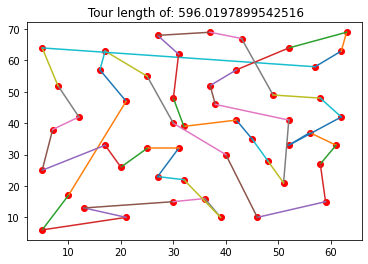

In [302]:
T = [40,30,20,10,5]
n = 100
final = simulated_annealing(test, EI51, n, T)
graph_drawer(final, EI51, True)

# Version two: add exponential

In [315]:
'''
This implements the simulated annealing algorithm
'''

def simulated_annealing(current_tour, original_data, n, T):
    '''
    Current tour is the initial tour
    Original data is raw data
    n defines the length of T
    T is cooling schedule
    '''    
    
    # Step 0: Generate random TSP tour and set i = 1
    ct = current_tour
    i = 1
    
    while i < n:
        
        # Step 1. Execute one step of the 2-OPT and evaluted delta C
        nt = deepcopy(swapping(ct, original_data))
        ntl = tour_length(nt, original_data)     
        print(f'{i}, {tour_length(ct, original_data)-ntl} = {ntl} - {tour_length(ct, original_data)}\n')
        
        
        if  ntl - tour_length(ct, original_data) < 0:
            # Go to step 3.
            # Accept exchange and compute new value of objective funciton
            ct = np.copy(nt)        
            i = i + 1
            print(ct)
            
        '''
        else:
            # Go to step 2.
            beta = np.random.random()
            
            if beta <  np.exp(-(ntl - tour_length(ct, original_data))/T[i]):
                # Go to step 3.
                ct = np.copy(nt)
                i = i + 1
        ''' 
    # Cooling schedule finished: return tour
    print('done')
    return ct

In [306]:
def equilibrium_test(current_length, current_tour, original_data, epoch, t, epsilon):
    
    # Calculate epochs

    for i in range(epoch):
        epoch_route = deepcopy(swapping(ct, original_data))
        epochs.append(tour_length(epoch_route, original_data))
        if tour_length(epoch_route, original_data) - current_length <= epsilon:
            # Value is accepted
            return True
    
    return False

[22 41 47 39  0 36 42 20  7  4 50 16  2 30  3 31 44 43 11 21 35 29 12 18
 32 25 46 27 19 26 34 15 45 38 17  5 14 37 28 13 33 24  6 49 10 23  8  9
 48 40  1 22]


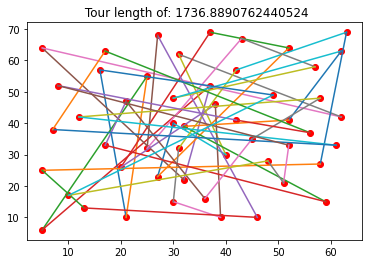

In [323]:
test = np.arange(0, 51)
np.random.shuffle(test)
test = np.append(test, test[0])
print(test)
graph_drawer(test, EI51, True)

1, 35.91846044377212 = 1700.9706158002803 - 1736.8890762440524

[22 41 47 30  0 36 42 20  7  4 50 16  2 39  3 31 44 43 11 21 35 29 12 18
 32 25 46 27 19 26 34 15 45 38 17  5 14 37 28 13 33 24  6 49 10 23  8  9
 48 40  1 22]
2, 56.260449848450435 = 1644.7101659518298 - 1700.9706158002803

[22 41 47 30  0 36 42 20  7  4 50 16  2 39  3 31 44 43 11 21 35 29 12 18
 32 49 46 27 19 26 34 15 45 38 17  5 14 37 28 13 33 24  6 25 10 23  8  9
 48 40  1 22]
3, 23.6450222980975 = 1621.0651436537323 - 1644.7101659518298

[22 41 47 30  0 36 42 20  7  4 50 16 21 39  3 31 44 43 11  2 35 29 12 18
 32 49 46 27 19 26 34 15 45 38 17  5 14 37 28 13 33 24  6 25 10 23  8  9
 48 40  1 22]
4, 5.286399660565394 = 1615.778743993167 - 1621.0651436537323

[22 18 47 30  0 36 42 20  7  4 50 16 21 39  3 31 44 43 11  2 35 29 12 41
 32 49 46 27 19 26 34 15 45 38 17  5 14 37 28 13 33 24  6 25 10 23  8  9
 48 40  1 22]
5, 14.17748907642067 = 1601.6012549167463 - 1615.778743993167

[22 18 47 30  0 36 42 20  7  4 50 16 21 39

35, -49.41546352044065 = 1159.325114202354 - 1109.9096506819133

35, -12.387783135797463 = 1122.2974338177107 - 1109.9096506819133

35, -33.68744634964537 = 1143.5970970315586 - 1109.9096506819133

35, -40.71187810744368 = 1150.621528789357 - 1109.9096506819133

35, -30.894358708962727 = 1140.804009390876 - 1109.9096506819133

35, -23.095752544354355 = 1133.0054032262676 - 1109.9096506819133

35, 1.822940483947832 = 1108.0867101979654 - 1109.9096506819133

[22 47 42 30  0 37 31 20  1 19 21  7 27 10 32  9 44 43 39  2 35 26 40 41
 46 16 33 14 11 28 34 15 36 24 17  5 50 38  4 18 13 23  6 25 45 49  8 29
 48 12  3 22]
36, -41.994621120670445 = 1150.0813313186359 - 1108.0867101979654

36, -7.971284712364877 = 1116.0579949103303 - 1108.0867101979654

36, -70.01260971112765 = 1178.099319909093 - 1108.0867101979654

36, -58.039212209789866 = 1166.1259224077553 - 1108.0867101979654

36, -43.32298439473948 = 1151.409694592705 - 1108.0867101979654

36, 3.276626200452938 = 1104.8100839975125 - 1108


51, -12.60006910256027 = 943.2648644578526 - 930.6647953552923

51, -67.33233587973382 = 997.9971312350261 - 930.6647953552923

51, -91.09833001315405 = 1021.7631253684464 - 930.6647953552923

51, -26.812359998168176 = 957.4771553534605 - 930.6647953552923

51, -84.06299193291966 = 1014.727787288212 - 930.6647953552923

51, -55.008785336210735 = 985.673580691503 - 930.6647953552923

51, -25.62260322513771 = 956.28739858043 - 930.6647953552923

51, -61.447054296351325 = 992.1118496516436 - 930.6647953552923

51, -101.22390310562753 = 1031.8886984609198 - 930.6647953552923

51, -43.692710974093984 = 974.3575063293863 - 930.6647953552923

51, -81.89218266543355 = 1012.5569780207259 - 930.6647953552923

51, -48.35783135737347 = 979.0226267126658 - 930.6647953552923

51, -7.203704650378313 = 937.8685000056706 - 930.6647953552923

51, -2.5848342137469444 = 933.2496295690393 - 930.6647953552923

51, -46.61556934740872 = 977.280364702701 - 930.6647953552923

51, -46.20227827735789 = 976.86707


59, -126.53628843948127 = 999.8732027419877 - 873.3369143025064

59, -22.132208609022314 = 895.4691229115288 - 873.3369143025064

59, -84.8603259338256 = 958.197240236332 - 873.3369143025064

59, -55.74644536346045 = 929.0833596659669 - 873.3369143025064

59, -20.678896135757896 = 894.0158104382643 - 873.3369143025064

59, -66.80636237361034 = 940.1432766761168 - 873.3369143025064

59, -98.91856316517669 = 972.2554774676831 - 873.3369143025064

59, -52.974177272252746 = 926.3110915747592 - 873.3369143025064

59, -135.4379965972695 = 1008.7749108997759 - 873.3369143025064

59, -85.98400852000384 = 959.3209228225103 - 873.3369143025064

59, -79.38162070270846 = 952.7185350052149 - 873.3369143025064

59, 3.8777429657707216 = 869.4591713367357 - 873.3369143025064

[22 25 47  7  0 49 33 28  1 31 21 30 27  9 32 38 44 43 14  2 35 26 17 12
 40 16 46 11 15 20 34 19  5 13 41 36 50 45 39 18 24 23  6 42 10 37  8 29
 48  4  3 22]
60, -80.41200063647614 = 949.8711719732119 - 869.4591713367357

60, 

64, -106.0694753680018 = 920.3298748594337 - 814.2603994914319

64, -83.94928791923985 = 898.2096874106718 - 814.2603994914319

64, -13.217877486114844 = 827.4782769775468 - 814.2603994914319

64, -51.49245316516419 = 865.7528526565961 - 814.2603994914319

64, -86.75323815588604 = 901.013637647318 - 814.2603994914319

64, -49.86395931655852 = 864.1243588079905 - 814.2603994914319

64, -45.5404931513599 = 859.8008926427918 - 814.2603994914319

64, -43.59364955102137 = 857.8540490424533 - 814.2603994914319

64, -56.71988903427382 = 870.9802885257058 - 814.2603994914319

64, -168.60212910126847 = 982.8625285927004 - 814.2603994914319

64, -28.959529439267612 = 843.2199289306996 - 814.2603994914319

64, -172.6068804814712 = 986.8672799729031 - 814.2603994914319

64, -13.026653040968199 = 827.2870525324001 - 814.2603994914319

64, -6.716933642973913 = 820.9773331344059 - 814.2603994914319

64, -63.95833040754417 = 878.2187298989761 - 814.2603994914319

64, -12.414494319286746 = 826.67489381


69, -43.187072717265096 = 835.9321112138023 - 792.7450384965372

69, -50.15009446342685 = 842.895132959964 - 792.7450384965372

69, -83.47371932807562 = 876.2187578246128 - 792.7450384965372

69, -98.43819626958475 = 891.1832347661219 - 792.7450384965372

69, -48.99223848512497 = 841.7372769816621 - 792.7450384965372

69, -77.03989770416888 = 869.784936200706 - 792.7450384965372

69, -7.229888104714746 = 799.9749266012519 - 792.7450384965372

69, -151.09754598148538 = 943.8425844780226 - 792.7450384965372

69, -154.52582808331715 = 947.2708665798543 - 792.7450384965372

69, -80.63535929838667 = 873.3803977949239 - 792.7450384965372

69, -55.49269649138205 = 848.2377349879192 - 792.7450384965372

69, -9.342478884409616 = 802.0875173809468 - 792.7450384965372

69, -17.692968812438835 = 810.438007308976 - 792.7450384965372

69, 2.3523652541333604 = 790.3926732424038 - 792.7450384965372

[22 25 47  7  0 49 15 28  1 31 21 30 27  9 38 32 44 43 10  2 35 13 17 12
 40 16 46 11 33 20 34 19 26 5


76, -118.3861394193566 = 885.960564802557 - 767.5744253832004

76, -57.72795897056699 = 825.3023843537674 - 767.5744253832004

76, -172.60688048147142 = 940.1813058646718 - 767.5744253832004

76, -27.525126359621368 = 795.0995517428217 - 767.5744253832004

76, -8.547231596754955 = 776.1216569799553 - 767.5744253832004

76, -148.30026251889376 = 915.8746879020941 - 767.5744253832004

76, -165.90489185925367 = 933.479317242454 - 767.5744253832004

76, -10.188238281117378 = 777.7626636643178 - 767.5744253832004

76, -32.88830900204289 = 800.4627343852433 - 767.5744253832004

76, -21.690539967842597 = 789.264965351043 - 767.5744253832004

76, -121.8505965427513 = 889.4250219259517 - 767.5744253832004

76, -17.823391148835412 = 785.3978165320358 - 767.5744253832004

76, -74.23324123402176 = 841.8076666172221 - 767.5744253832004

76, -27.79037556507342 = 795.3648009482738 - 767.5744253832004

76, -105.2307026833762 = 872.8051280665766 - 767.5744253832004

76, -40.418667109811054 = 807.99309


78, -27.52512635962148 = 787.5401025141193 - 760.0149761544978

78, -19.03992175532676 = 779.0548979098246 - 760.0149761544978

78, -6.6145503493361275 = 766.629526503834 - 760.0149761544978

78, -128.20366989268143 = 888.2186460471793 - 760.0149761544978

78, -116.31165289339833 = 876.3266290478962 - 760.0149761544978

78, -34.47660199887309 = 794.4915781533709 - 760.0149761544978

78, -79.39581860987778 = 839.4107947643756 - 760.0149761544978

78, -57.87191206271905 = 817.8868882172169 - 760.0149761544978

78, -13.612344199300196 = 773.627320353798 - 760.0149761544978

78, -49.45619368902703 = 809.4711698435249 - 760.0149761544978

78, -13.612344199300196 = 773.627320353798 - 760.0149761544978

78, -103.1274421467117 = 863.1424183012095 - 760.0149761544978

78, -208.8465469483848 = 968.8615231028826 - 760.0149761544978

78, -10.859006989897352 = 770.8739831443952 - 760.0149761544978

78, -165.93989775439923 = 925.9548739088971 - 760.0149761544978

78, -99.56911320916231 = 859.584089


82, -91.82240383293163 = 839.9599700125577 - 748.1375661796261

82, -79.8753211174826 = 828.0128872971087 - 748.1375661796261

82, -28.620210688226962 = 776.7577768678531 - 748.1375661796261

82, -3.4548512626057573 = 751.5924174422319 - 748.1375661796261

82, -29.383793819917855 = 777.521359999544 - 748.1375661796261

82, -3.757011257412273 = 751.8945774370384 - 748.1375661796261

82, -124.97230388417393 = 873.1098700638 - 748.1375661796261

82, -67.72876305282523 = 815.8663292324513 - 748.1375661796261

82, -52.51385039128547 = 800.6514165709116 - 748.1375661796261

82, -5.578356005357364 = 753.7159221849835 - 748.1375661796261

82, -87.28406219220028 = 835.4216283718264 - 748.1375661796261

82, -116.05395965797027 = 864.1915258375964 - 748.1375661796261

82, -117.96816637381698 = 866.1057325534431 - 748.1375661796261

82, -73.802289945501 = 821.9398561251271 - 748.1375661796261

82, -65.08717881946689 = 813.224744999093 - 748.1375661796261

82, -42.34718447380192 = 790.484750653428

83, -208.86016501871745 = 951.3385302418728 - 742.4783652231554

83, -123.5690451548187 = 866.0474103779741 - 742.4783652231554

83, -169.0202805449859 = 911.4986457681413 - 742.4783652231554

83, -17.773745110650566 = 760.252110333806 - 742.4783652231554

83, -14.4018119591517 = 756.8801771823071 - 742.4783652231554

83, -85.04701390415346 = 827.5253791273088 - 742.4783652231554

83, -94.06732515431213 = 836.5456903774675 - 742.4783652231554

83, -72.3783149281744 = 814.8566801513298 - 742.4783652231554

83, -64.07434705406706 = 806.5527122772224 - 742.4783652231554

83, -123.98348784141592 = 866.4618530645713 - 742.4783652231554

83, -83.07656988830797 = 825.5549351114634 - 742.4783652231554

83, -133.14759405237794 = 875.6259592755333 - 742.4783652231554

83, -138.37430785393929 = 880.8526730770947 - 742.4783652231554

83, -176.28984910580994 = 918.7682143289653 - 742.4783652231554

83, -100.24514828913595 = 842.7235135122913 - 742.4783652231554

83, -65.69395675632882 = 808.1723219

85, -81.64350389379888 = 821.6267011134562 - 739.9831972196573

85, -36.33851119818746 = 776.3217084178448 - 739.9831972196573

85, -32.92167566390469 = 772.904872883562 - 739.9831972196573

85, -21.69053996784271 = 761.6737371875 - 739.9831972196573

85, -73.13911317941847 = 813.1223103990758 - 739.9831972196573

85, -31.495853179834967 = 771.4790503994923 - 739.9831972196573

85, -30.366012783098313 = 770.3492100027556 - 739.9831972196573

85, -43.88520221500755 = 783.8683994346649 - 739.9831972196573

85, -77.83439168539235 = 817.8175889050497 - 739.9831972196573

85, -108.72119625674463 = 848.704393476402 - 739.9831972196573

85, -77.75989220005647 = 817.7430894197138 - 739.9831972196573

85, -9.305033591827964 = 749.2882308114853 - 739.9831972196573

85, -144.3417157353848 = 884.3249129550421 - 739.9831972196573

85, -105.00840856318518 = 844.9916057828425 - 739.9831972196573

85, -105.72957638544142 = 845.7127736050987 - 739.9831972196573

85, -2.8420578764798847 = 742.8252550961


87, -60.42585844955761 = 795.5014227044322 - 735.0755642548746

87, -164.8931358170098 = 899.9687000718844 - 735.0755642548746

87, -45.18935352368089 = 780.2649177785555 - 735.0755642548746

87, -136.84369703860602 = 871.9192612934806 - 735.0755642548746

87, -110.33973667614589 = 845.4153009310205 - 735.0755642548746

87, -182.99068796304255 = 918.0662522179172 - 735.0755642548746

87, -176.25109619563455 = 911.3266604505092 - 735.0755642548746

87, -80.38143684765998 = 815.4570011025346 - 735.0755642548746

87, -142.32706514091285 = 877.4026293957875 - 735.0755642548746

87, -21.262310693734094 = 756.3378749486087 - 735.0755642548746

87, -25.94660542443944 = 761.0221696793141 - 735.0755642548746

87, -47.89192358506216 = 782.9674878399368 - 735.0755642548746

87, -57.687633534797556 = 792.7631977896722 - 735.0755642548746

87, -137.05642508996607 = 872.1319893448407 - 735.0755642548746

87, -31.168358273975173 = 766.2439225288498 - 735.0755642548746

87, -10.39843335521789 = 745.4


90, -76.27956492965541 = 808.9791747275569 - 732.6996097979015

90, -57.81947757219018 = 790.5190873700917 - 732.6996097979015

90, -101.94409905237558 = 834.6437088502771 - 732.6996097979015

90, -26.677638304089328 = 759.3772481019909 - 732.6996097979015

90, -75.18588689766909 = 807.8854966955706 - 732.6996097979015

90, -2.2608289358817046 = 734.9604387337832 - 732.6996097979015

90, -14.525171296287908 = 747.2247810941894 - 732.6996097979015

90, -6.495145363803886 = 739.1947551617054 - 732.6996097979015

90, -69.89082895046351 = 802.590438748365 - 732.6996097979015

90, -70.81328606450472 = 803.5128958624063 - 732.6996097979015

90, -111.99445988657658 = 844.6940696844781 - 732.6996097979015

90, -112.35606545292569 = 845.0556752508272 - 732.6996097979015

90, -119.84860336673091 = 852.5482131646324 - 732.6996097979015

90, -67.72699900735802 = 800.4266088052595 - 732.6996097979015

90, -137.05642508996596 = 869.7560348878675 - 732.6996097979015

90, -116.84782882548791 = 849.54

92, -1.7133759931267605 = 732.38037767349 - 730.6670016803632

92, -50.766031522707635 = 781.4330332030709 - 730.6670016803632

92, -35.002340698513876 = 765.6693423788771 - 730.6670016803632

92, -170.68217533556015 = 901.3491770159234 - 730.6670016803632

92, -7.7363583570788705 = 738.4033600374421 - 730.6670016803632

92, -17.78286797683461 = 748.4498696571978 - 730.6670016803632

92, -82.41017238105496 = 813.0771740614182 - 730.6670016803632

92, -84.06690334215273 = 814.733905022516 - 730.6670016803632

92, -99.82106981494553 = 830.4880714953088 - 730.6670016803632

92, -139.40087615014738 = 870.0678778305106 - 730.6670016803632

92, -53.62275839964741 = 784.2897600800106 - 730.6670016803632

92, -68.57178753338053 = 799.2387892137438 - 730.6670016803632

92, -71.0739654559402 = 801.7409671363034 - 730.6670016803632

92, -96.9714700303349 = 827.6384717106981 - 730.6670016803632

92, -3.4548512626056436 = 734.1218529429689 - 730.6670016803632

92, -102.01071330410161 = 832.67771498


94, -1.456001666373595 = 718.065049695651 - 716.6090480292775

94, -55.697430988774045 = 772.3064790180515 - 716.6090480292775

94, -97.30522479693468 = 813.9142728262121 - 716.6090480292775

94, -102.9414785352775 = 819.550526564555 - 716.6090480292775

94, -75.51722293808677 = 792.1262709673642 - 716.6090480292775

94, -97.4366192226613 = 814.0456672519388 - 716.6090480292775

94, -17.891285026489868 = 734.5003330557673 - 716.6090480292775

94, -118.38613941935648 = 834.9951874486339 - 716.6090480292775

94, -147.54749335536394 = 864.1565413846414 - 716.6090480292775

94, -122.06424351167163 = 838.6732915409491 - 716.6090480292775

94, -131.45557967007323 = 848.0646276993507 - 716.6090480292775

94, -66.62741744296147 = 783.2364654722389 - 716.6090480292775

94, -25.84620486218148 = 742.4552528914589 - 716.6090480292775

94, -39.00555870637845 = 755.6146067356559 - 716.6090480292775

94, -27.190870426578044 = 743.7999184558555 - 716.6090480292775

94, -89.47390567327955 = 806.082953


94, -105.73996276679168 = 822.3490107960691 - 716.6090480292775

94, -32.00996331111901 = 748.6190113403965 - 716.6090480292775

94, -14.3269462495889 = 730.9359942788664 - 716.6090480292775

94, -185.42756303121803 = 902.0366110604955 - 716.6090480292775

94, -147.54749335536394 = 864.1565413846414 - 716.6090480292775

94, -120.29577111484889 = 836.9048191441263 - 716.6090480292775

94, -99.82106981494553 = 816.430117844223 - 716.6090480292775

94, -16.50076506824621 = 733.1098130975237 - 716.6090480292775

94, -2.112942960595433 = 718.7219909898729 - 716.6090480292775

94, -60.10528718594935 = 776.7143352152268 - 716.6090480292775

94, -15.261653232732783 = 731.8707012620102 - 716.6090480292775

94, -128.7878202377259 = 845.3968682670034 - 716.6090480292775

94, -127.59054261023391 = 844.1995906395114 - 716.6090480292775

94, -49.394732368543714 = 766.0037803978212 - 716.6090480292775

94, -0.43023124918090616 = 717.0392792784584 - 716.6090480292775

94, -96.70537341625447 = 813.314


94, -8.517123992382722 = 725.1261720216602 - 716.6090480292775

94, -97.30522479693468 = 813.9142728262121 - 716.6090480292775

94, -89.7023757128419 = 806.3114237421194 - 716.6090480292775

94, -55.05586373459221 = 771.6649117638697 - 716.6090480292775

94, -44.11701208768659 = 760.726060116964 - 716.6090480292775

94, -13.783055204165635 = 730.3921032334431 - 716.6090480292775

94, -155.90881328195826 = 872.5178613112357 - 716.6090480292775

94, -111.27162842478845 = 827.8806764540659 - 716.6090480292775

94, -116.3684919380031 = 832.9775399672806 - 716.6090480292775

94, -2.527370148604632 = 719.1364181778821 - 716.6090480292775

94, -107.17422393656545 = 823.7832719658429 - 716.6090480292775

94, -59.38064118222053 = 775.989689211498 - 716.6090480292775

94, -77.71340494755111 = 794.3224529768286 - 716.6090480292775

94, -67.92183062679408 = 784.5308786560715 - 716.6090480292775

94, -13.414015655049184 = 730.0230636843266 - 716.6090480292775

94, -37.69624752760967 = 754.30529555

95, -5.502689428349186 = 717.4020375677513 - 711.8993481394022

95, -39.30120322064488 = 751.200551360047 - 711.8993481394022

95, -37.189440444623756 = 749.0887885840259 - 711.8993481394022

95, -78.1637411293284 = 790.0630892687306 - 711.8993481394022

95, -23.589246306879204 = 735.4885944462814 - 711.8993481394022

95, -143.53150978357348 = 855.4308579229756 - 711.8993481394022

95, -20.202180868835057 = 732.1015290082372 - 711.8993481394022

95, -10.42375075822656 = 722.3230988976287 - 711.8993481394022

95, -128.48981393386634 = 840.3891620732685 - 711.8993481394022

95, -94.50745222684509 = 806.4068003662472 - 711.8993481394022

95, -87.02672756970583 = 798.926075709108 - 711.8993481394022

95, -164.96342719037455 = 876.8627753297767 - 711.8993481394022

95, -165.5905704632953 = 877.4899186026975 - 711.8993481394022

95, -119.74095162863478 = 831.6402997680369 - 711.8993481394022

95, -17.689722432648296 = 729.5890705720504 - 711.8993481394022

95, -26.788821139763286 = 738.68816

98, -17.40502471259481 = 712.2189026392983 - 694.8138779267035

98, -94.39581821475747 = 789.209696141461 - 694.8138779267035

98, -13.325648655963164 = 708.1395265826667 - 694.8138779267035

98, -134.8460961443219 = 829.6599740710254 - 694.8138779267035

98, -75.82991616436118 = 770.6437940910647 - 694.8138779267035

98, -106.97289527779196 = 801.7867732044955 - 694.8138779267035

98, -60.134320502836886 = 754.9481984295404 - 694.8138779267035

98, -155.90881328195871 = 850.7226912086622 - 694.8138779267035

98, -49.99001647395596 = 744.8038944006595 - 694.8138779267035

98, -155.0353484928106 = 849.8492264195141 - 694.8138779267035

98, -39.73132456418489 = 734.5452024908884 - 694.8138779267035

98, -9.56921618462195 = 704.3830941113255 - 694.8138779267035

98, -19.28083506421592 = 714.0947129909194 - 694.8138779267035

98, -116.23788862967024 = 811.0517665563738 - 694.8138779267035

98, -105.14132352756599 = 799.9552014542695 - 694.8138779267035

98, -53.962781130513235 = 748.776659

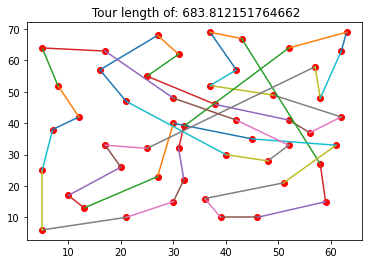

In [324]:
T = [40,30,20,10,5]
n = 100
final = simulated_annealing(test, EI51, n, T)
graph_drawer(final, EI51, True)

In [325]:
T = [40,30,20,10,5]
n = 100
final = simulated_annealing(np.array([0, 31, 10, 37, 4, 48, 8, 49, 15, 1, 28, 20, 33, 29, 9, 38, 32, 44, 14, 43, 36, 16, 3, 17, 46, 11, 45, 50, 26, 47, 5, 13, 24, 12, 40, 18, 41, 39, 0, 21, 27, 30, 7, 25, 6, 22, 23, 42, 2, 19, 34, 35, 0]
                                    ), EI51, n, T)
graph_drawer(final, EI51, True)

1, -52.616615572833894 = 578.2133505452412 - 525.5967349724073

1, -37.594490618834584 = 563.1912255912418 - 525.5967349724073

1, -70.30699276957569 = 595.903727741983 - 525.5967349724073

1, -69.1586742359442 = 594.7554092083515 - 525.5967349724073

1, -28.141192388932836 = 553.7379273613401 - 525.5967349724073

1, -115.9726109885429 = 641.5693459609502 - 525.5967349724073

1, -114.50540750295215 = 640.1021424753594 - 525.5967349724073

1, -151.1103723743148 = 676.7071073467221 - 525.5967349724073

1, -11.65835507033296 = 537.2550900427402 - 525.5967349724073

1, -138.17969168324282 = 663.7764266556501 - 525.5967349724073

1, -151.1103723743148 = 676.7071073467221 - 525.5967349724073

1, -131.40252073695876 = 656.999255709366 - 525.5967349724073

1, -24.84772610864377 = 550.444461081051 - 525.5967349724073

1, -48.82447777142795 = 574.4212127438352 - 525.5967349724073

1, -79.46975785858547 = 605.0664928309927 - 525.5967349724073

1, -179.5999258544715 = 705.1966608268788 - 525.59673

3, -109.44688307631645 = 624.7656519204932 - 515.3187688441767

3, -85.9737574841206 = 601.2925263282973 - 515.3187688441767

3, -151.02146649728672 = 666.3402353414634 - 515.3187688441767

3, -63.87592899866968 = 579.1946978428464 - 515.3187688441767

3, 3.159644363471898 = 512.1591244807048 - 515.3187688441767

[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 39 41 18  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
4, -77.50907677664236 = 589.6682012573472 - 512.1591244807048

4, -8.542206040958035 = 520.7013305216628 - 512.1591244807048

4, -131.94764447606576 = 644.1067689567706 - 512.1591244807048

4, -18.28283011327619 = 530.441954593981 - 512.1591244807048

4, -82.93120862394608 = 595.0903331046509 - 512.1591244807048

4, -135.14080135820132 = 647.2999258389061 - 512.1591244807048

4, -90.83799801697455 = 602.9971224976794 - 512.1591244807048

4, -100.98601662185933 = 613.1451411025641 - 512.1591244807048

4, -61.209867038


5, -90.49229531985708 = 602.4896816268272 - 511.9973863069701

5, -109.23590091579814 = 621.2332872227682 - 511.9973863069701

5, -35.50336922512275 = 547.5007555320929 - 511.9973863069701

5, -138.5725078729909 = 650.569894179961 - 511.9973863069701

5, -96.82547050345426 = 608.8228568104244 - 511.9973863069701

5, -13.015731415354992 = 525.0131177223251 - 511.9973863069701

5, -134.49574756164458 = 646.4931338686147 - 511.9973863069701

5, -8.229261221280865 = 520.226647528251 - 511.9973863069701

5, -159.44029176075338 = 671.4376780677235 - 511.9973863069701

5, -6.940530526551186 = 518.9379168335213 - 511.9973863069701

5, -70.56010697872267 = 582.5574932856928 - 511.9973863069701

5, -80.11498900804946 = 592.1123753150196 - 511.9973863069701

5, -48.26236115203807 = 560.2597474590082 - 511.9973863069701

5, -73.01743277417364 = 585.0148190811437 - 511.9973863069701

5, -82.93120862394613 = 594.9285949309162 - 511.9973863069701

5, -30.66946440593489 = 542.666850712905 - 511.99738


5, -68.35311490159148 = 580.3505012085616 - 511.9973863069701

5, -72.65197789626455 = 584.6493642032347 - 511.9973863069701

5, -51.17266995492224 = 563.1700562618923 - 511.9973863069701

5, -16.46724194212112 = 528.4646282490912 - 511.9973863069701

5, -110.36409485636983 = 622.3614811633399 - 511.9973863069701

5, -135.33378830852467 = 647.3311746154948 - 511.9973863069701

5, -116.47422291806134 = 628.4716092250314 - 511.9973863069701

5, -94.2638580133999 = 606.26124432037 - 511.9973863069701

5, -100.71101995113128 = 612.7084062581014 - 511.9973863069701

5, -178.0385076158721 = 690.0358939228422 - 511.9973863069701

5, -81.07152272588775 = 593.0689090328578 - 511.9973863069701

5, -176.18334170564714 = 688.1807280126172 - 511.9973863069701

5, -119.83952766473891 = 631.836913971709 - 511.9973863069701

5, -45.819329975269795 = 557.8167162822399 - 511.9973863069701

5, -101.01339438338943 = 613.0107806903595 - 511.9973863069701

5, -22.776578347473503 = 534.7739646544436 - 511.9


5, -37.259456721426034 = 549.2568430283961 - 511.9973863069701

5, 7.450701303916048 = 504.54668500305405 - 511.9973863069701

[ 0  0 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 39 18 41 31 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
6, -133.81648643930345 = 638.3631714423575 - 504.54668500305405

6, -87.39016874997998 = 591.936853753034 - 504.54668500305405

6, -77.5403881859798 = 582.0870731890338 - 504.54668500305405

6, -113.94396648146568 = 618.4906514845197 - 504.54668500305405

6, -99.6481703643372 = 604.1948553673913 - 504.54668500305405

6, -14.446850378367287 = 518.9935353814213 - 504.54668500305405

6, -143.74634519759098 = 648.293030200645 - 504.54668500305405

6, -47.61205472884859 = 552.1587397319026 - 504.54668500305405

6, -79.74767117275718 = 584.2943561758112 - 504.54668500305405

6, -164.0265711449186 = 668.5732561479726 - 504.54668500305405

6, -152.51330826832788 = 657.0599932713819 - 504.54668500305405

6, -


6, -179.32420469199502 = 683.8708896950491 - 504.54668500305405

6, -211.2873437720272 = 715.8340287750813 - 504.54668500305405

6, -124.09720368109066 = 628.6438886841447 - 504.54668500305405

6, -64.61985547932983 = 569.1665404823839 - 504.54668500305405

6, -6.0924372833152916 = 510.63912228636934 - 504.54668500305405

6, -20.89779406595261 = 525.4444790690067 - 504.54668500305405

6, -171.7950248706573 = 676.3417098737114 - 504.54668500305405

6, -109.41711930877824 = 613.9638043118323 - 504.54668500305405

6, -148.48257035674357 = 653.0292553597976 - 504.54668500305405

6, -53.76769248576994 = 558.314377488824 - 504.54668500305405

6, -262.73838302678604 = 767.2850680298401 - 504.54668500305405

6, -193.19158691868262 = 697.7382719217367 - 504.54668500305405

6, -116.21030972187606 = 620.7569947249301 - 504.54668500305405

6, -45.819329975269795 = 550.3660149783238 - 504.54668500305405

6, -70.25089926689549 = 574.7975842699495 - 504.54668500305405

6, -164.97658015594476 = 669.5


6, -92.14026865219108 = 596.6869536552451 - 504.54668500305405

6, -92.98842040651044 = 597.5351054095645 - 504.54668500305405

6, -60.22937880931664 = 564.7760638123707 - 504.54668500305405

6, -84.03866814550457 = 588.5853531485586 - 504.54668500305405

6, -106.76786155034739 = 611.3145465534014 - 504.54668500305405

6, -28.275892174038688 = 532.8225771770927 - 504.54668500305405

6, -126.70879919556461 = 631.2554841986187 - 504.54668500305405

6, -70.30699276957586 = 574.8536777726299 - 504.54668500305405

6, -123.32590391663285 = 627.8725889196869 - 504.54668500305405

6, -96.7140214353231 = 601.2607064383772 - 504.54668500305405

6, -73.37750535302808 = 577.9241903560821 - 504.54668500305405

6, -53.612902927760445 = 558.1595879308145 - 504.54668500305405

6, -59.4858641736526 = 564.0325491767067 - 504.54668500305405

6, -80.4622178307232 = 585.0089028337773 - 504.54668500305405

6, -36.40292994396947 = 540.9496149470235 - 504.54668500305405

6, -84.03866814550457 = 588.585353148

6, -29.587701634300686 = 534.1343866373547 - 504.54668500305405

6, -96.34918136156881 = 600.8958663646229 - 504.54668500305405

6, -0.9015603289819865 = 505.44824533203604 - 504.54668500305405

6, -56.60101249426981 = 561.1476974973239 - 504.54668500305405

6, -95.10076978754779 = 599.6474547906018 - 504.54668500305405

6, -113.9926104171505 = 618.5392954202046 - 504.54668500305405

6, -123.03751879095859 = 627.5842037940126 - 504.54668500305405

6, -193.19158691868262 = 697.7382719217367 - 504.54668500305405

6, -205.1717476072459 = 709.7184326102999 - 504.54668500305405

6, -142.55205249773263 = 647.0987375007867 - 504.54668500305405

6, -112.45214225465185 = 616.9988272577059 - 504.54668500305405

6, -95.7546118964886 = 600.3012968995426 - 504.54668500305405

6, -113.51940082796835 = 618.0660858310224 - 504.54668500305405

6, -23.379148166635616 = 527.9258331696897 - 504.54668500305405

6, -187.8325418121545 = 692.3792268152085 - 504.54668500305405

6, -57.05734617691661 = 561.6040


6, -68.21171994387515 = 572.7584049469292 - 504.54668500305405

6, -113.19786571589754 = 617.7445507189516 - 504.54668500305405

6, -53.259525558114376 = 557.8062105611684 - 504.54668500305405

6, -148.33112543805834 = 652.8778104411124 - 504.54668500305405

6, -182.43148204992923 = 686.9781670529833 - 504.54668500305405

6, -214.87003218116985 = 719.4167171842239 - 504.54668500305405

6, -18.506912815541398 = 523.0535978185954 - 504.54668500305405

6, -39.891484784781426 = 544.4381697878355 - 504.54668500305405

6, -39.05594613979321 = 543.6026311428473 - 504.54668500305405

6, -38.57047040068966 = 543.1171554037437 - 504.54668500305405

6, -10.507845954917627 = 515.0545309579717 - 504.54668500305405

6, -100.98601662185939 = 605.5327016249134 - 504.54668500305405

6, -39.24584229795124 = 543.7925273010053 - 504.54668500305405

6, -77.01018461740756 = 581.5568696204616 - 504.54668500305405

6, -63.846717022954465 = 568.3934020260085 - 504.54668500305405

6, -113.3328230900575 = 617.8


6, -101.81883490045294 = 606.365519903507 - 504.54668500305405

6, -151.10966376694665 = 655.6563487700007 - 504.54668500305405

6, -9.514217749856186 = 514.0609027529102 - 504.54668500305405

6, -35.33506779516637 = 539.8817527982204 - 504.54668500305405

6, -38.27491556207116 = 542.8216005651252 - 504.54668500305405

6, -91.12951146389452 = 595.6761964669486 - 504.54668500305405

6, -65.78942882722328 = 570.3361138302773 - 504.54668500305405

6, -191.6426325891985 = 696.1893175922526 - 504.54668500305405

6, -47.62316006355405 = 552.1698450666081 - 504.54668500305405

6, -45.63317776652576 = 550.1798627695798 - 504.54668500305405

6, -51.51830128123771 = 556.0649862842918 - 504.54668500305405

6, -192.99436366635547 = 697.5410486694095 - 504.54668500305405

6, -185.41817785103336 = 689.9648628540874 - 504.54668500305405

6, -140.1640563214267 = 644.7107413244808 - 504.54668500305405

6, -73.31964305372054 = 577.8663280567746 - 504.54668500305405

6, -53.46540826986444 = 558.01209327

6, -87.37877455431072 = 591.9254595573648 - 504.54668500305405

6, -84.57415929851032 = 589.1208443015644 - 504.54668500305405

6, -8.399749059112935 = 512.946434062167 - 504.54668500305405

6, -16.435966788140547 = 520.9826517911946 - 504.54668500305405

6, -39.75775847943629 = 544.3044434824903 - 504.54668500305405

6, -71.96921538827229 = 576.5159003913263 - 504.54668500305405

6, -42.32156390935762 = 546.8682489124117 - 504.54668500305405

6, -90.76921911551727 = 595.3159041185713 - 504.54668500305405

6, -188.16210321305113 = 692.7087882161052 - 504.54668500305405

6, -90.76921911551727 = 595.3159041185713 - 504.54668500305405

6, -81.01602388290058 = 585.5627088859546 - 504.54668500305405

6, -128.56273252296097 = 633.109417526015 - 504.54668500305405

6, -122.32077194233108 = 626.8674569453851 - 504.54668500305405

6, -58.66726085188844 = 563.2139458549425 - 504.54668500305405

6, -7.922501528980263 = 512.4691865320343 - 504.54668500305405

6, -137.35308794358895 = 641.899772946

6, -18.571260989912446 = 523.1179459929665 - 504.54668500305405

6, -33.19097035490648 = 537.7376553579605 - 504.54668500305405

6, -29.51435921191927 = 534.0610442149733 - 504.54668500305405

6, -151.10966376694665 = 655.6563487700007 - 504.54668500305405

6, -32.51022687372182 = 537.0569118767759 - 504.54668500305405

6, -49.548444940801176 = 554.0951299438552 - 504.54668500305405

6, -122.85485629552755 = 627.4015412985816 - 504.54668500305405

6, -16.375388714409553 = 520.9220737174636 - 504.54668500305405

6, -191.6426325891985 = 696.1893175922526 - 504.54668500305405

6, -65.4778454347175 = 570.0245304377715 - 504.54668500305405

6, -20.410021224315358 = 524.9567062273694 - 504.54668500305405

6, -92.98007207549819 = 597.5267570785522 - 504.54668500305405

6, -36.10039381023495 = 540.647078813289 - 504.54668500305405

6, -113.3328230900575 = 617.8795080931116 - 504.54668500305405

6, -94.95278117536765 = 599.4994661784217 - 504.54668500305405

6, -66.49104692485417 = 571.03773192

6, -166.3745297670726 = 670.9212147701267 - 504.54668500305405

6, -92.22477761570764 = 596.7714626187617 - 504.54668500305405

6, -70.30852135706397 = 574.855206360118 - 504.54668500305405

6, -125.81840935274482 = 630.3650943557989 - 504.54668500305405

6, -69.07323540712747 = 573.6199204101815 - 504.54668500305405

6, -12.87958910551771 = 517.4262741085718 - 504.54668500305405

6, -11.778336699756721 = 516.3250217028108 - 504.54668500305405

6, -124.27882287727704 = 628.8255078803311 - 504.54668500305405

6, -82.81873410722625 = 587.3654191102803 - 504.54668500305405

6, -147.28940772832658 = 651.8360927313806 - 504.54668500305405

6, -147.69177252910237 = 652.2384575321564 - 504.54668500305405

6, -26.60254713867704 = 531.1492321417311 - 504.54668500305405

6, -50.24194253436809 = 554.7886275374221 - 504.54668500305405

6, -86.37229314811117 = 590.9189781511652 - 504.54668500305405

6, -43.886797093805455 = 548.4334820968595 - 504.54668500305405

6, -3.685660123947173 = 508.2323451


6, -121.93891946037826 = 626.4856044634323 - 504.54668500305405

6, -131.9476444760656 = 636.4943294791196 - 504.54668500305405

6, -42.18222430817087 = 546.7289093112249 - 504.54668500305405

6, -106.76786155034739 = 611.3145465534014 - 504.54668500305405

6, -31.620027439505236 = 536.1667124425593 - 504.54668500305405

6, -154.51393677674793 = 659.060621779802 - 504.54668500305405

6, -150.29761621680365 = 654.8443012198577 - 504.54668500305405

6, -123.03751879095859 = 627.5842037940126 - 504.54668500305405

6, -18.09533275442317 = 522.6420177574772 - 504.54668500305405

6, -197.57301773412024 = 702.1197027371743 - 504.54668500305405

6, -29.51435921191927 = 534.0610442149733 - 504.54668500305405

6, -195.95796786442764 = 700.5046528674817 - 504.54668500305405

6, -144.74838033412692 = 649.295065337181 - 504.54668500305405

6, -87.37877455431072 = 591.9254595573648 - 504.54668500305405

6, -95.20165062014377 = 599.7483356231978 - 504.54668500305405

6, -187.8325418121545 = 692.3792

6, -92.53903602558518 = 597.0857210286392 - 504.54668500305405

6, -73.24861560400024 = 577.7953006070543 - 504.54668500305405

6, -106.87311110370086 = 611.4197961067549 - 504.54668500305405

6, -26.60254713867704 = 531.1492321417311 - 504.54668500305405

6, -44.40201259244924 = 548.9486975955033 - 504.54668500305405

6, -133.2492705543171 = 637.7959555573711 - 504.54668500305405

6, -142.41547953772402 = 646.9621645407781 - 504.54668500305405

6, -100.3399664066547 = 604.8866514097087 - 504.54668500305405

6, -67.99187238929318 = 572.5385573923472 - 504.54668500305405

6, -89.67761169673355 = 594.2242966997876 - 504.54668500305405

6, -101.5448882583101 = 606.0915732613641 - 504.54668500305405

6, -93.07352379464083 = 597.6202087976949 - 504.54668500305405

6, -147.11595043617905 = 651.6626354392331 - 504.54668500305405

6, -12.869744452643147 = 517.4164294556972 - 504.54668500305405

6, -71.54225875132562 = 576.0889437543797 - 504.54668500305405

6, -48.332640076024575 = 552.8793250

6, -151.56015155995448 = 656.1068365630085 - 504.54668500305405

6, -82.93120862394613 = 587.4778936270002 - 504.54668500305405

6, -102.30383096650661 = 606.8505159695607 - 504.54668500305405

6, -70.56010697872267 = 575.1067919817767 - 504.54668500305405

6, -89.05494753435397 = 593.601632537408 - 504.54668500305405

6, -75.87410941486206 = 580.4207944179161 - 504.54668500305405

6, -172.56246182886986 = 677.1091468319239 - 504.54668500305405

6, -193.56978974394002 = 698.1164747469941 - 504.54668500305405

6, -165.8620483604107 = 670.4087333634648 - 504.54668500305405

6, -118.76118707027837 = 623.3078720733324 - 504.54668500305405

6, -113.08279288880095 = 617.629477891855 - 504.54668500305405

6, -116.06151850951943 = 620.6082035125735 - 504.54668500305405

6, -6.0924372833152916 = 510.63912228636934 - 504.54668500305405

6, -58.69632419981173 = 563.2430092028658 - 504.54668500305405

6, -43.567264900177236 = 548.1139499032313 - 504.54668500305405

6, -214.87003218116985 = 719.416

6, -32.553202152396295 = 537.0998871554503 - 504.54668500305405

6, -43.567264900177236 = 548.1139499032313 - 504.54668500305405

6, -32.10029591596782 = 536.6469809190219 - 504.54668500305405

6, -94.12993900005182 = 598.6766240031059 - 504.54668500305405

6, -117.6562586110154 = 622.2029436140695 - 504.54668500305405

6, -7.691585994639979 = 512.238270997694 - 504.54668500305405

6, -142.55205249773263 = 647.0987375007867 - 504.54668500305405

6, -0.8653727835585414 = 505.4120577866126 - 504.54668500305405

6, -192.05811485809437 = 696.6047998611484 - 504.54668500305405

6, -28.51733236585045 = 533.0640173689045 - 504.54668500305405

6, -8.542206040958092 = 513.0888910440121 - 504.54668500305405

6, -113.51940082796835 = 618.0660858310224 - 504.54668500305405

6, -29.037853616575887 = 533.5845386196299 - 504.54668500305405

6, -56.36270366324999 = 560.909388666304 - 504.54668500305405

6, -140.58452805300436 = 645.1312130560584 - 504.54668500305405

6, -78.75895219062915 = 583.305637

6, -117.6562586110154 = 622.2029436140695 - 504.54668500305405

6, -60.05312077558693 = 564.599805778641 - 504.54668500305405

6, -73.47014337261027 = 578.0168283756643 - 504.54668500305405

6, -38.77672863488675 = 543.3234136379408 - 504.54668500305405

6, -122.32077194233108 = 626.8674569453851 - 504.54668500305405

6, -16.375388714409553 = 520.9220737174636 - 504.54668500305405

6, -4.366926309721464 = 508.9136113127755 - 504.54668500305405

6, -32.51022687372182 = 537.0569118767759 - 504.54668500305405

6, -65.4778454347175 = 570.0245304377715 - 504.54668500305405

6, -69.72611977045386 = 574.2728047735079 - 504.54668500305405

6, -79.17218015891018 = 583.7188651619642 - 504.54668500305405

6, -55.245413547593955 = 559.792098550648 - 504.54668500305405

6, -11.972585712263083 = 516.5192707153171 - 504.54668500305405

6, -14.076453644947776 = 518.6231386480018 - 504.54668500305405

6, -192.05811485809437 = 696.6047998611484 - 504.54668500305405

6, -59.201782738588065 = 563.74846774

6, -54.76556542579493 = 559.312250428849 - 504.54668500305405

6, -60.22937880931664 = 564.7760638123707 - 504.54668500305405

6, -207.8860207626446 = 712.4327057656986 - 504.54668500305405

6, -187.2714021448865 = 691.8180871479406 - 504.54668500305405

6, -29.88055533575158 = 534.4272403388056 - 504.54668500305405

6, -60.22937880931664 = 564.7760638123707 - 504.54668500305405

6, -115.82587399891014 = 620.3725590019642 - 504.54668500305405

6, -149.57331538022282 = 654.1200003832769 - 504.54668500305405

6, -165.43084458907725 = 669.9775295921313 - 504.54668500305405

6, -177.4385235747664 = 681.9852085778205 - 504.54668500305405

6, -101.01339438338943 = 605.5600793864435 - 504.54668500305405

6, -56.55234988734793 = 561.099034890402 - 504.54668500305405

6, -127.71510398807737 = 632.2617889911314 - 504.54668500305405

6, -41.157620790531894 = 545.704305793586 - 504.54668500305405

6, -41.9162707078911 = 546.4629557109452 - 504.54668500305405

6, -109.41711930877824 = 613.963804311

6, -11.778336699756721 = 516.3250217028108 - 504.54668500305405

6, -37.29011367848199 = 541.836798681536 - 504.54668500305405

6, -74.2941643643731 = 578.8408493674272 - 504.54668500305405

6, -69.9763541034668 = 574.5230391065209 - 504.54668500305405

6, -88.00689026802735 = 592.5535752710814 - 504.54668500305405

6, -77.50907677664242 = 582.0557617796965 - 504.54668500305405

6, -61.313975681201384 = 565.8606606842554 - 504.54668500305405

6, -88.7714498376518 = 593.3181348407059 - 504.54668500305405

6, -184.6039445321474 = 689.1506295352015 - 504.54668500305405

6, -16.46724194212112 = 521.0139269451752 - 504.54668500305405

6, -53.805340217899754 = 558.3520252209538 - 504.54668500305405

6, -39.344840473000716 = 543.8915254760548 - 504.54668500305405

6, -81.01602388290058 = 585.5627088859546 - 504.54668500305405

6, -143.67575558742902 = 648.2224405904831 - 504.54668500305405

6, -93.3600528922837 = 597.9067378953378 - 504.54668500305405

6, -135.81148682602094 = 640.35817182907


6, -105.88570761943748 = 610.4323926224915 - 504.54668500305405

6, -179.5999258544719 = 684.146610857526 - 504.54668500305405

6, -211.0492342248229 = 715.595919227877 - 504.54668500305405

6, -107.69594573954947 = 612.2426307426035 - 504.54668500305405

6, -78.02963105199939 = 582.5763160550534 - 504.54668500305405

6, -148.50854486675945 = 653.0552298698135 - 504.54668500305405

6, -77.5403881859798 = 582.0870731890338 - 504.54668500305405

6, -12.016437024495701 = 516.5631220275498 - 504.54668500305405

6, -38.65614128070439 = 543.2028262837584 - 504.54668500305405

6, -155.8272187902433 = 660.3739037932974 - 504.54668500305405

6, -52.64096935932463 = 557.1876543623787 - 504.54668500305405

6, -41.739653338276014 = 546.2863383413301 - 504.54668500305405

6, -155.71991277342119 = 660.2665977764752 - 504.54668500305405

6, -54.38916992578976 = 558.9358549288438 - 504.54668500305405

6, -33.14424493427697 = 537.690929937331 - 504.54668500305405

6, -12.998869011878753 = 517.54555401

6, -40.66974160579508 = 545.2164266088491 - 504.54668500305405

6, -13.998617589815865 = 518.5453025928699 - 504.54668500305405

6, -113.19786571589754 = 617.7445507189516 - 504.54668500305405

6, -39.05594613979321 = 543.6026311428473 - 504.54668500305405

6, -152.27515503021988 = 656.8218400332739 - 504.54668500305405

6, -15.698574101682937 = 520.245259104737 - 504.54668500305405

6, -70.58928882397328 = 575.1359738270273 - 504.54668500305405

6, -154.38414905049154 = 658.9308340535456 - 504.54668500305405

6, -109.23590091579814 = 613.7825859188522 - 504.54668500305405

6, -100.48630242431278 = 605.0329874273668 - 504.54668500305405

6, -63.846717022954465 = 568.3934020260085 - 504.54668500305405

6, -8.801838224065875 = 513.3485232271199 - 504.54668500305405

6, -84.90863455203117 = 589.4553195550852 - 504.54668500305405

6, -115.95642788492825 = 620.5031128879823 - 504.54668500305405

6, -59.9020854910911 = 564.4487704941452 - 504.54668500305405

6, -47.61205472884859 = 552.15873


6, -32.09854571520492 = 536.645230718259 - 504.54668500305405

6, -126.29310673854508 = 630.8397917415991 - 504.54668500305405

6, -178.0385076158721 = 682.5851926189262 - 504.54668500305405

6, -44.88571321581418 = 549.4323982188682 - 504.54668500305405

6, -32.553202152396295 = 537.0998871554503 - 504.54668500305405

6, -28.141192388933007 = 532.6878773919871 - 504.54668500305405

6, -137.35308794358895 = 641.899772946643 - 504.54668500305405

6, -81.01602388290058 = 585.5627088859546 - 504.54668500305405

6, -106.45723065910335 = 611.0039156621574 - 504.54668500305405

6, -96.82547050345426 = 601.3721555065083 - 504.54668500305405

6, -142.68928826629502 = 647.2359732693491 - 504.54668500305405

6, -164.0296296856646 = 668.5763146887186 - 504.54668500305405

6, -82.13874114636707 = 586.6854261494211 - 504.54668500305405

6, -160.72470531676964 = 665.2713903198237 - 504.54668500305405

6, -11.778336699756721 = 516.3250217028108 - 504.54668500305405

6, -137.77550815999217 = 642.3221

6, -71.72666508593676 = 576.2733500889908 - 504.54668500305405

6, -29.649144370635838 = 534.1958293736899 - 504.54668500305405

6, -113.71156967896155 = 618.2582546820156 - 504.54668500305405

6, -47.23711134298952 = 551.7837963460436 - 504.54668500305405

6, -69.83219354081444 = 574.3788785438685 - 504.54668500305405

6, -122.32077194233108 = 626.8674569453851 - 504.54668500305405

6, -111.26521454139385 = 615.8118995444479 - 504.54668500305405

6, -126.29310673854508 = 630.8397917415991 - 504.54668500305405

6, -92.53903602558518 = 597.0857210286392 - 504.54668500305405

6, -132.5586187443767 = 637.1053037474308 - 504.54668500305405

6, -70.41466917071972 = 574.9613541737738 - 504.54668500305405

6, -34.946998129679685 = 539.4936831327337 - 504.54668500305405

6, -170.0653653179641 = 674.6120503210182 - 504.54668500305405

6, -100.98601662185939 = 605.5327016249134 - 504.54668500305405

6, -53.805340217899754 = 558.3520252209538 - 504.54668500305405

6, -73.8660728372177 = 578.41275

6, -2.210734393725943 = 506.75741939678 - 504.54668500305405

6, -107.02819897529076 = 611.5748839783448 - 504.54668500305405

6, -188.4430854303135 = 692.9897704333675 - 504.54668500305405

6, -30.634602568717526 = 535.1812875717716 - 504.54668500305405

6, -12.45048673766604 = 516.9971717407201 - 504.54668500305405

6, -47.02237801612574 = 551.5690630191798 - 504.54668500305405

6, -166.90437236515965 = 671.4510573682137 - 504.54668500305405

6, -18.506912815541398 = 523.0535978185954 - 504.54668500305405

6, -149.24383022727494 = 653.790515230329 - 504.54668500305405

6, -72.02712219628171 = 576.5738071993358 - 504.54668500305405

6, -193.19158691868262 = 697.7382719217367 - 504.54668500305405

6, -188.474815470436 = 693.02150047349 - 504.54668500305405

6, -84.64743180247757 = 589.1941168055316 - 504.54668500305405

6, -8.36225870819959 = 512.9089437112536 - 504.54668500305405

6, -27.36475046980837 = 531.9114354728624 - 504.54668500305405

6, -58.13397210324075 = 562.6806571062948


6, -138.5725078729909 = 643.119192876045 - 504.54668500305405

6, -42.0553145437371 = 546.6019995467911 - 504.54668500305405

6, -80.31921052911304 = 584.8658955321671 - 504.54668500305405

6, -197.22085500574718 = 701.7675400088012 - 504.54668500305405

6, -59.647661153015235 = 564.1943461560693 - 504.54668500305405

6, -90.75896375340727 = 595.3056487564613 - 504.54668500305405

6, -165.46097542616013 = 670.0076604292142 - 504.54668500305405

6, -46.60381813139412 = 551.1505031344482 - 504.54668500305405

6, -170.3686025407174 = 674.9152875437715 - 504.54668500305405

6, -83.75332389821341 = 588.3000089012675 - 504.54668500305405

6, -99.25655135843414 = 603.8032363614882 - 504.54668500305405

6, -17.1436514928958 = 521.6903364959499 - 504.54668500305405

6, -65.4778454347175 = 570.0245304377715 - 504.54668500305405

6, -173.10436876053183 = 677.6510537635859 - 504.54668500305405

6, -50.289377168152726 = 554.8360621712068 - 504.54668500305405

6, -121.38932903624101 = 625.936014039


6, -76.25954514343181 = 580.8062301464859 - 504.54668500305405

6, -79.17218015891018 = 583.7188651619642 - 504.54668500305405

6, -38.11448165477765 = 542.6611666578317 - 504.54668500305405

6, -36.40292994396947 = 540.9496149470235 - 504.54668500305405

6, -71.11473853471404 = 575.6614235377681 - 504.54668500305405

6, -67.57325551196533 = 572.1199405150194 - 504.54668500305405

6, -135.03520554785592 = 639.58189055091 - 504.54668500305405

6, -182.89972780237468 = 687.4464128054287 - 504.54668500305405

6, -101.01339438338943 = 605.5600793864435 - 504.54668500305405

6, -93.31962492061353 = 597.8663099236676 - 504.54668500305405

6, -31.40662621388975 = 535.9533112169438 - 504.54668500305405

6, -110.92139193110057 = 615.4680769341546 - 504.54668500305405

6, -50.178494531665876 = 554.7251795347199 - 504.54668500305405

6, -9.640689376618468 = 514.1873743796725 - 504.54668500305405

6, -178.0385076158721 = 682.5851926189262 - 504.54668500305405

6, -110.71415925647904 = 615.2608442

6, -21.720099004834935 = 526.266784007889 - 504.54668500305405

6, -83.36511662942559 = 587.9118016324796 - 504.54668500305405

6, -50.30708538587902 = 554.8537703889331 - 504.54668500305405

6, -166.90437236515965 = 671.4510573682137 - 504.54668500305405

6, -11.965251580164079 = 516.5119365832181 - 504.54668500305405

6, -23.88010189424989 = 528.4267868973039 - 504.54668500305405

6, -15.698574101682937 = 520.245259104737 - 504.54668500305405

6, -98.30808440234597 = 602.8547694054 - 504.54668500305405

6, -100.54097884846311 = 605.0876638515172 - 504.54668500305405

6, -156.27385008769267 = 660.8205350907467 - 504.54668500305405

6, -46.22661606340267 = 550.7733010664567 - 504.54668500305405

6, -45.63317776652576 = 550.1798627695798 - 504.54668500305405

6, -33.680018980852026 = 538.2267039839061 - 504.54668500305405

6, -103.26239864664336 = 607.8090836496974 - 504.54668500305405

6, -89.52417469167841 = 594.0708596947325 - 504.54668500305405

6, -162.5940678797686 = 667.140752882

6, -184.17928885947396 = 688.725973862528 - 504.54668500305405

6, -3.685660123947173 = 508.2323451270012 - 504.54668500305405

6, -94.82974285978031 = 599.3764278628344 - 504.54668500305405

6, -112.45214225465185 = 616.9988272577059 - 504.54668500305405

6, -83.81721422106654 = 588.3638992241206 - 504.54668500305405

6, -84.39107506293232 = 588.9377600659864 - 504.54668500305405

6, -39.07550894038587 = 543.6221939434399 - 504.54668500305405

6, -78.75895219062915 = 583.3056371936832 - 504.54668500305405

6, -7.842500918936537 = 512.3891859219906 - 504.54668500305405

6, -12.869744452643147 = 517.4164294556972 - 504.54668500305405

6, -68.38380618935031 = 572.9304911924044 - 504.54668500305405

6, -178.0969090661502 = 682.6435940692043 - 504.54668500305405

6, -30.66946440593489 = 535.2161494089889 - 504.54668500305405

6, -124.36201724697895 = 628.908702250033 - 504.54668500305405

6, -19.4520623674386 = 523.9987473704927 - 504.54668500305405

6, -110.26630348644181 = 614.8129884894


6, -144.81196273242523 = 649.3586477354793 - 504.54668500305405

6, -85.30892382579765 = 589.8556088288517 - 504.54668500305405

6, -179.85885486672265 = 684.4055398697767 - 504.54668500305405

6, -46.22661606340267 = 550.7733010664567 - 504.54668500305405

6, -102.71159911334422 = 607.2582841163983 - 504.54668500305405

6, -27.36475046980837 = 531.9114354728624 - 504.54668500305405

6, -125.1440935488991 = 629.6907785519531 - 504.54668500305405

6, -155.8252162205327 = 660.3719012235867 - 504.54668500305405

6, -131.2394783965279 = 635.7861633995819 - 504.54668500305405

6, -113.56318151686929 = 618.1098665199233 - 504.54668500305405

6, -137.12205791597734 = 641.6687429190314 - 504.54668500305405

6, -35.33506779516637 = 539.8817527982204 - 504.54668500305405

6, -118.49491402152472 = 623.0415990245788 - 504.54668500305405

6, -96.33017800222689 = 600.8768630052809 - 504.54668500305405

6, -52.19725317720264 = 556.7439381802567 - 504.54668500305405

6, -60.05312077558693 = 564.59980


6, -52.249881862645054 = 556.7965668656991 - 504.54668500305405

6, -82.09731244322148 = 586.6439974462755 - 504.54668500305405

6, -122.54204363222635 = 627.0887286352804 - 504.54668500305405

6, -10.853287343427098 = 515.3999723464811 - 504.54668500305405

6, -44.397380106040885 = 548.9440651090949 - 504.54668500305405

6, -128.03680016284676 = 632.5834851659008 - 504.54668500305405

6, -24.163136269151266 = 528.7098212722053 - 504.54668500305405

6, -135.3831236547274 = 639.9298086577815 - 504.54668500305405

6, -109.58054376998103 = 614.1272287730351 - 504.54668500305405

6, -112.95460417453802 = 617.5012891775921 - 504.54668500305405

6, -8.399749059112935 = 512.946434062167 - 504.54668500305405

6, -162.6428708522531 = 667.1895558553072 - 504.54668500305405

6, -58.179414291360956 = 562.726099294415 - 504.54668500305405

6, -205.84917708395125 = 710.3958620870053 - 504.54668500305405

6, -126.88949551689103 = 631.4361805199451 - 504.54668500305405

6, -53.612902927760445 = 558.1

6, -80.4622178307232 = 585.0089028337773 - 504.54668500305405

6, -209.21893704813243 = 713.7656220511865 - 504.54668500305405

6, -17.162654204580747 = 521.7093392076348 - 504.54668500305405

6, -21.45582883339938 = 526.0025138364534 - 504.54668500305405

6, -92.73988417085667 = 597.2865691739107 - 504.54668500305405

6, -189.39880017133265 = 693.9454851743867 - 504.54668500305405

6, -115.85970668630426 = 620.4063916893583 - 504.54668500305405

6, -52.22650381372438 = 556.7731888167784 - 504.54668500305405

6, -196.76944811651657 = 701.3161331195706 - 504.54668500305405

6, -138.41078763585466 = 642.9574726389087 - 504.54668500305405

6, -47.191365492478155 = 551.7380504955322 - 504.54668500305405

6, -51.67643225061312 = 556.2231172536672 - 504.54668500305405

6, -69.59978111782021 = 574.1464661208743 - 504.54668500305405

6, -148.63987599333797 = 653.186560996392 - 504.54668500305405

6, -79.52857864689514 = 584.0752636499492 - 504.54668500305405

6, -61.209867038915775 = 565.75655

6, -138.90242151413196 = 643.449106517186 - 504.54668500305405

6, -79.14096943118244 = 583.6876544342365 - 504.54668500305405

6, -178.0969090661502 = 682.6435940692043 - 504.54668500305405

6, -112.10751487037311 = 616.6541998734272 - 504.54668500305405

6, -202.21342991583214 = 706.7601149188862 - 504.54668500305405

6, -85.12768667638176 = 589.6743716794358 - 504.54668500305405

6, -35.905740263886 = 540.45242526694 - 504.54668500305405

6, -29.149153311649627 = 533.6958383147037 - 504.54668500305405

6, -62.72428874206963 = 567.2709737451237 - 504.54668500305405

6, -77.29689955675923 = 581.8435845598133 - 504.54668500305405

6, -30.66946440593489 = 535.2161494089889 - 504.54668500305405

6, -165.43084458907725 = 669.9775295921313 - 504.54668500305405

6, -90.52431113012932 = 595.0709961331834 - 504.54668500305405

6, -105.38977707259033 = 609.9364620756444 - 504.54668500305405

6, -107.69594573954947 = 612.2426307426035 - 504.54668500305405

6, -103.20475801919298 = 607.751443022

6, -35.3597272493584 = 539.9064122524125 - 504.54668500305405

6, -137.77550815999217 = 642.3221931630462 - 504.54668500305405

6, -95.48893670195667 = 600.0356217050107 - 504.54668500305405

6, -133.49340930464638 = 638.0400943077004 - 504.54668500305405

6, -202.32560633810755 = 706.8722913411616 - 504.54668500305405

6, -55.74580929069731 = 560.2924942937514 - 504.54668500305405

6, -29.678216392227284 = 534.2249013952813 - 504.54668500305405

6, -32.37828677593228 = 536.9249717789863 - 504.54668500305405

6, -72.5977212408539 = 577.144406243908 - 504.54668500305405

6, -121.28491826308692 = 625.831603266141 - 504.54668500305405

6, -134.49574756164458 = 639.0424325646986 - 504.54668500305405

6, -116.25511617101171 = 620.8018011740658 - 504.54668500305405

6, -14.659342433139898 = 519.206027436194 - 504.54668500305405

6, -162.5940678797686 = 667.1407528828227 - 504.54668500305405

6, -29.51435921191927 = 534.0610442149733 - 504.54668500305405

6, -185.41817785103336 = 689.96486285

6, -93.48296700791303 = 598.0296520109671 - 504.54668500305405

6, -68.37634165379387 = 572.9230266568479 - 504.54668500305405

6, -24.490234069962924 = 529.036919073017 - 504.54668500305405

6, -92.29015433018577 = 596.8368393332398 - 504.54668500305405

6, -25.23641092936333 = 529.7830959324174 - 504.54668500305405

6, -82.33796793632479 = 586.8846529393788 - 504.54668500305405

6, -42.28025140322171 = 546.8269364062758 - 504.54668500305405

6, -41.46752524926529 = 546.0142102523193 - 504.54668500305405

6, -52.79336799562526 = 557.3400529986793 - 504.54668500305405

6, -108.89013989415349 = 613.4368248972075 - 504.54668500305405

6, -19.49753635600274 = 524.0442213590568 - 504.54668500305405

6, -29.88055533575158 = 534.4272403388056 - 504.54668500305405

6, -130.30698316108857 = 634.8536681641426 - 504.54668500305405

6, -197.57301773412024 = 702.1197027371743 - 504.54668500305405

6, -107.69594573954947 = 612.2426307426035 - 504.54668500305405

6, -95.10076978754779 = 599.64745479

6, -14.180530472024714 = 518.7272154750788 - 504.54668500305405

6, -202.1309201341158 = 706.6776051371698 - 504.54668500305405

6, -104.32267544719872 = 608.8693604502528 - 504.54668500305405

6, -16.90192675361112 = 521.4486117566652 - 504.54668500305405

6, -53.259525558114376 = 557.8062105611684 - 504.54668500305405

6, -60.32810288001798 = 564.874787883072 - 504.54668500305405

6, -20.410021224315358 = 524.9567062273694 - 504.54668500305405

6, -36.8181139912038 = 541.3647989942579 - 504.54668500305405

6, -26.60254713867704 = 531.1492321417311 - 504.54668500305405

6, -23.379148166635616 = 527.9258331696897 - 504.54668500305405

6, -77.31737818647576 = 581.8640631895298 - 504.54668500305405

6, -192.05811485809437 = 696.6047998611484 - 504.54668500305405

6, -74.66548733641213 = 579.2121723394662 - 504.54668500305405

6, -75.66181154145607 = 580.2084965445101 - 504.54668500305405

6, -20.01887738542308 = 524.5655623884771 - 504.54668500305405

6, -42.82301515529667 = 547.36970015

6, -63.47885532687502 = 568.0255403299291 - 504.54668500305405

6, -72.5977212408539 = 577.144406243908 - 504.54668500305405

6, -49.704544566760944 = 554.251229569815 - 504.54668500305405

6, -41.895109292418 = 546.441794295472 - 504.54668500305405

6, -27.65353772033285 = 532.2002227233869 - 504.54668500305405

6, -181.8501947272935 = 686.3968797303476 - 504.54668500305405

6, -24.490234069962924 = 529.036919073017 - 504.54668500305405

6, -98.03558314686171 = 602.5822681499158 - 504.54668500305405

6, -108.89013989415349 = 613.4368248972075 - 504.54668500305405

6, -60.32810288001798 = 564.874787883072 - 504.54668500305405

6, -138.5725078729909 = 643.119192876045 - 504.54668500305405

6, -123.52118568884254 = 628.0678706918966 - 504.54668500305405

6, -105.51024003341473 = 610.0569250364688 - 504.54668500305405

6, -93.3600528922837 = 597.9067378953378 - 504.54668500305405

6, -64.69102732209382 = 569.2377123251479 - 504.54668500305405

6, -31.788502233715064 = 536.3351872367691 - 


6, -95.37029864891821 = 599.9169836519723 - 504.54668500305405

6, -147.88574320301774 = 652.4324282060718 - 504.54668500305405

6, -24.163136269151266 = 528.7098212722053 - 504.54668500305405

6, -36.8181139912038 = 541.3647989942579 - 504.54668500305405

6, -52.811172269945075 = 557.3578572729991 - 504.54668500305405

6, -140.1640563214267 = 644.7107413244808 - 504.54668500305405

6, -18.282830113276248 = 522.8295151163303 - 504.54668500305405

6, -96.39064286976446 = 600.9373278728185 - 504.54668500305405

6, -148.1405694003318 = 652.6872544033859 - 504.54668500305405

6, -68.89083095261054 = 573.4375159556646 - 504.54668500305405

6, -129.11113618002474 = 633.6578211830788 - 504.54668500305405

6, -99.37470868714223 = 603.9213936901963 - 504.54668500305405

6, -132.5586187443767 = 637.1053037474308 - 504.54668500305405

6, -52.64096935932463 = 557.1876543623787 - 504.54668500305405

6, -84.78291946840847 = 589.3296044714625 - 504.54668500305405

6, -13.486974794349123 = 518.033659

6, -6.510897933418619 = 511.05758293647267 - 504.54668500305405

6, -60.667830234244605 = 565.2145152372987 - 504.54668500305405

6, -47.641383425948845 = 552.1880684290029 - 504.54668500305405

6, -57.271543544166036 = 561.8182285472201 - 504.54668500305405

6, -68.15538830663405 = 572.7020733096881 - 504.54668500305405

6, -183.26981196390062 = 687.8164969669547 - 504.54668500305405

6, -69.59978111782021 = 574.1464661208743 - 504.54668500305405

6, -101.5448882583101 = 606.0915732613641 - 504.54668500305405

6, -48.54789172564398 = 553.094576728698 - 504.54668500305405

6, -108.81142822507042 = 613.3581132281245 - 504.54668500305405

6, -67.1981600453451 = 571.7448450483992 - 504.54668500305405

6, -121.92657444735852 = 626.4732594504126 - 504.54668500305405

6, -125.1440935488991 = 629.6907785519531 - 504.54668500305405

6, -123.03751879095859 = 627.5842037940126 - 504.54668500305405

6, -151.10966376694665 = 655.6563487700007 - 504.54668500305405

6, -10.853287343427098 = 515.3999

6, -30.657982737844065 = 535.2046677408981 - 504.54668500305405

6, -90.1291672996029 = 594.675852302657 - 504.54668500305405

6, -33.295661396708454 = 537.8423463997625 - 504.54668500305405

6, -37.509302548680864 = 542.0559875517349 - 504.54668500305405

6, -58.92982669240797 = 563.476511695462 - 504.54668500305405

6, -28.089066831106436 = 532.6357518341605 - 504.54668500305405

6, -64.60531105527645 = 569.1519960583305 - 504.54668500305405

6, -62.052823001300396 = 566.5995080043544 - 504.54668500305405

6, -78.73612113839187 = 583.2828061414459 - 504.54668500305405

6, -71.72666508593676 = 576.2733500889908 - 504.54668500305405

6, -98.49268459892579 = 603.0393696019798 - 504.54668500305405

6, -72.02712219628171 = 576.5738071993358 - 504.54668500305405

6, -56.36270366324999 = 560.909388666304 - 504.54668500305405

6, -32.553202152396295 = 537.0998871554503 - 504.54668500305405

6, -24.562533638354637 = 529.1092186414087 - 504.54668500305405

6, -82.73444167102303 = 587.281126674


6, -67.57325551196533 = 572.1199405150194 - 504.54668500305405

6, -54.840518388035036 = 559.3872033910891 - 504.54668500305405

6, -146.2978896255293 = 650.8445746285834 - 504.54668500305405

6, -59.201782738588065 = 563.7484677416421 - 504.54668500305405

6, -50.90130448456722 = 555.4479894876213 - 504.54668500305405

6, -128.8731667935652 = 633.4198517966192 - 504.54668500305405

6, -50.432144590833616 = 554.9788295938877 - 504.54668500305405

6, -184.6039445321474 = 689.1506295352015 - 504.54668500305405

6, -34.31456319874354 = 538.8612482017976 - 504.54668500305405

6, -9.89201235685681 = 514.4386973599109 - 504.54668500305405

6, -27.10304419550374 = 531.6497291985578 - 504.54668500305405

6, -147.69177252910237 = 652.2384575321564 - 504.54668500305405

6, -122.85485629552755 = 627.4015412985816 - 504.54668500305405

6, -70.58928882397328 = 575.1359738270273 - 504.54668500305405

6, -17.162654204580747 = 521.7093392076348 - 504.54668500305405

6, -46.121431040669506 = 550.66811

6, -175.37462897014353 = 679.9213139731976 - 504.54668500305405

6, -89.05494753435397 = 593.601632537408 - 504.54668500305405

6, -89.23638929963232 = 593.7830743026864 - 504.54668500305405

6, -146.2978896255293 = 650.8445746285834 - 504.54668500305405

6, -105.88570761943748 = 610.4323926224915 - 504.54668500305405

6, -10.853287343427098 = 515.3999723464811 - 504.54668500305405

6, -179.86066435995832 = 684.4073493630124 - 504.54668500305405

6, -148.1405694003318 = 652.6872544033859 - 504.54668500305405

6, -168.07015496728633 = 672.6168399703404 - 504.54668500305405

6, -54.840518388035036 = 559.3872033910891 - 504.54668500305405

6, -62.782216178400006 = 567.3289011814541 - 504.54668500305405

6, -12.998869011878753 = 517.5455540149328 - 504.54668500305405

6, -105.15071660412497 = 609.697401607179 - 504.54668500305405

6, -156.18296289211054 = 660.7296478951646 - 504.54668500305405

6, -36.72946049716239 = 541.2761455002164 - 504.54668500305405

6, -52.249881862645054 = 556.796

6, -101.90982703304422 = 606.4565120360983 - 504.54668500305405

6, -113.22440814850967 = 617.7710931515637 - 504.54668500305405

6, -30.568063914096967 = 535.114748917151 - 504.54668500305405

6, -147.69177252910237 = 652.2384575321564 - 504.54668500305405

6, -168.87418454963523 = 673.4208695526893 - 504.54668500305405

6, -118.6908005883136 = 623.2374855913677 - 504.54668500305405

6, -103.21871509453268 = 607.7654000975867 - 504.54668500305405

6, -94.86315203963323 = 599.4098370426873 - 504.54668500305405

6, -53.259525558114376 = 557.8062105611684 - 504.54668500305405

6, -181.8501947272935 = 686.3968797303476 - 504.54668500305405

6, -170.49878328630717 = 675.0454682893612 - 504.54668500305405

6, -159.9404308985914 = 664.4871159016454 - 504.54668500305405

6, -58.69632419981173 = 563.2430092028658 - 504.54668500305405

6, -128.33579452537862 = 632.8824795284327 - 504.54668500305405

6, -18.003147062438245 = 522.5498320654923 - 504.54668500305405

6, -26.582425940778705 = 531.12


6, -80.79106806902615 = 585.3377530720802 - 504.54668500305405

6, -40.56897976491001 = 545.1156647679641 - 504.54668500305405

6, -61.851474682024275 = 566.3981596850783 - 504.54668500305405

6, -31.755223576240894 = 536.301908579295 - 504.54668500305405

6, -59.76325406939628 = 564.3099390724503 - 504.54668500305405

6, -48.26236115203807 = 552.8090461550921 - 504.54668500305405

6, -53.612902927760445 = 558.1595879308145 - 504.54668500305405

6, -151.26822009279095 = 655.814905095845 - 504.54668500305405

6, -64.63147508900539 = 569.1781600920594 - 504.54668500305405

6, -99.7955892376645 = 604.3422742407186 - 504.54668500305405

6, -83.45563627594771 = 588.0023212790018 - 504.54668500305405

6, -188.57810405832487 = 693.1247890613789 - 504.54668500305405

6, -135.3831236547274 = 639.9298086577815 - 504.54668500305405

6, -90.15373879380678 = 594.7004237968608 - 504.54668500305405

6, -52.14382702867562 = 556.6905120317297 - 504.54668500305405

6, -95.48893670195667 = 600.035621705

6, -80.47764518708829 = 585.0243301901423 - 504.54668500305405

6, -68.21171994387515 = 572.7584049469292 - 504.54668500305405

6, -40.53081125278851 = 545.0774962558426 - 504.54668500305405

6, -27.65353772033285 = 532.2002227233869 - 504.54668500305405

6, -132.5586187443767 = 637.1053037474308 - 504.54668500305405

6, -50.24194253436809 = 554.7886275374221 - 504.54668500305405

6, -147.05609418076762 = 651.6027791838217 - 504.54668500305405

6, -13.693141106044607 = 518.2398261090987 - 504.54668500305405

6, -28.275892174038688 = 532.8225771770927 - 504.54668500305405

6, -95.15640303649758 = 599.7030880395516 - 504.54668500305405

6, -85.85555092208625 = 590.4022359251403 - 504.54668500305405

6, -67.57325551196533 = 572.1199405150194 - 504.54668500305405

6, -46.57557717002652 = 551.1222621730806 - 504.54668500305405

6, -8.133735437570692 = 512.6804204406247 - 504.54668500305405

6, -46.82301332189701 = 551.3696983249511 - 504.54668500305405

6, -14.933163122084864 = 519.47984812


6, -47.23711134298952 = 551.7837963460436 - 504.54668500305405

6, -22.761924320396872 = 527.3086093234509 - 504.54668500305405

6, -85.10180445767156 = 589.6484894607256 - 504.54668500305405

6, -155.8252162205327 = 660.3719012235867 - 504.54668500305405

6, -124.09720368109066 = 628.6438886841447 - 504.54668500305405

6, -95.51170333366218 = 600.0583883367162 - 504.54668500305405

6, -158.02213080877806 = 662.5688158118321 - 504.54668500305405

6, -94.82974285978031 = 599.3764278628344 - 504.54668500305405

6, -47.81453096836509 = 552.3612159714191 - 504.54668500305405

6, -59.82744685974677 = 564.3741318628008 - 504.54668500305405

6, -70.30699276957586 = 574.8536777726299 - 504.54668500305405

6, -142.13498130195995 = 646.681666305014 - 504.54668500305405

6, -127.73894279660914 = 632.2856277996632 - 504.54668500305405

6, -159.693102351788 = 664.2397873548421 - 504.54668500305405

6, -119.73193067750395 = 624.278615680558 - 504.54668500305405

6, -62.64750840606763 = 567.19419340

6, -10.953889998106263 = 515.5005750011603 - 504.54668500305405

6, -54.38916992578976 = 558.9358549288438 - 504.54668500305405

6, -74.49735967275166 = 579.0440446758057 - 504.54668500305405

6, -214.87003218116985 = 719.4167171842239 - 504.54668500305405

6, -191.0645997876432 = 695.6112847906973 - 504.54668500305405

6, -33.295661396708454 = 537.8423463997625 - 504.54668500305405

6, -16.90192675361112 = 521.4486117566652 - 504.54668500305405

6, -37.48934620056235 = 542.0360312036164 - 504.54668500305405

6, -26.659291424807236 = 531.2059764278613 - 504.54668500305405

6, -79.46975785858564 = 584.0164428616397 - 504.54668500305405

6, -79.74767117275718 = 584.2943561758112 - 504.54668500305405

6, -73.82436746620539 = 578.3710524692594 - 504.54668500305405

6, -68.37634165379387 = 572.9230266568479 - 504.54668500305405

6, -94.14450144112794 = 598.691186444182 - 504.54668500305405

6, -10.307926207491107 = 514.8546112105452 - 504.54668500305405

6, -14.933163122084864 = 519.4798481


6, -102.35037331061795 = 606.897058313672 - 504.54668500305405

6, -51.155528241510694 = 555.7022132445647 - 504.54668500305405

6, -122.41879345003355 = 626.9654784530876 - 504.54668500305405

6, -119.87664143643525 = 624.4233264394893 - 504.54668500305405

6, -160.21440166623034 = 664.7610866692844 - 504.54668500305405

6, -31.127542066060926 = 535.674227069115 - 504.54668500305405

6, -71.96921538827229 = 576.5159003913263 - 504.54668500305405

6, -110.36409485636983 = 614.9107798594239 - 504.54668500305405

6, -53.805340217899754 = 558.3520252209538 - 504.54668500305405

6, -108.21169727168314 = 612.7583822747372 - 504.54668500305405

6, -9.514217749856186 = 514.0609027529102 - 504.54668500305405

6, -33.295661396708454 = 537.8423463997625 - 504.54668500305405

6, -11.951111324737042 = 516.4977963277911 - 504.54668500305405

6, -25.696283602546544 = 530.2429686056006 - 504.54668500305405

6, -135.3831236547274 = 639.9298086577815 - 504.54668500305405

6, -82.13874114636707 = 586.6


6, -81.04213851818332 = 585.5888235212374 - 504.54668500305405

6, -89.23638929963232 = 593.7830743026864 - 504.54668500305405

6, -117.77233579440127 = 622.3190207974553 - 504.54668500305405

6, -177.92162120014456 = 682.4683062031986 - 504.54668500305405

6, -93.48296700791303 = 598.0296520109671 - 504.54668500305405

6, -113.20439877462928 = 617.7510837776833 - 504.54668500305405

6, -63.142713829910065 = 567.6893988329641 - 504.54668500305405

6, -75.68304210774414 = 580.2297271107982 - 504.54668500305405

6, -33.14424493427697 = 537.690929937331 - 504.54668500305405

6, -95.48893670195667 = 600.0356217050107 - 504.54668500305405

6, -47.101039794055 = 551.647724797109 - 504.54668500305405

6, -147.0354035909025 = 651.5820885939565 - 504.54668500305405

6, -83.75332389821341 = 588.3000089012675 - 504.54668500305405

6, -119.87664143643525 = 624.4233264394893 - 504.54668500305405

6, -192.99436366635547 = 697.5410486694095 - 504.54668500305405

6, -62.866041257871814 = 567.41272626

6, -82.32881995824306 = 586.8755049612971 - 504.54668500305405

6, -57.05734617691661 = 561.6040311799707 - 504.54668500305405

6, -26.659291424807236 = 531.2059764278613 - 504.54668500305405

6, -93.3600528922837 = 597.9067378953378 - 504.54668500305405

6, -81.43318354766103 = 585.9798685507151 - 504.54668500305405

6, -170.3686025407174 = 674.9152875437715 - 504.54668500305405

6, -37.01483132528625 = 541.5615163283403 - 504.54668500305405

6, -74.48872696730433 = 579.0354119703584 - 504.54668500305405

6, -167.2472900918811 = 671.7939750949351 - 504.54668500305405

6, -85.59974703992413 = 590.1464320429782 - 504.54668500305405

6, -115.97261098854307 = 620.5192959915971 - 504.54668500305405

6, -125.25414128508947 = 629.8008262881435 - 504.54668500305405

6, -30.657982737844065 = 535.2046677408981 - 504.54668500305405

6, -81.04213851818332 = 585.5888235212374 - 504.54668500305405

6, -52.64096935932463 = 557.1876543623787 - 504.54668500305405

6, -121.28935956687968 = 625.83604456

6, -32.765393174502435 = 537.3120781775565 - 504.54668500305405

6, -24.163136269151266 = 528.7098212722053 - 504.54668500305405

6, -90.46308915175774 = 595.0097741548118 - 504.54668500305405

6, -46.22661606340267 = 550.7733010664567 - 504.54668500305405

6, -7.842500918936537 = 512.3891859219906 - 504.54668500305405

6, -33.680018980852026 = 538.2267039839061 - 504.54668500305405

6, -56.18913215856975 = 560.7358171616238 - 504.54668500305405

6, -125.25414128508947 = 629.8008262881435 - 504.54668500305405

6, -95.37029864891821 = 599.9169836519723 - 504.54668500305405

6, -91.12951146389452 = 595.6761964669486 - 504.54668500305405

6, -14.09065981765815 = 518.6373448207122 - 504.54668500305405

6, -107.69594573954947 = 612.2426307426035 - 504.54668500305405

6, -29.104591288606514 = 533.6512762916606 - 504.54668500305405

6, -52.19725317720264 = 556.7439381802567 - 504.54668500305405

6, -129.11113618002474 = 633.6578211830788 - 504.54668500305405

6, -189.0794774865845 = 693.62616

6, -107.91818958210871 = 612.4648745851628 - 504.54668500305405

6, -31.127542066060926 = 535.674227069115 - 504.54668500305405

6, -136.47848712436377 = 641.0251721274178 - 504.54668500305405

6, -31.127542066060926 = 535.674227069115 - 504.54668500305405

6, -46.29420100924864 = 550.8408860123027 - 504.54668500305405

6, -71.97890719882508 = 576.5255922018791 - 504.54668500305405

6, -79.99103458329483 = 584.5377195863489 - 504.54668500305405

6, -26.80911549105855 = 531.3558004941126 - 504.54668500305405

6, -143.67575558742902 = 648.2224405904831 - 504.54668500305405

6, -94.12993900005182 = 598.6766240031059 - 504.54668500305405

6, -21.151193585053818 = 525.6978785881079 - 504.54668500305405

6, -43.90188518203473 = 548.4485701850888 - 504.54668500305405

6, -13.023693414197908 = 517.570378417252 - 504.54668500305405

6, -58.179414291360956 = 562.726099294415 - 504.54668500305405

6, -120.95176266157051 = 625.4984476646246 - 504.54668500305405

6, -93.31962492061353 = 597.8663099


6, -35.61929423067323 = 540.1659792337273 - 504.54668500305405

6, -23.88010189424989 = 528.4267868973039 - 504.54668500305405

6, -47.61205472884859 = 552.1587397319026 - 504.54668500305405

6, -89.67761169673355 = 594.2242966997876 - 504.54668500305405

6, -21.720099004834935 = 526.266784007889 - 504.54668500305405

6, -128.18914138709482 = 632.7358263901489 - 504.54668500305405

6, -152.51330826832788 = 657.0599932713819 - 504.54668500305405

6, -65.09863440771261 = 569.6453194107667 - 504.54668500305405

6, -26.14920568724625 = 530.6958906903003 - 504.54668500305405

6, -4.366926309721464 = 508.9136113127755 - 504.54668500305405

6, -130.17734155817635 = 634.7240265612304 - 504.54668500305405

6, -73.06825679237232 = 577.6149417954264 - 504.54668500305405

6, -124.79256944957734 = 629.3392544526314 - 504.54668500305405

6, -24.766997423333407 = 529.3136824263875 - 504.54668500305405

6, -128.56273252296097 = 633.109417526015 - 504.54668500305405

6, -56.60101249426981 = 561.147697


6, -76.73080360382056 = 581.2774886068746 - 504.54668500305405

6, -136.37201570320673 = 640.9187007062608 - 504.54668500305405

6, -106.87311110370086 = 611.4197961067549 - 504.54668500305405

6, -148.43676792046205 = 652.9834529235161 - 504.54668500305405

6, -66.48949240172539 = 571.0361774047794 - 504.54668500305405

6, -121.05281029418194 = 625.599495297236 - 504.54668500305405

6, -33.19097035490648 = 537.7376553579605 - 504.54668500305405

6, -92.98842040651044 = 597.5351054095645 - 504.54668500305405

6, -130.30698316108857 = 634.8536681641426 - 504.54668500305405

6, -53.76769248576994 = 558.314377488824 - 504.54668500305405

6, -160.7249442553519 = 665.2716292584059 - 504.54668500305405

6, -82.38638287704845 = 586.9330678801025 - 504.54668500305405

6, -211.0492342248229 = 715.595919227877 - 504.54668500305405

6, -61.313975681201384 = 565.8606606842554 - 504.54668500305405

6, -49.621535823754186 = 554.1682208268082 - 504.54668500305405

6, -83.45563627594771 = 588.0023212


6, -115.16647526995195 = 619.713160273006 - 504.54668500305405

6, -76.25954514343181 = 580.8062301464859 - 504.54668500305405

6, -90.54335355755796 = 595.090038560612 - 504.54668500305405

6, -142.68928826629502 = 647.2359732693491 - 504.54668500305405

6, -90.78689552053385 = 595.3335805235879 - 504.54668500305405

6, -29.587701634300686 = 534.1343866373547 - 504.54668500305405

6, -30.568063914096967 = 535.114748917151 - 504.54668500305405

6, -13.023693414197908 = 517.570378417252 - 504.54668500305405

6, -51.70120342541901 = 556.2478884284731 - 504.54668500305405

6, -89.19676133849117 = 593.7434463415452 - 504.54668500305405

6, -78.73612113839187 = 583.2828061414459 - 504.54668500305405

6, -7.691585994639979 = 512.238270997694 - 504.54668500305405

6, -9.514217749856186 = 514.0609027529102 - 504.54668500305405

6, -64.70757636922127 = 569.2542613722753 - 504.54668500305405

6, -103.3396839089167 = 607.8863689119707 - 504.54668500305405

6, -25.191304633585503 = 529.7379896366

6, -109.44688307631651 = 613.9935680793706 - 504.54668500305405

6, -47.23711134298952 = 551.7837963460436 - 504.54668500305405

6, -53.72711596279129 = 558.2738009658453 - 504.54668500305405

6, -37.509302548680864 = 542.0559875517349 - 504.54668500305405

6, -108.66583191789488 = 613.2125169209489 - 504.54668500305405

6, -114.23136918372012 = 618.7780541867742 - 504.54668500305405

6, -49.611509397616885 = 554.1581944006709 - 504.54668500305405

6, -44.226252360557794 = 548.7729373636118 - 504.54668500305405

6, -156.27385008769267 = 660.8205350907467 - 504.54668500305405

6, -97.81900130844548 = 602.3656863114995 - 504.54668500305405

6, -181.09564023073682 = 685.6423252337909 - 504.54668500305405

6, -184.6039445321474 = 689.1506295352015 - 504.54668500305405

6, -178.0385076158721 = 682.5851926189262 - 504.54668500305405

6, -102.71159911334422 = 607.2582841163983 - 504.54668500305405

6, -137.5798645220587 = 642.1265495251128 - 504.54668500305405

6, -17.162654204580747 = 521.70

6, -14.180530472024714 = 518.7272154750788 - 504.54668500305405

6, -118.76118707027837 = 623.3078720733324 - 504.54668500305405

6, -67.31891155419731 = 571.8655965572514 - 504.54668500305405

6, -34.31456319874354 = 538.8612482017976 - 504.54668500305405

6, -107.38471970379356 = 611.9314047068476 - 504.54668500305405

6, -128.8731667935652 = 633.4198517966192 - 504.54668500305405

6, -29.28243543636603 = 533.8291204394201 - 504.54668500305405

6, -211.0492342248229 = 715.595919227877 - 504.54668500305405

6, -148.8928655560308 = 653.4395505590849 - 504.54668500305405

6, -10.454594241229586 = 515.0012792442836 - 504.54668500305405

6, -165.2383369373245 = 669.7850219403786 - 504.54668500305405

6, -188.89274112605864 = 693.4394261291127 - 504.54668500305405

6, -96.1896293294538 = 600.7363143325078 - 504.54668500305405

6, -100.54097884846311 = 605.0876638515172 - 504.54668500305405

6, -207.8860207626446 = 712.4327057656986 - 504.54668500305405

6, -251.06423348270454 = 755.6109184

6, -108.59898190913106 = 613.1456669121851 - 504.54668500305405

6, -99.87916797684358 = 604.4258529798976 - 504.54668500305405

6, -84.59684954409528 = 589.1435345471493 - 504.54668500305405

6, -84.30783118360574 = 588.8545161866598 - 504.54668500305405

6, -114.80099418972219 = 619.3476791927762 - 504.54668500305405

6, -21.515381003361824 = 526.0620660064159 - 504.54668500305405

6, -77.31737818647576 = 581.8640631895298 - 504.54668500305405

6, -133.81648643930345 = 638.3631714423575 - 504.54668500305405

6, -197.57301773412024 = 702.1197027371743 - 504.54668500305405

6, -82.20039629978129 = 586.7470813028353 - 504.54668500305405

6, -66.53385506964202 = 571.0805400726961 - 504.54668500305405

6, -80.4622178307232 = 585.0089028337773 - 504.54668500305405

6, -14.09065981765815 = 518.6373448207122 - 504.54668500305405

6, -5.9110398185092095 = 510.45772482156326 - 504.54668500305405

6, -22.761924320396872 = 527.3086093234509 - 504.54668500305405

6, -166.0352974192818 = 670.58198


6, -46.29420100924864 = 550.8408860123027 - 504.54668500305405

6, -162.5940678797686 = 667.1407528828227 - 504.54668500305405

6, -121.92657444735852 = 626.4732594504126 - 504.54668500305405

6, -23.760874376957247 = 528.3075593800113 - 504.54668500305405

6, -64.61985547932983 = 569.1665404823839 - 504.54668500305405

6, -13.301782350381302 = 517.8484673534354 - 504.54668500305405

6, -117.66436680349108 = 622.2110518065451 - 504.54668500305405

6, -188.89274112605864 = 693.4394261291127 - 504.54668500305405

6, -45.391753228090295 = 549.9384382311443 - 504.54668500305405

6, -19.848244333606146 = 524.3949293366602 - 504.54668500305405

6, -173.1389603831547 = 677.6856453862088 - 504.54668500305405

6, -14.180530472024714 = 518.7272154750788 - 504.54668500305405

6, -8.36225870819959 = 512.9089437112536 - 504.54668500305405

6, -63.439724584866156 = 567.9864095879202 - 504.54668500305405

6, -83.36511662942559 = 587.9118016324796 - 504.54668500305405

6, -187.40489297757568 = 691.95


6, -21.08396831468184 = 525.6306533177359 - 504.54668500305405

6, -160.81730404678598 = 665.36398904984 - 504.54668500305405

6, -148.2720393133066 = 652.8187243163607 - 504.54668500305405

6, -80.11498900804946 = 584.6616740111035 - 504.54668500305405

6, -179.85885486672265 = 684.4055398697767 - 504.54668500305405

6, -128.94385576103474 = 633.4905407640888 - 504.54668500305405

6, -130.17734155817635 = 634.7240265612304 - 504.54668500305405

6, -20.89779406595261 = 525.4444790690067 - 504.54668500305405

6, -56.36270366324999 = 560.909388666304 - 504.54668500305405

6, -190.67633925699403 = 695.2230242600481 - 504.54668500305405

6, -76.30200783978268 = 580.8486928428367 - 504.54668500305405

6, -156.18296289211054 = 660.7296478951646 - 504.54668500305405

6, -119.83916774338655 = 624.3858527464406 - 504.54668500305405

6, -43.90188518203473 = 548.4485701850888 - 504.54668500305405

6, -97.10564911026046 = 601.6523341133145 - 504.54668500305405

6, -134.48787610604865 = 639.034561


6, -12.016437024495701 = 516.5631220275498 - 504.54668500305405

6, -156.27385008769267 = 660.8205350907467 - 504.54668500305405

6, -10.307926207491107 = 514.8546112105452 - 504.54668500305405

6, -146.15177267139717 = 650.6984576744512 - 504.54668500305405

6, -92.29015433018577 = 596.8368393332398 - 504.54668500305405

6, -153.53767585221118 = 658.0843608552652 - 504.54668500305405

6, -44.986661032674704 = 549.5333460357288 - 504.54668500305405

6, -52.14382702867562 = 556.6905120317297 - 504.54668500305405

6, -101.4488611323755 = 605.9955461354295 - 504.54668500305405

6, -20.89779406595261 = 525.4444790690067 - 504.54668500305405

6, -61.40074578560535 = 565.9474307886594 - 504.54668500305405

6, -123.4428245545351 = 627.9895095575891 - 504.54668500305405

6, -75.68304210774414 = 580.2297271107982 - 504.54668500305405

6, -14.180530472024714 = 518.7272154750788 - 504.54668500305405

6, -31.755223576240894 = 536.301908579295 - 504.54668500305405

6, -13.301782350381302 = 517.848

6, -57.271543544166036 = 561.8182285472201 - 504.54668500305405

6, -148.50854486675945 = 653.0552298698135 - 504.54668500305405

6, -124.36201724697895 = 628.908702250033 - 504.54668500305405

6, -48.26236115203807 = 552.8090461550921 - 504.54668500305405

6, -88.00689026802735 = 592.5535752710814 - 504.54668500305405

6, -136.47848712436377 = 641.0251721274178 - 504.54668500305405

6, -38.97987151827516 = 543.5265565213292 - 504.54668500305405

6, -30.657982737844065 = 535.2046677408981 - 504.54668500305405

6, -102.27302903620745 = 606.8197140392615 - 504.54668500305405

6, -102.71159911334422 = 607.2582841163983 - 504.54668500305405

6, -30.766220261913247 = 535.3129052649673 - 504.54668500305405

6, -40.048514698470456 = 544.5951997015245 - 504.54668500305405

6, -11.743553027824134 = 516.2902380308782 - 504.54668500305405

6, -112.20468007629103 = 616.7513650793451 - 504.54668500305405

6, -92.73988417085667 = 597.2865691739107 - 504.54668500305405

6, -24.766997423333407 = 529.3


6, -93.60844709355689 = 598.1551320966109 - 504.54668500305405

6, -117.42471556800484 = 621.9714005710589 - 504.54668500305405

6, -53.72711596279129 = 558.2738009658453 - 504.54668500305405

6, -118.76118707027837 = 623.3078720733324 - 504.54668500305405

6, -86.65222501124373 = 591.1989100142978 - 504.54668500305405

6, -49.548444940801176 = 554.0951299438552 - 504.54668500305405

6, -66.00123408078781 = 570.5479190838419 - 504.54668500305405

6, -189.39880017133265 = 693.9454851743867 - 504.54668500305405

6, -53.72711596279129 = 558.2738009658453 - 504.54668500305405

6, -96.9889291241289 = 601.535614127183 - 504.54668500305405

6, -96.7140214353231 = 601.2607064383772 - 504.54668500305405

6, -89.67761169673355 = 594.2242966997876 - 504.54668500305405

6, -135.11422262028583 = 639.6609076233399 - 504.54668500305405

6, -19.464647023430473 = 524.0113320264845 - 504.54668500305405

6, -66.1796874302791 = 570.7263724333332 - 504.54668500305405

6, -107.02819897529076 = 611.57488397


6, -155.36052118307083 = 659.9072061861249 - 504.54668500305405

6, -115.29520615306939 = 619.8418911561234 - 504.54668500305405

6, -105.5156455851789 = 610.062330588233 - 504.54668500305405

6, -93.48296700791303 = 598.0296520109671 - 504.54668500305405

6, -191.6426325891985 = 696.1893175922526 - 504.54668500305405

6, -75.68304210774414 = 580.2297271107982 - 504.54668500305405

6, -139.72002271139291 = 644.266707714447 - 504.54668500305405

6, -25.685738072804554 = 530.2324230758586 - 504.54668500305405

6, -46.020375536545146 = 550.5670605395992 - 504.54668500305405

6, -79.46975785858564 = 584.0164428616397 - 504.54668500305405

6, -88.44026221511518 = 592.9869472181692 - 504.54668500305405

6, -158.48374740862124 = 663.0304324116753 - 504.54668500305405

6, -82.20039629978129 = 586.7470813028353 - 504.54668500305405

6, -64.0054887189811 = 568.5521737220351 - 504.54668500305405

6, -100.54097884846311 = 605.0876638515172 - 504.54668500305405

6, -149.2163048254152 = 653.7629898


6, -78.70662385468137 = 583.2533088577354 - 504.54668500305405

6, -170.49878328630717 = 675.0454682893612 - 504.54668500305405

6, -42.133812154733334 = 546.6804971577874 - 504.54668500305405

6, -77.01018461740756 = 581.5568696204616 - 504.54668500305405

6, -3.841697809628158 = 508.3883828126822 - 504.54668500305405

6, -79.94432663207618 = 584.4910116351302 - 504.54668500305405

6, -35.10536214850055 = 539.6520471515546 - 504.54668500305405

6, -80.31921052911304 = 584.8658955321671 - 504.54668500305405

6, -43.6777220068123 = 548.2244070098664 - 504.54668500305405

6, -88.52408310773995 = 593.070768110794 - 504.54668500305405

6, -66.24315152310083 = 570.7898365261549 - 504.54668500305405

6, -69.49702576947249 = 574.0437107725265 - 504.54668500305405

6, -93.12291890645776 = 597.6696039095118 - 504.54668500305405

6, -99.87916797684358 = 604.4258529798976 - 504.54668500305405

6, -69.07323540712747 = 573.6199204101815 - 504.54668500305405

6, -109.16227023811945 = 613.7089552411

6, -42.0553145437371 = 546.6019995467911 - 504.54668500305405

6, -92.22477761570764 = 596.7714626187617 - 504.54668500305405

6, -59.08130351347728 = 563.6279885165313 - 504.54668500305405

6, -24.562533638354637 = 529.1092186414087 - 504.54668500305405

6, -48.332640076024575 = 552.8793250790786 - 504.54668500305405

6, -28.275892174038688 = 532.8225771770927 - 504.54668500305405

6, -53.903119089770655 = 558.4498040928247 - 504.54668500305405

6, -140.36946447191264 = 644.9161494749667 - 504.54668500305405

6, -87.26269906237309 = 591.8093840654271 - 504.54668500305405

6, -63.875928998669735 = 568.4226140017238 - 504.54668500305405

6, -112.95969403578493 = 617.506379038839 - 504.54668500305405

6, -19.531091363414077 = 524.0777763664681 - 504.54668500305405

6, -105.87912275445711 = 610.4258077575112 - 504.54668500305405

6, -112.20468007629103 = 616.7513650793451 - 504.54668500305405

6, -31.335874889778154 = 535.8825598928322 - 504.54668500305405

6, -37.509302548680864 = 542.05

6, -150.9845238720191 = 655.5312088750732 - 504.54668500305405

6, -96.9889291241289 = 601.535614127183 - 504.54668500305405

6, -145.48737751404911 = 650.0340625171032 - 504.54668500305405

6, -117.33459295765016 = 621.8812779607042 - 504.54668500305405

6, -149.7085506172885 = 654.2552356203425 - 504.54668500305405

6, -51.093013425064726 = 555.6396984281188 - 504.54668500305405

6, -111.26521454139385 = 615.8118995444479 - 504.54668500305405

6, -94.14450144112794 = 598.691186444182 - 504.54668500305405

6, -35.50336922512275 = 540.0500542281768 - 504.54668500305405

6, -164.97658015594476 = 669.5232651589988 - 504.54668500305405

6, -111.26521454139385 = 615.8118995444479 - 504.54668500305405

6, -76.33365279048695 = 580.880337793541 - 504.54668500305405

6, -84.18405764379582 = 588.7307426468499 - 504.54668500305405

6, -47.320624476982005 = 551.867309480036 - 504.54668500305405

6, -49.548444940801176 = 554.0951299438552 - 504.54668500305405

6, -73.22608498230176 = 577.772769985

6, -30.766220261913247 = 535.3129052649673 - 504.54668500305405

6, -100.34869748169336 = 604.8953824847474 - 504.54668500305405

6, -59.9020854910911 = 564.4487704941452 - 504.54668500305405

6, -181.36592679026404 = 685.9126117933181 - 504.54668500305405

6, -55.07242577164203 = 559.6191107746961 - 504.54668500305405

6, -125.1440935488991 = 629.6907785519531 - 504.54668500305405

6, -60.22937880931664 = 564.7760638123707 - 504.54668500305405

6, -51.155528241510694 = 555.7022132445647 - 504.54668500305405

6, -25.685738072804554 = 530.2324230758586 - 504.54668500305405

6, -61.313975681201384 = 565.8606606842554 - 504.54668500305405

6, -52.811172269945075 = 557.3578572729991 - 504.54668500305405

6, -59.08130351347728 = 563.6279885165313 - 504.54668500305405

6, -60.667830234244605 = 565.2145152372987 - 504.54668500305405

6, -165.2383369373245 = 669.7850219403786 - 504.54668500305405

6, -61.40074578560535 = 565.9474307886594 - 504.54668500305405

6, -113.94396648146568 = 618.4906


6, -192.05811485809437 = 696.6047998611484 - 504.54668500305405

6, -11.471703258132209 = 516.0183882611863 - 504.54668500305405

6, -187.2714021448865 = 691.8180871479406 - 504.54668500305405

6, -54.76556542579493 = 559.312250428849 - 504.54668500305405

6, -181.09564023073682 = 685.6423252337909 - 504.54668500305405

6, -136.27127339012083 = 640.8179583931749 - 504.54668500305405

6, -47.61205472884859 = 552.1587397319026 - 504.54668500305405

6, -151.02146649728678 = 655.5681515003408 - 504.54668500305405

6, -84.8042355183207 = 589.3509205213747 - 504.54668500305405

6, -34.946998129679685 = 539.4936831327337 - 504.54668500305405

6, -51.67643225061312 = 556.2231172536672 - 504.54668500305405

6, -39.75775847943629 = 544.3044434824903 - 504.54668500305405

6, -127.55704234660112 = 632.1037273496552 - 504.54668500305405

6, -149.57331538022282 = 654.1200003832769 - 504.54668500305405

6, -53.022932048122186 = 557.5696170511762 - 504.54668500305405

6, -81.43318354766103 = 585.9798

6, -100.84931994535515 = 605.3960049484092 - 504.54668500305405

6, -8.36225870819959 = 512.9089437112536 - 504.54668500305405

6, -84.57415929851032 = 589.1208443015644 - 504.54668500305405

6, -40.058442867950646 = 544.6051278710047 - 504.54668500305405

6, -54.840518388035036 = 559.3872033910891 - 504.54668500305405

6, -150.9845238720191 = 655.5312088750732 - 504.54668500305405

6, -193.07129705575227 = 697.6179820588063 - 504.54668500305405

6, -40.2226618888663 = 544.7693468919203 - 504.54668500305405

6, -109.41711930877824 = 613.9638043118323 - 504.54668500305405

6, -78.47495285652877 = 583.0216378595828 - 504.54668500305405

6, -13.938933400467306 = 518.4856184035214 - 504.54668500305405

6, -30.836934134103387 = 535.3836191371574 - 504.54668500305405

6, -109.16227023811945 = 613.7089552411735 - 504.54668500305405

6, -39.05594613979321 = 543.6026311428473 - 504.54668500305405

6, -132.85554435188902 = 637.4022293549431 - 504.54668500305405

6, -102.30383096650661 = 606.8505


6, -79.52857864689514 = 584.0752636499492 - 504.54668500305405

6, -76.09971746353727 = 580.6464024665913 - 504.54668500305405

6, -137.5798645220587 = 642.1265495251128 - 504.54668500305405

6, -88.52408310773995 = 593.070768110794 - 504.54668500305405

6, -171.34031196543498 = 675.886996968489 - 504.54668500305405

6, -65.94591872939606 = 570.4926037324501 - 504.54668500305405

6, -5.9110398185092095 = 510.45772482156326 - 504.54668500305405

6, -29.412367082101866 = 533.9590520851559 - 504.54668500305405

6, -254.92529793019168 = 759.4719829332457 - 504.54668500305405

6, -47.61205472884859 = 552.1587397319026 - 504.54668500305405

6, -67.88358350525033 = 572.4302685083044 - 504.54668500305405

6, -181.0143107656325 = 685.5609957686866 - 504.54668500305405

6, -46.57557717002652 = 551.1222621730806 - 504.54668500305405

6, -34.31456319874354 = 538.8612482017976 - 504.54668500305405

6, -37.98339655287765 = 542.5300815559317 - 504.54668500305405

6, -100.52194777166648 = 605.0686327


6, -24.438267794542924 = 528.984952797597 - 504.54668500305405

6, -67.19683702948788 = 571.7435220325419 - 504.54668500305405

6, -147.0060664796643 = 651.5527514827183 - 504.54668500305405

6, -142.55205249773263 = 647.0987375007867 - 504.54668500305405

6, -51.46269486198031 = 556.0093798650344 - 504.54668500305405

6, -115.21262655427432 = 619.7593115573284 - 504.54668500305405

6, -45.28466009719301 = 549.8313451002471 - 504.54668500305405

6, -103.26239864664336 = 607.8090836496974 - 504.54668500305405

6, -133.44249101135694 = 637.989176014411 - 504.54668500305405

6, -75.30581320673053 = 579.8524982097846 - 504.54668500305405

6, -57.78403539537754 = 562.3307203984316 - 504.54668500305405

6, -78.47495285652877 = 583.0216378595828 - 504.54668500305405

6, -196.4084425374047 = 700.9551275404588 - 504.54668500305405

6, -188.33330420130875 = 692.8799892043628 - 504.54668500305405

6, -101.5448882583101 = 606.0915732613641 - 504.54668500305405

6, -57.05734617691661 = 561.6040311


6, -22.776578347473503 = 527.3232633505276 - 504.54668500305405

6, -69.07323540712747 = 573.6199204101815 - 504.54668500305405

6, -26.659291424807236 = 531.2059764278613 - 504.54668500305405

6, -68.89083095261054 = 573.4375159556646 - 504.54668500305405

6, -77.50907677664242 = 582.0557617796965 - 504.54668500305405

6, -42.163349510073715 = 546.7100345131278 - 504.54668500305405

6, -35.50336922512275 = 540.0500542281768 - 504.54668500305405

6, -143.67979718557154 = 648.2264821886256 - 504.54668500305405

6, -22.776578347473503 = 527.3232633505276 - 504.54668500305405

6, -196.03736963509078 = 700.5840546381448 - 504.54668500305405

6, -151.10966376694665 = 655.6563487700007 - 504.54668500305405

6, -42.82301515529667 = 547.3697001583507 - 504.54668500305405

6, -77.21265425779671 = 581.7593392608508 - 504.54668500305405

6, -86.65222501124373 = 591.1989100142978 - 504.54668500305405

6, -40.66974160579508 = 545.2164266088491 - 504.54668500305405

6, -178.0385076158721 = 682.5851

6, -132.9137766115894 = 637.4604616146435 - 504.54668500305405

6, -154.51393677674793 = 659.060621779802 - 504.54668500305405

6, -9.640689376618468 = 514.1873743796725 - 504.54668500305405

6, -53.139033927917524 = 557.6857189309716 - 504.54668500305405

6, -11.640839708095484 = 516.1875247111495 - 504.54668500305405

6, -187.40489297757568 = 691.9515779806297 - 504.54668500305405

6, -41.46752524926529 = 546.0142102523193 - 504.54668500305405

6, -54.840518388035036 = 559.3872033910891 - 504.54668500305405

6, -152.51330826832788 = 657.0599932713819 - 504.54668500305405

6, -129.11113618002474 = 633.6578211830788 - 504.54668500305405

6, -116.47422291806134 = 621.0209079211154 - 504.54668500305405

6, -35.26981803942164 = 539.8165030424757 - 504.54668500305405

6, -195.95796786442764 = 700.5046528674817 - 504.54668500305405

6, -94.00901839782301 = 598.5557034008771 - 504.54668500305405

6, -162.59169497419686 = 667.1383799772509 - 504.54668500305405

6, -24.438267794542924 = 528.98


6, -117.42471556800484 = 621.9714005710589 - 504.54668500305405

6, -167.0861056576844 = 671.6327906607385 - 504.54668500305405

6, -130.15348007313634 = 634.7001650761904 - 504.54668500305405

6, -119.87664143643525 = 624.4233264394893 - 504.54668500305405

6, -155.8252162205327 = 660.3719012235867 - 504.54668500305405

6, -62.109210229213716 = 566.6558952322678 - 504.54668500305405

6, -93.48296700791303 = 598.0296520109671 - 504.54668500305405

6, -113.94396648146568 = 618.4906514845197 - 504.54668500305405

6, -45.28466009719301 = 549.8313451002471 - 504.54668500305405

6, -47.101039794055 = 551.647724797109 - 504.54668500305405

6, -11.579516708990639 = 516.1262017120447 - 504.54668500305405

6, -83.45563627594771 = 588.0023212790018 - 504.54668500305405

6, -189.0794774865845 = 693.6261624896385 - 504.54668500305405

6, -33.14424493427697 = 537.690929937331 - 504.54668500305405

6, -11.465200673938114 = 516.0118856769922 - 504.54668500305405

6, -124.02253635005474 = 628.5692213

6, -81.43318354766103 = 585.9798685507151 - 504.54668500305405

6, -80.47764518708829 = 585.0243301901423 - 504.54668500305405

6, -151.26822009279095 = 655.814905095845 - 504.54668500305405

6, -10.454594241229586 = 515.0012792442836 - 504.54668500305405

6, -74.97016514216995 = 579.516850145224 - 504.54668500305405

6, -188.18514012364568 = 692.7318251266997 - 504.54668500305405

6, -129.11113618002474 = 633.6578211830788 - 504.54668500305405

6, -0.9015603289819865 = 505.44824533203604 - 504.54668500305405

6, -59.70461321684007 = 564.2512982198941 - 504.54668500305405

6, -7.981616091867124 = 512.5283010949212 - 504.54668500305405

6, -79.14096943118244 = 583.6876544342365 - 504.54668500305405

6, -115.95642788492825 = 620.5031128879823 - 504.54668500305405

6, -101.85836812595454 = 606.4050531290086 - 504.54668500305405

6, -77.13596768750546 = 581.6826526905595 - 504.54668500305405

6, -109.96509185486644 = 614.5117768579205 - 504.54668500305405

6, -84.39107506293232 = 588.93776

6, -71.40704214395038 = 575.9537271470044 - 504.54668500305405

6, -123.03751879095859 = 627.5842037940126 - 504.54668500305405

6, -51.155528241510694 = 555.7022132445647 - 504.54668500305405

6, -51.67643225061312 = 556.2231172536672 - 504.54668500305405

6, -61.14362452141046 = 565.6903095244645 - 504.54668500305405

6, -61.683999177881844 = 566.2306841809359 - 504.54668500305405

6, -26.14920568724625 = 530.6958906903003 - 504.54668500305405

6, -113.74908941460814 = 618.2957744176622 - 504.54668500305405

6, -188.16210321305113 = 692.7087882161052 - 504.54668500305405

6, -171.97868034517415 = 676.5253653482282 - 504.54668500305405

6, -149.24383022727494 = 653.790515230329 - 504.54668500305405

6, -51.67643225061312 = 556.2231172536672 - 504.54668500305405

6, -98.86452815552099 = 603.411213158575 - 504.54668500305405

6, -135.03520554785592 = 639.58189055091 - 504.54668500305405

6, -100.3399664066547 = 604.8866514097087 - 504.54668500305405

6, -119.39199120226687 = 623.9386762


6, -69.72611977045386 = 574.2728047735079 - 504.54668500305405

6, -85.65288151318924 = 590.1995665162433 - 504.54668500305405

6, -151.26822009279095 = 655.814905095845 - 504.54668500305405

6, -111.9961042177934 = 616.5427892208475 - 504.54668500305405

6, -12.569287362147804 = 517.1159723652019 - 504.54668500305405

6, -142.0864697507091 = 646.6331547537632 - 504.54668500305405

6, -83.45563627594771 = 588.0023212790018 - 504.54668500305405

6, -30.568063914096967 = 535.114748917151 - 504.54668500305405

6, -141.71615158670494 = 646.262836589759 - 504.54668500305405

6, -21.45582883339938 = 526.0025138364534 - 504.54668500305405

6, -135.0673661163433 = 639.6140511193973 - 504.54668500305405

6, -131.61273953632445 = 636.1594245393785 - 504.54668500305405

6, -144.24902726169972 = 648.7957122647538 - 504.54668500305405

6, -62.72428874206963 = 567.2709737451237 - 504.54668500305405

6, -251.06423348270454 = 755.6109184857586 - 504.54668500305405

6, -90.15373879380678 = 594.7004237


6, -196.4084425374047 = 700.9551275404588 - 504.54668500305405

6, -0.8653727835585414 = 505.4120577866126 - 504.54668500305405

6, -58.13397210324075 = 562.6806571062948 - 504.54668500305405

6, -83.36511662942559 = 587.9118016324796 - 504.54668500305405

6, -131.9476444760656 = 636.4943294791196 - 504.54668500305405

6, -193.07129705575227 = 697.6179820588063 - 504.54668500305405

6, -31.40662621388975 = 535.9533112169438 - 504.54668500305405

6, -69.69460080764685 = 574.2412858107009 - 504.54668500305405

6, -59.060810598111914 = 563.607495601166 - 504.54668500305405

6, -37.32972448776883 = 541.8764094908229 - 504.54668500305405

6, -119.83916774338655 = 624.3858527464406 - 504.54668500305405

6, -32.51022687372182 = 537.0569118767759 - 504.54668500305405

6, -53.805340217899754 = 558.3520252209538 - 504.54668500305405

6, -77.21265425779671 = 581.7593392608508 - 504.54668500305405

6, -116.06151850951943 = 620.6082035125735 - 504.54668500305405

6, -77.13596768750546 = 581.682652

6, -62.78088875747545 = 567.3275737605295 - 504.54668500305405

6, -73.06825679237232 = 577.6149417954264 - 504.54668500305405

6, -133.90725687777564 = 638.4539418808297 - 504.54668500305405

6, -136.55363069474475 = 641.1003156977988 - 504.54668500305405

6, -112.95460417453802 = 617.5012891775921 - 504.54668500305405

6, -95.83781143364655 = 600.3844964367006 - 504.54668500305405

6, -126.88949551689103 = 631.4361805199451 - 504.54668500305405

6, -29.104591288606514 = 533.6512762916606 - 504.54668500305405

6, -151.26822009279095 = 655.814905095845 - 504.54668500305405

6, -115.82587399891014 = 620.3725590019642 - 504.54668500305405

6, -89.52417469167841 = 594.0708596947325 - 504.54668500305405

6, -68.37634165379387 = 572.9230266568479 - 504.54668500305405

6, -116.47422291806134 = 621.0209079211154 - 504.54668500305405

6, -156.89624194162622 = 661.4429269446803 - 504.54668500305405

6, -13.36886608834999 = 517.915551091404 - 504.54668500305405

6, -180.84301429089606 = 685.3896


6, -73.37750535302808 = 577.9241903560821 - 504.54668500305405

6, -181.36592679026404 = 685.9126117933181 - 504.54668500305405

6, -113.51940082796835 = 618.0660858310224 - 504.54668500305405

6, -128.94385576103474 = 633.4905407640888 - 504.54668500305405

6, -79.66026711832313 = 584.2069521213772 - 504.54668500305405

6, -196.4084425374047 = 700.9551275404588 - 504.54668500305405

6, -19.406937351866816 = 523.9536223549209 - 504.54668500305405

6, -30.836934134103387 = 535.3836191371574 - 504.54668500305405

6, -38.27491556207116 = 542.8216005651252 - 504.54668500305405

6, -13.301782350381302 = 517.8484673534354 - 504.54668500305405

6, -37.78830898073221 = 542.3349939837863 - 504.54668500305405

6, -72.52051418242723 = 577.0671991854813 - 504.54668500305405

6, -29.412367082101866 = 533.9590520851559 - 504.54668500305405

6, -101.45743779481933 = 606.0041227978734 - 504.54668500305405

6, -107.27376336313438 = 611.8204483661884 - 504.54668500305405

6, -101.01339438338943 = 605.5


6, -57.33847481150775 = 561.8851598145618 - 504.54668500305405

6, -65.72742565577988 = 570.2741106588339 - 504.54668500305405

6, -70.58928882397328 = 575.1359738270273 - 504.54668500305405

6, -37.32972448776883 = 541.8764094908229 - 504.54668500305405

6, -135.33378830852467 = 639.8804733115787 - 504.54668500305405

6, -37.650050899876135 = 542.1967359029302 - 504.54668500305405

6, -97.10564911026046 = 601.6523341133145 - 504.54668500305405

6, -82.81873410722625 = 587.3654191102803 - 504.54668500305405

6, -142.55205249773263 = 647.0987375007867 - 504.54668500305405

6, -94.95278117536765 = 599.4994661784217 - 504.54668500305405

6, -68.15538830663405 = 572.7020733096881 - 504.54668500305405

6, -162.59169497419686 = 667.1383799772509 - 504.54668500305405

6, -42.133812154733334 = 546.6804971577874 - 504.54668500305405

6, -116.85005775147744 = 621.3967427545315 - 504.54668500305405

6, -68.37634165379387 = 572.9230266568479 - 504.54668500305405

6, -52.22650381372438 = 556.77318

6, -96.9889291241289 = 601.535614127183 - 504.54668500305405

6, -179.86066435995832 = 684.4073493630124 - 504.54668500305405

6, -200.3315166903506 = 704.8782016934047 - 504.54668500305405

6, -49.704544566760944 = 554.251229569815 - 504.54668500305405

6, -83.31102151164401 = 587.8577065146981 - 504.54668500305405

6, -207.8860207626446 = 712.4327057656986 - 504.54668500305405

6, -55.74223498876637 = 560.2889199918204 - 504.54668500305405

6, -116.25511617101171 = 620.8018011740658 - 504.54668500305405

6, -216.26352063694736 = 720.8102056400014 - 504.54668500305405

6, -188.474815470436 = 693.02150047349 - 504.54668500305405

6, -83.81721422106654 = 588.3638992241206 - 504.54668500305405

6, -135.81148682602094 = 640.358171829075 - 504.54668500305405

6, -73.01743277417364 = 577.5641177772277 - 504.54668500305405

6, -136.91793042334376 = 641.4646154263978 - 504.54668500305405

6, -113.22440814850967 = 617.7710931515637 - 504.54668500305405

6, -3.4257259218024956 = 507.97241092485

6, -83.45563627594771 = 588.0023212790018 - 504.54668500305405

6, -131.2394783965279 = 635.7861633995819 - 504.54668500305405

6, -38.11448165477765 = 542.6611666578317 - 504.54668500305405

6, -25.60557064263054 = 530.1522556456846 - 504.54668500305405

6, -115.22523497609478 = 619.7719199791488 - 504.54668500305405

6, -165.2383369373245 = 669.7850219403786 - 504.54668500305405

6, -171.97868034517415 = 676.5253653482282 - 504.54668500305405

6, -63.142713829910065 = 567.6893988329641 - 504.54668500305405

6, -101.81883490045294 = 606.365519903507 - 504.54668500305405

6, -196.03736963509078 = 700.5840546381448 - 504.54668500305405

6, -168.87418454963523 = 673.4208695526893 - 504.54668500305405

6, -9.482625034887235 = 514.0293100379413 - 504.54668500305405

6, -96.1896293294538 = 600.7363143325078 - 504.54668500305405

6, -151.56015155995448 = 656.1068365630085 - 504.54668500305405

6, -82.09731244322148 = 586.6439974462755 - 504.54668500305405

6, -113.9926104171505 = 618.5392954

6, -60.22937880931664 = 564.7760638123707 - 504.54668500305405

6, -84.57415929851032 = 589.1208443015644 - 504.54668500305405

6, -94.86315203963323 = 599.4098370426873 - 504.54668500305405

6, -69.49702576947249 = 574.0437107725265 - 504.54668500305405

6, -207.8860207626446 = 712.4327057656986 - 504.54668500305405

6, -61.313975681201384 = 565.8606606842554 - 504.54668500305405

6, -28.090429522984948 = 532.637114526039 - 504.54668500305405

6, -64.61985547932983 = 569.1665404823839 - 504.54668500305405

6, -68.90095289256175 = 573.4476378956158 - 504.54668500305405

6, -90.54335355755796 = 595.090038560612 - 504.54668500305405

6, -79.17218015891018 = 583.7188651619642 - 504.54668500305405

6, -189.39880017133265 = 693.9454851743867 - 504.54668500305405

6, -41.28836847924259 = 545.8350534822966 - 504.54668500305405

6, -116.88005276972837 = 621.4267377727824 - 504.54668500305405

6, -64.88072938524812 = 569.4274143883022 - 504.54668500305405

6, -136.91793042334376 = 641.464615426


6, -29.28243543636603 = 533.8291204394201 - 504.54668500305405

6, -117.13137251781114 = 621.6780575208652 - 504.54668500305405

6, -12.746921095968958 = 517.293606099023 - 504.54668500305405

6, -76.30200783978268 = 580.8486928428367 - 504.54668500305405

6, -112.20468007629103 = 616.7513650793451 - 504.54668500305405

6, -11.778336699756721 = 516.3250217028108 - 504.54668500305405

6, -61.87173460216064 = 566.4184196052147 - 504.54668500305405

6, -44.397380106040885 = 548.9440651090949 - 504.54668500305405

6, -147.0060664796643 = 651.5527514827183 - 504.54668500305405

6, -84.8042355183207 = 589.3509205213747 - 504.54668500305405

6, -13.023693414197908 = 517.570378417252 - 504.54668500305405

6, -128.8731667935652 = 633.4198517966192 - 504.54668500305405

6, -105.38977707259033 = 609.9364620756444 - 504.54668500305405

6, -140.96367652372788 = 645.5103615267819 - 504.54668500305405

6, -40.048514698470456 = 544.5951997015245 - 504.54668500305405

6, -93.64402625707754 = 598.19071

6, -151.89229760261043 = 656.4389826056645 - 504.54668500305405

6, -166.3745297670726 = 670.9212147701267 - 504.54668500305405

6, -32.09854571520492 = 536.645230718259 - 504.54668500305405

6, -124.79256944957734 = 629.3392544526314 - 504.54668500305405

6, -68.21171994387515 = 572.7584049469292 - 504.54668500305405

6, -188.57810405832487 = 693.1247890613789 - 504.54668500305405

6, -44.40201259244924 = 548.9486975955033 - 504.54668500305405

6, -42.163349510073715 = 546.7100345131278 - 504.54668500305405

6, -88.44026221511518 = 592.9869472181692 - 504.54668500305405

6, -108.66583191789488 = 613.2125169209489 - 504.54668500305405

6, -180.84301429089606 = 685.3896992939501 - 504.54668500305405

6, -202.1309201341158 = 706.6776051371698 - 504.54668500305405

6, -104.51713868054873 = 609.0638236836028 - 504.54668500305405

6, -11.471703258132209 = 516.0183882611863 - 504.54668500305405

6, -39.07550894038587 = 543.6221939434399 - 504.54668500305405

6, -18.571260989912446 = 523.1179


6, -15.800602791577774 = 520.3472877946318 - 504.54668500305405

6, -80.46607307914388 = 585.0127580821979 - 504.54668500305405

6, -19.49753635600274 = 524.0442213590568 - 504.54668500305405

6, -119.37668151763734 = 623.9233665206914 - 504.54668500305405

6, -95.56990862076583 = 600.1165936238199 - 504.54668500305405

6, -135.3831236547274 = 639.9298086577815 - 504.54668500305405

6, -27.879601994686766 = 532.4262869977408 - 504.54668500305405

6, -51.417058659602446 = 555.9637436626565 - 504.54668500305405

6, -30.657982737844065 = 535.2046677408981 - 504.54668500305405

6, -108.90448339450978 = 613.4511683975638 - 504.54668500305405

6, -42.32156390935762 = 546.8682489124117 - 504.54668500305405

6, -131.9476444760656 = 636.4943294791196 - 504.54668500305405

6, -79.94432663207618 = 584.4910116351302 - 504.54668500305405

6, -126.88949551689103 = 631.4361805199451 - 504.54668500305405

6, -78.70662385468137 = 583.2533088577354 - 504.54668500305405

6, -44.397380106040885 = 548.944


6, -195.95796786442764 = 700.5046528674817 - 504.54668500305405

6, -82.38638287704845 = 586.9330678801025 - 504.54668500305405

6, -112.95460417453802 = 617.5012891775921 - 504.54668500305405

6, -130.30698316108857 = 634.8536681641426 - 504.54668500305405

6, -12.07979007101477 = 516.6264750740688 - 504.54668500305405

6, -93.0491818053743 = 597.5958668084284 - 504.54668500305405

6, -148.8928655560308 = 653.4395505590849 - 504.54668500305405

6, -95.41673009029495 = 599.963415093349 - 504.54668500305405

6, -11.465200673938114 = 516.0118856769922 - 504.54668500305405

6, -168.07015496728633 = 672.6168399703404 - 504.54668500305405

6, -15.698574101682937 = 520.245259104737 - 504.54668500305405

6, -80.46607307914388 = 585.0127580821979 - 504.54668500305405

6, -63.819881051217465 = 568.3665660542715 - 504.54668500305405

6, -197.57301773412024 = 702.1197027371743 - 504.54668500305405

6, -60.39723735089689 = 564.9439223539509 - 504.54668500305405

6, -162.12218576805077 = 666.66887

6, -93.31962492061353 = 597.8663099236676 - 504.54668500305405

6, -72.5977212408539 = 577.144406243908 - 504.54668500305405

6, -148.33112543805834 = 652.8778104411124 - 504.54668500305405

6, -195.65617796482462 = 700.2028629678787 - 504.54668500305405

6, -21.45582883339938 = 526.0025138364534 - 504.54668500305405

6, -30.836934134103387 = 535.3836191371574 - 504.54668500305405

6, -14.446850378367287 = 518.9935353814213 - 504.54668500305405

6, -58.57326421949671 = 563.1199492225508 - 504.54668500305405

6, -132.5586187443767 = 637.1053037474308 - 504.54668500305405

6, -209.21893704813243 = 713.7656220511865 - 504.54668500305405

6, -148.43676792046205 = 652.9834529235161 - 504.54668500305405

6, -162.16787623557303 = 666.7145612386271 - 504.54668500305405

6, -76.25954514343181 = 580.8062301464859 - 504.54668500305405

6, -61.40074578560535 = 565.9474307886594 - 504.54668500305405

6, -111.26521454139385 = 615.8118995444479 - 504.54668500305405

6, -3.4257259218024956 = 507.97241

6, -82.20039629978129 = 586.7470813028353 - 504.54668500305405

6, -59.76325406939628 = 564.3099390724503 - 504.54668500305405

6, -188.18514012364568 = 692.7318251266997 - 504.54668500305405

6, -16.19216714962107 = 520.7388521526751 - 504.54668500305405

6, -72.02712219628171 = 576.5738071993358 - 504.54668500305405

6, -197.57301773412024 = 702.1197027371743 - 504.54668500305405

6, -57.60409597231029 = 562.1507809753643 - 504.54668500305405

6, -115.89498955070286 = 620.4416745537569 - 504.54668500305405

6, -174.54171587343905 = 679.0884008764931 - 504.54668500305405

6, -37.509302548680864 = 542.0559875517349 - 504.54668500305405

6, -178.38661013604434 = 682.9332951390984 - 504.54668500305405

6, -68.21171994387515 = 572.7584049469292 - 504.54668500305405

6, -126.36851458252573 = 630.9151995855798 - 504.54668500305405

6, -84.57415929851032 = 589.1208443015644 - 504.54668500305405

6, -86.72229435583841 = 591.2689793588925 - 504.54668500305405

6, -132.9137766115894 = 637.46046

6, -53.139033927917524 = 557.6857189309716 - 504.54668500305405

6, -11.778336699756721 = 516.3250217028108 - 504.54668500305405

6, -76.25954514343181 = 580.8062301464859 - 504.54668500305405

6, -177.8748752541722 = 682.4215602572262 - 504.54668500305405

6, -10.814520330094922 = 515.361205333149 - 504.54668500305405

6, -5.775499503108335 = 510.3221845061624 - 504.54668500305405

6, -92.22477761570764 = 596.7714626187617 - 504.54668500305405

6, -163.41191199338215 = 667.9585969964362 - 504.54668500305405

6, -8.542206040958092 = 513.0888910440121 - 504.54668500305405

6, -104.32267544719872 = 608.8693604502528 - 504.54668500305405

6, -152.27515503021988 = 656.8218400332739 - 504.54668500305405

6, -84.64743180247757 = 589.1941168055316 - 504.54668500305405

6, -27.36475046980837 = 531.9114354728624 - 504.54668500305405

6, -100.52194777166648 = 605.0686327747205 - 504.54668500305405

6, -92.73988417085667 = 597.2865691739107 - 504.54668500305405

6, -107.38471970379356 = 611.93140


6, -109.41711930877824 = 613.9638043118323 - 504.54668500305405

6, -205.44945527382407 = 709.9961402768781 - 504.54668500305405

6, -196.94295347585722 = 701.4896384789113 - 504.54668500305405

6, -54.38916992578976 = 558.9358549288438 - 504.54668500305405

6, -41.895109292418 = 546.441794295472 - 504.54668500305405

6, -81.01602388290058 = 585.5627088859546 - 504.54668500305405

6, -196.94295347585722 = 701.4896384789113 - 504.54668500305405

6, -45.934984582007075 = 550.4816695850611 - 504.54668500305405

6, -92.22497798956948 = 596.7716629926235 - 504.54668500305405

6, -9.60186329573338 = 514.1485482987874 - 504.54668500305405

6, -70.30852135706397 = 574.855206360118 - 504.54668500305405

6, -64.70757636922127 = 569.2542613722753 - 504.54668500305405

6, -45.819329975269795 = 550.3660149783238 - 504.54668500305405

6, -154.38414905049154 = 658.9308340535456 - 504.54668500305405

6, -22.592345530043133 = 527.1390305330972 - 504.54668500305405

6, -176.43816379930564 = 680.9848488


6, -113.56318151686929 = 618.1098665199233 - 504.54668500305405

6, -48.06329316793682 = 552.6099781709909 - 504.54668500305405

6, -93.3600528922837 = 597.9067378953378 - 504.54668500305405

6, -73.47014337261027 = 578.0168283756643 - 504.54668500305405

6, -262.73838302678604 = 767.2850680298401 - 504.54668500305405

6, -69.9763541034668 = 574.5230391065209 - 504.54668500305405

6, -127.71120671725276 = 632.2578917203068 - 504.54668500305405

6, -134.49574756164458 = 639.0424325646986 - 504.54668500305405

6, -62.05707875546915 = 566.6037637585232 - 504.54668500305405

6, -178.18079576700944 = 682.7274807700635 - 504.54668500305405

6, -43.430902963904884 = 547.9775879669589 - 504.54668500305405

6, -196.76944811651657 = 701.3161331195706 - 504.54668500305405

6, -64.63147508900539 = 569.1781600920594 - 504.54668500305405

6, -59.7466507551531 = 564.2933357582071 - 504.54668500305405

6, -32.09854571520492 = 536.645230718259 - 504.54668500305405

6, -195.95796786442764 = 700.5046528


6, -130.15348007313634 = 634.7001650761904 - 504.54668500305405

6, -65.2422671681507 = 569.7889521712048 - 504.54668500305405

6, -111.93265703307458 = 616.4793420361286 - 504.54668500305405

6, -15.698574101682937 = 520.245259104737 - 504.54668500305405

6, -192.07004874848172 = 696.6167337515358 - 504.54668500305405

6, -48.57989258849676 = 553.1265775915508 - 504.54668500305405

6, -10.814520330094922 = 515.361205333149 - 504.54668500305405

6, -29.587701634300686 = 534.1343866373547 - 504.54668500305405

6, -70.58928882397328 = 575.1359738270273 - 504.54668500305405

6, -93.98054186788141 = 598.5272268709355 - 504.54668500305405

6, -105.87912275445711 = 610.4258077575112 - 504.54668500305405

6, -72.6955375382434 = 577.2422225412975 - 504.54668500305405

6, -112.10751487037311 = 616.6541998734272 - 504.54668500305405

6, -54.840518388035036 = 559.3872033910891 - 504.54668500305405

6, -73.8660728372177 = 578.4127578402718 - 504.54668500305405

6, -79.99103458329483 = 584.5377195

6, -41.44054803010073 = 545.9872330331548 - 504.54668500305405

6, -101.5448882583101 = 606.0915732613641 - 504.54668500305405

6, -0.8653727835585414 = 505.4120577866126 - 504.54668500305405

6, -191.0645997876432 = 695.6112847906973 - 504.54668500305405

6, -42.59533243268885 = 547.1420174357429 - 504.54668500305405

6, -102.71159911334422 = 607.2582841163983 - 504.54668500305405

6, -106.87311110370086 = 611.4197961067549 - 504.54668500305405

6, -94.00901839782301 = 598.5557034008771 - 504.54668500305405

6, -137.16302661267383 = 641.7097116157279 - 504.54668500305405

6, -111.87838334258691 = 616.425068345641 - 504.54668500305405

6, -76.25954514343181 = 580.8062301464859 - 504.54668500305405

6, -35.50336922512275 = 540.0500542281768 - 504.54668500305405

6, -62.72428874206963 = 567.2709737451237 - 504.54668500305405

6, -104.45403151836041 = 609.0007165214145 - 504.54668500305405

6, -29.412367082101866 = 533.9590520851559 - 504.54668500305405

6, -42.32156390935762 = 546.868248


6, -11.640839708095484 = 516.1875247111495 - 504.54668500305405

6, -93.60844709355689 = 598.1551320966109 - 504.54668500305405

6, -184.17928885947396 = 688.725973862528 - 504.54668500305405

6, -24.5094984887466 = 529.0561834918007 - 504.54668500305405

6, -28.494017733042654 = 533.0407027360967 - 504.54668500305405

6, -144.81593276076916 = 649.3626177638232 - 504.54668500305405

6, -4.366926309721464 = 508.9136113127755 - 504.54668500305405

6, -80.4622178307232 = 585.0089028337773 - 504.54668500305405

6, -46.22661606340267 = 550.7733010664567 - 504.54668500305405

6, -129.11113618002474 = 633.6578211830788 - 504.54668500305405

6, -10.853287343427098 = 515.3999723464811 - 504.54668500305405

6, -82.33796793632479 = 586.8846529393788 - 504.54668500305405

6, -113.9926104171505 = 618.5392954202046 - 504.54668500305405

6, -134.90085419190478 = 639.4475391949588 - 504.54668500305405

6, -137.5798645220587 = 642.1265495251128 - 504.54668500305405

6, -11.965251580164079 = 516.511936


6, -81.43318354766103 = 585.9798685507151 - 504.54668500305405

6, -69.83219354081444 = 574.3788785438685 - 504.54668500305405

6, -38.57047040068966 = 543.1171554037437 - 504.54668500305405

6, -112.45214225465185 = 616.9988272577059 - 504.54668500305405

6, -113.19786571589754 = 617.7445507189516 - 504.54668500305405

6, -143.67979718557154 = 648.2264821886256 - 504.54668500305405

6, -15.291149827661854 = 519.8378348307159 - 504.54668500305405

6, -128.33579452537862 = 632.8824795284327 - 504.54668500305405

6, -26.937786238345495 = 531.4844712413995 - 504.54668500305405

6, -31.620027439505236 = 536.1667124425593 - 504.54668500305405

6, -2.210734393725943 = 506.75741939678 - 504.54668500305405

6, -28.089066831106436 = 532.6357518341605 - 504.54668500305405

6, -69.49702576947249 = 574.0437107725265 - 504.54668500305405

6, -59.16695786354086 = 563.7136428665949 - 504.54668500305405

6, -123.52118568884254 = 628.0678706918966 - 504.54668500305405

6, -15.215783949146442 = 519.762

6, -127.55704234660112 = 632.1037273496552 - 504.54668500305405

6, -75.96464823310413 = 580.5113332361582 - 504.54668500305405

6, -24.490234069962924 = 529.036919073017 - 504.54668500305405

6, -34.946998129679685 = 539.4936831327337 - 504.54668500305405

6, -90.78689552053385 = 595.3335805235879 - 504.54668500305405

6, -65.16831315986252 = 569.7149981629166 - 504.54668500305405

6, -31.058502033181583 = 535.6051870362356 - 504.54668500305405

6, -12.746921095968958 = 517.293606099023 - 504.54668500305405

6, -115.33204628682444 = 619.8787312898785 - 504.54668500305405

6, -93.60844709355689 = 598.1551320966109 - 504.54668500305405

6, -108.58036252283597 = 613.12704752589 - 504.54668500305405

6, -8.36225870819959 = 512.9089437112536 - 504.54668500305405

6, -170.3686025407174 = 674.9152875437715 - 504.54668500305405

6, -41.01604254933869 = 545.5627275523927 - 504.54668500305405

6, -24.766997423333407 = 529.3136824263875 - 504.54668500305405

6, -62.78088875747545 = 567.327573760

6, -62.78088875747545 = 567.3275737605295 - 504.54668500305405

6, -121.38932903624101 = 625.9360140392951 - 504.54668500305405

6, -117.13137251781114 = 621.6780575208652 - 504.54668500305405

6, -55.07242577164203 = 559.6191107746961 - 504.54668500305405

6, -191.7026836090552 = 696.2493686121093 - 504.54668500305405

6, -251.20915873966857 = 755.7558437427226 - 504.54668500305405

6, -139.12296374332442 = 643.6696487463785 - 504.54668500305405

6, -9.482625034887235 = 514.0293100379413 - 504.54668500305405

6, -58.92982669240797 = 563.476511695462 - 504.54668500305405

6, -32.51022687372182 = 537.0569118767759 - 504.54668500305405

6, -68.15538830663405 = 572.7020733096881 - 504.54668500305405

6, -162.5940678797686 = 667.1407528828227 - 504.54668500305405

6, -162.59169497419686 = 667.1383799772509 - 504.54668500305405

6, -75.04795086268479 = 579.5946358657388 - 504.54668500305405

6, -64.69102732209382 = 569.2377123251479 - 504.54668500305405

6, -12.746921095968958 = 517.2936060


6, -187.40489297757568 = 691.9515779806297 - 504.54668500305405

6, -62.3045510184557 = 566.8512360215097 - 504.54668500305405

6, -66.1796874302791 = 570.7263724333332 - 504.54668500305405

6, -24.5094984887466 = 529.0561834918007 - 504.54668500305405

6, -92.22497798956948 = 596.7716629926235 - 504.54668500305405

6, -51.417058659602446 = 555.9637436626565 - 504.54668500305405

6, -166.01536364805503 = 670.5620486511091 - 504.54668500305405

6, -76.30593788051698 = 580.852622883571 - 504.54668500305405

6, -79.17218015891018 = 583.7188651619642 - 504.54668500305405

6, -96.39064286976446 = 600.9373278728185 - 504.54668500305405

6, -45.819329975269795 = 550.3660149783238 - 504.54668500305405

6, -130.15348007313634 = 634.7001650761904 - 504.54668500305405

6, -65.72742565577988 = 570.2741106588339 - 504.54668500305405

6, -44.88571321581418 = 549.4323982188682 - 504.54668500305405

6, -94.68129664001282 = 599.2279816430669 - 504.54668500305405

6, -63.142713829910065 = 567.689398832

KeyboardInterrupt: 

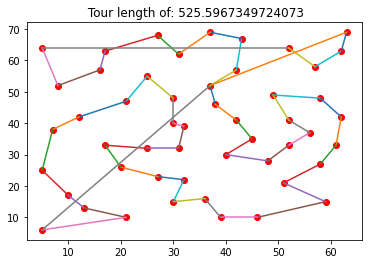

In [326]:
graph_drawer([0, 31, 10, 37, 4, 48, 8, 49, 15, 1, 28, 20, 33, 29, 9, 38, 32, 44, 14, 43, 36, 16, 3, 17, 46, 11, 45, 50, 26, 47, 5, 13, 24, 12, 40, 18, 41, 39, 0, 21, 27, 30, 7, 25, 6, 22, 23, 42, 2, 19, 34, 35, 0], EI51, True)

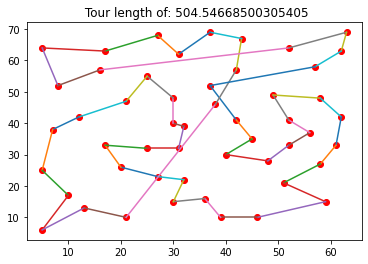

In [327]:
graph_drawer([0,10,37,4,48,8,49,15,1,28,20,33,29,9,38,32,44,14,43,36,16,3,17
,46,11,45,50,26,47,5,13,24,12,40,39,18,41,31,21,27,30,7,25,6,42,23,22
,2,35,34,19,0]
, EI51, True)

In [346]:
def graph_drawer(current_tour, original_data, lines, points):
    if lines == False:
        
        original_data_x = original_data.T[0]
        original_data_y = original_data.T[1]
        
        plt.plot(original_data_x, original_data_y ,'ro')
    
    if lines == True and points == True:
        
        original_data_x = original_data.T[0]
        original_data_y = original_data.T[1]        
        plt.plot(original_data_x, original_data_y ,'ro')
        
        for i in range(len(current_tour)):
            plt.annotate(current_tour[i], (original_data[current_tour[i]][0],original_data[current_tour[i]][1]) )
        
        for i in range(len(current_tour) - 1):
            
            x_values = [original_data[current_tour[i + 1]][0], original_data[current_tour[i]][0]]
            y_values = [original_data[current_tour[i + 1]][1], original_data[current_tour[i]][1]]
            
            plt.plot(x_values, y_values)

        
        
        
        plt.title(f' Tour length of: {tour_length(current_tour, original_data)}')
        
    else:
        original_data_x = original_data.T[0]
        original_data_y = original_data.T[1]        
        plt.plot(original_data_x, original_data_y ,'ro')
        
        for i in range(len(current_tour) - 1):
            
            x_values = [original_data[current_tour[i + 1]][0], original_data[current_tour[i]][0]]
            y_values = [original_data[current_tour[i + 1]][1], original_data[current_tour[i]][1]]
            
            plt.plot(x_values, y_values)
        
        plt.title(f' Tour length of: {tour_length(current_tour, original_data)}') 

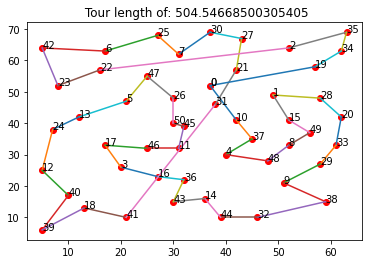

In [347]:
graph_drawer(
np.array([0,10,37,4,48,8,49,15,1,28,20,33,29,9,38,32,44,14,43,36,16,3,17
,46,11,45,50,26,47,5,13,24,12,40,39,18,41,31,21,27,30,7,25,6,42,23,22
,2,35,34,19,0]), EI51,True, True)